In [1]:
# Analyze Accuracy of Live Dead Predictions

import pandas as pd
import os
import sys
import glob
from os.path import expanduser



%load_ext autoreload
%reload_ext autoreload
%autoreload 2

install_pysd2cat = False
if install_pysd2cat:
    print(os.getcwd())
    os.chdir(os.path.join(expanduser("~"), 'tacc-work/sd2nb/pysd2cat'))
    #os.chdir('..')
    !{sys.executable} setup.py develop --user --uninstall
    !{sys.executable} setup.py develop --user 
    os.chdir(os.pardir)

from pysd2cat.analysis import live_dead_analysis as lda

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [2]:
#Get the input data to make the live dead predictions
xplan_base_dir = os.path.join(expanduser("~"), 'sd2e-projects/sd2e-project-14/xplan-reactor')


my_path = os.path.join(xplan_base_dir, 'data/transcriptic')
data = glob.glob(os.path.join(my_path, '*.csv'))
data = [ x for x in data if 'mefl' not in x]



In [3]:
#Analyse the runs

#df = pd.read_csv(os.path.join(os.getcwd(), '../resources/accuracy_set.csv'), index_col=0, dtype={'input' : object, 'output': object})

def extract_run(x):
    description = x['Data and Split Description']
    run = get_run_from_description(description)
    return run

def extract_stain(x):
    description = x['Data and Split Description']
    stain_str = description.split('__')[1:]
    return stain_str[0] != 'no'

def get_random_state(x):
    return x['Data and Split Description'].split('_')[2]

def get_run_from_description(d):
    run = "_".join(d.split('_')[0:2])
    return run

def get_run_from_path(p):
    run = p.split('/')[-1].split('.')[0]
    return run



def get_leader_board_df():
 
    leader_board = pd.read_html(os.path.join(my_path, 'test_harness_results/custom_classification_leaderboard.html'))[0]
    leader_board = leader_board.sort_values(by=['Date', 'Time'], ascending=True)

    leader_board=leader_board.dropna()
    leader_board = leader_board.loc[leader_board['Data and Split Description'].str.contains('__')]

    leader_board.loc[:, 'run'] = leader_board.apply(extract_run, axis = 1)
    leader_board.loc[:, 'stain'] = leader_board.apply(extract_stain, axis = 1)
    leader_board.loc[:,'random_state'] = leader_board.apply(get_random_state, axis=1)
    return leader_board

def case_exists(leader_board_df, input_file, rand, stain):
    match = leader_board_df.loc[(leader_board_df['run'] == get_run_from_path(input_file)) &(leader_board_df['random_state'] == str(rand)) & (leader_board_df['stain'] == stain)]
    return len(match) > 0
    
    
leader_board_df = get_leader_board_df()


input_file='/work/05202/dbryce/jupyter/sd2e-projects/sd2e-project-14/xplan-reactor/data/transcriptic/r1cft9hhnhjdb_r1cfwgjmz247y.csv'
rand=1
stain=True
case_exists(leader_board_df, input_file, rand, stain)


True

In [ ]:
#Make the prediction
strain_column_name='strain_name'
live_strain_name='WT-Live-Control'
dead_strain_name='WT-Dead-Control'
fcs_columns = ['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H',
            'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
output_col = 'live'

#dat = data[0]
#run_id=dat.split("/")[-1].split('.')[0]
leader_board_df = get_leader_board_df()
for i in range(0, 5):
    dat = [x for x in data if not case_exists(leader_board_df, x, i, True)]
    lda.write_live_dead_columns(dat, strain_column_name, live_strain_name, dead_strain_name, fcs_columns,
                                output_col=output_col, overwrite=True, 
                                out_dir=my_path, description='_stain', num_cpu=1, random_state=i, dry_run=True)

fcs_columns = ['FSC_A', 'SSC_A', 'BL1_A',  'FSC_H', 'SSC_H',
            'BL1_H',  'FSC_W', 'SSC_W', 'BL1_W']
output_col = 'live_no_stain'

for i in range(0, 5):
    dat = [x for x in data if not case_exists(leader_board_df, x, i, False)]
    lda.write_live_dead_columns(dat, strain_column_name, live_strain_name, dead_strain_name, fcs_columns,
                                output_col=output_col, overwrite=True, 
                               out_dir=my_path, description='_no_stain', num_cpu=1, random_state=i, dry_run=True)



/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:07:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.67 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ad32DMMBdWPyB  2019-07-24  18:07:06  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.986      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpt3djxuj_r1c7fex29q6t2_0__stain  True       12                      False              False                     

Run finished at 18:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:07:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPerO6RQx65dD  2019-07-24  18:07:31  random_forest_classification  Hamed        2           0.983     0.982              0.997      0.997              0.985     0.98       0.989   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xwx57y95_r1c8ejz8jfg9z_0__stain  True       12                      False              False                     

Run finished at 18:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:07:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dBrzm9pGMXPY  2019-07-24  18:07:53  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.997              0.988     0.983      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9hhnhjdb_r1cfwgjmz247y_0__stain  True       12                      False              False                     

Run finished at 18:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:08:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5o6ePBP9wQO8  2019-07-24  18:08:18  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.991      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeyjwbefaf2_r1cys7qtr6j42x_0__stain  True       12                      False              False                     

Run finished at 18:

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:08:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aL32QZ6DawZAB  2019-07-24  18:08:41  random_forest_classification  Hamed        2           0.984     0.984              0.997      0.996              0.985     0.979      0.991   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y2j7n7bu_r1c8aw59wfxy8_0__stain  True       12                      False              False                     

Run finished at 18:08

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:09:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoA7PXxywPZLe  2019-07-24  18:09:04  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.993     0.988      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpvfzqprk_r1c7fbvba55db_0__stain  True       12                      False              False                     

Run finished at 18:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:09:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QWlDGxXA5db9k  2019-07-24  18:09:27  random_forest_classification  Hamed        2           0.978     0.978              0.998      0.997              0.978     0.981      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcetsvxgc2_r1cdfa6jrtssc_0__stain  True       12                      False              False                     

Run finished at 18:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:09:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPklrNp9RbbGw  2019-07-24  18:09:52  random_forest_classification  Hamed        2           0.984     0.984              0.999      0.998              0.985     0.981      0.988   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yyg9gxbme_r1c96wn43pq45_0__stain  True       12                      False              False                     

Run finished at 18:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:10:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EvEVO3kM8Gr21  2019-07-24  18:10:14  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.996              0.982     0.978      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pjymvm3u_r1ceb3rgpe8gm_0__stain  True       12                      False              False                     

Run finished at 18:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:10:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qDEaMa3bv6yJ  2019-07-24  18:10:36  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.988      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pqt45vfe_r1ce7qf5e483u_0__stain  True       12                      False              False                     

Run finished at 18:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:10:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55PqRdyd6ooe2  2019-07-24  18:10:59  random_forest_classification  Hamed        2           0.964     0.964              0.989      0.985              0.965     0.944      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3ppkyswxf_r1ce7qk6h482m_0__stain  True       12                      False              False                     

Run finished at 18:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:11:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62NOXzDbApkrM  2019-07-24  18:11:23  random_forest_classification  Hamed        2           0.962     0.962              0.992      0.989              0.962     0.95       0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhvgf7b4y_r1cf2yr353x5j_0__stain  True       12                      False              False                     

Run finished at 18:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:11:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.68 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWyd3MVAaAkZP  2019-07-24  18:11:45  random_forest_classification  Hamed        2           0.966     0.916              0.963      0.994              0.981     0.984      0.978   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y3r9yqxb_r1c8auwvzbgt3_0__stain  True       12                      False              False                     

Run finished at 18:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:12:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dqvrkoXVO8Lr  2019-07-24  18:12:08  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.976      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yydkumrkr_r1c96xsxw79c9_0__stain  True       12                      False              False                     

Run finished at 18:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:12:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amYv5gBYZjGeB  2019-07-24  18:12:31  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.989      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw3xk7pau_r1cgpa54x8ff3_0__stain  True       12                      False              False                     

Run finished at 18:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:12:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5o5XBdoWRl6a8  2019-07-24  18:12:54  random_forest_classification  Hamed        2           0.974     0.974              0.997      0.997              0.974     0.976      0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyh56hjqj_r1ccpyjef2vca_0__stain  True       12                      False              False                     

Run finished at 18:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:13:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6a9X1l36RRDAw  2019-07-24  18:13:17  random_forest_classification  Hamed        2           0.949     0.949              0.989      0.988              0.95      0.932      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpp2p3kjz_r1cftpr8wxqc7_0__stain  True       12                      False              False                     

Run finished at 18:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:13:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67NVePGw9RQPY  2019-07-24  18:13:42  random_forest_classification  Hamed        2           0.95      0.95               0.989      0.986              0.951     0.941      0.961   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx7we38vw_r1c93cukfcxqp_0__stain  True       12                      False              False                     

Run finished at 18:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:14:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.17 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6b5aORb6ozNkJ  2019-07-24  18:14:06  random_forest_classification  Hamed        2           0.973     0.973              0.995      0.993              0.973     0.96       0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcesknarkf_r1cdfg4x5uuwp_0__stain  True       12                      False              False                     

Run finished at 18:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:14:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6OP9dA3d86L9W  2019-07-24  18:14:29  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.973      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdhymqfs6b3_r1cdnzf4hbuz2_0__stain  True       12                      False              False                     

Run finished at 18:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:14:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.42 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6OzOdrwEXW9D3  2019-07-24  18:14:37  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.999              0.989     0.983      0.996   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8mvznxxme_r1d8jxmssfag5w_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:14:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.84 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZkPZQ5eB2exy  2019-07-24  18:14:55  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.986      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cprv7fe49_r1c7jmje3ebhc_0__stain  True       12                      False              False                     

Run finished at 18:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:15:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EorBqZaEB9Eqx  2019-07-24  18:15:17  random_forest_classification  Hamed        2           0.972     0.972              0.996      0.996              0.972     0.969      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr4bjcnrg_r1cdnuqex83dm_0__stain  True       12                      False              False                     

Run finished at 18:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:15:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EqAjWMl2OekM  2019-07-24  18:15:40  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.98       0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqf9jq2wvd_r1cctubuxvmvs_0__stain  True       12                      False              False                     

Run finished at 18:15:4

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:15:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.84 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYarGZJkD8gBz  2019-07-24  18:15:57  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.994     0.993      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut3veu2z4_r1cc6efukqtxx_0__stain  True       12                      False              False                     

Run finished at 18:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:16:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.77 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3bz8owe3AWYV  2019-07-24  18:16:20  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.998              0.988     0.988      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpuz2kr6c_r1cfpvk5hjkzb_0__stain  True       12                      False              False                     

Run finished at 18:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:16:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3v6jdW92mdv6  2019-07-24  18:16:42  random_forest_classification  Hamed        2           0.997     0.989              0.999      0.993              0.968     0.955      0.981   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1dag7xpmgar9k_r1dakfqtk7hpzb_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:17:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmxjOQVVGkXo8  2019-07-24  18:17:01  random_forest_classification  Hamed        2           0.98      0.98               0.998      0.998              0.98      0.975      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw8qkp6z4_r1cgjpjx5ve76_0__stain  True       12                      False              False                     

Run finished at 18:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:17:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EvjALVlD9eqQ1  2019-07-24  18:17:25  random_forest_classification  Hamed        2           0.991     0.991              0.998      0.997              0.991     0.986      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw7hjvxgx_r1cgjxrexhd4j_0__stain  True       12                      False              False                     

Run finished at 18:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:17:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7y3BkpWqEOYe  2019-07-24  18:17:47  random_forest_classification  Hamed        2           0.987     0.987              0.999      0.998              0.988     0.985      0.99    46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va9wyf3mx_r1c63bjzu5ruy_0__stain  True       12                      False              False                     

Run finished at 18:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:18:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62AalY3N8g3aM  2019-07-24  18:18:10  random_forest_classification  Hamed        2           0.961     0.955              0.992      0.961              0.882     0.827      0.946   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vad8u7ve2_r1c66q7cru28u_0__stain  True       12                      False              False                     

Run finished at 18:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:18:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RlRoo7qm6jXY  2019-07-24  18:18:31  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.968      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpu9nj2bu_r1c7fg23qkzph_0__stain  True       12                      False              False                     

Run finished at 18:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:18:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pG5m59wEXMmw  2019-07-24  18:18:55  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.987      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyey8rzxq269_r1cysrdt3pvt5n_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:19:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENGWQ98jrqL1e  2019-07-24  18:19:18  random_forest_classification  Hamed        2           0.982     0.982              0.999      0.999              0.982     0.988      0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfbz332u8_r1cctaf8r32rc_0__stain  True       12                      False              False                     

Run finished at 18:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:19:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amXD38LeO1rmo  2019-07-24  18:19:42  random_forest_classification  Hamed        2           0.966     0.966              0.993      0.991              0.967     0.949      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yx25rrtag_r1c96v2w8x5pq_0__stain  True       12                      False              False                     

Run finished at 18:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:20:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6Wv3DeaWpGr8  2019-07-24  18:20:04  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.98      0.987      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw7qh3777_r1ccwxr4t3wb6_0__stain  True       12                      False              False                     

Run finished at 18:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:20:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5oP6G9V1j9aRN  2019-07-24  18:20:27  random_forest_classification  Hamed        2           0.977     0.977              0.995      0.994              0.977     0.969      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyfwfae4d_r1ccq83ggacxc_0__stain  True       12                      False              False                     

Run finished at 18:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:20:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.34 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aW7ao7la5XzpL  2019-07-24  18:20:33  random_forest_classification  Hamed        2           0.994     0.994              1.0        0.998              0.967     0.942      0.992   26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p3p7j77n_r1ceevbnsqku2_0__stain  True       12                      False              False                     

Run finished at 18:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:20:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.49 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEqOAEB1daldD  2019-07-24  18:20:49  random_forest_classification  Hamed        2           0.991     0.99               0.999      0.998              0.98      0.971      0.989   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvwryt3q49_r1cx4ux3zcdt4w_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:21:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYJ3r553dqkmd  2019-07-24  18:21:11  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.968      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhrtvgyvd_r1cf6kx2a233e_0__stain  True       12                      False              False                     

Run finished at 18:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:21:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MQw21oaMNDNM  2019-07-24  18:21:34  random_forest_classification  Hamed        2           0.984     0.984              0.997      0.996              0.984     0.976      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw55mdzsa_r1cgp2v2jqn9h_0__stain  True       12                      False              False                     

Run finished at 18:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:21:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aApMkPr6DO2Ro  2019-07-24  18:21:58  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.984     0.978      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw6bqmemz_r1cgnt4s2c5ty_0__stain  True       12                      False              False                     

Run finished at 18:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:22:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpwDZPBaBJOXM  2019-07-24  18:22:15  random_forest_classification  Hamed        2           0.986     0.986              0.998      0.998              0.986     0.978      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut2pdjtwv_r1cc6qzwcd4hx_0__stain  True       12                      False              False                     

Run finished at 18:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:22:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5roMYXjm37JN  2019-07-24  18:22:37  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.998              0.989     0.99       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vaeb8vbt9_r1c66mfpj7guh_0__stain  True       12                      False              False                     

Run finished at 18:22:3

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:22:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ml8Lva52Zz8  2019-07-24  18:22:55  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.973      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkptta6kuc_r1cfq4k72rwba_0__stain  True       12                      False              False                     

Run finished at 18:22:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:23:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLo171mmQzmZB  2019-07-24  18:23:17  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.993      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyeq9r358_r1ccqgmy5ffcd_0__stain  True       12                      False              False                     

Run finished at 18:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:23:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQGZpgwvNzGvx  2019-07-24  18:23:41  random_forest_classification  Hamed        2           0.968     0.968              0.994      0.991              0.969     0.953      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhu9enre5_r1cf33y4j6dyg_0__stain  True       12                      False              False                     

Run finished at 18:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:24:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66ZXmpzAyvrvJ  2019-07-24  18:24:05  random_forest_classification  Hamed        2           0.967     0.967              0.994      0.993              0.967     0.959      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpq8n84aj_r1cftg78pbqd7_0__stain  True       12                      False              False                     

Run finished at 18:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:24:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMO3yaAxPZyao  2019-07-24  18:24:28  random_forest_classification  Hamed        2           0.97      0.97               0.993      0.991              0.97      0.953      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9f659y9s_r1cfx3nrnc2uw_0__stain  True       12                      False              False                     

Run finished at 18:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:24:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EM92GpJeX19g8  2019-07-24  18:24:51  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.993              0.974     0.959      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xy5frkf3_r1c8ejr9kezva_0__stain  True       12                      False              False                     

Run finished at 18:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:25:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55l5qWWoO3gEr  2019-07-24  18:25:12  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.997              0.984     0.987      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr36fb76a_r1cdjmabskps3_0__stain  True       12                      False              False                     

Run finished at 18:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:25:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62WbZa7x66LXM  2019-07-24  18:25:19  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.992      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p4vgfu3p_r1ceebve8d6tc_0__stain  True       12                      False              False                     

Run finished at 18:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:25:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  621vd9AgLV6gl  2019-07-24  18:25:40  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.98      0.977      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr5gjs72s_r1cdk2gjusax6_0__stain  True       12                      False              False                     

Run finished at 18:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:25:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.63 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pLoj9D8BVkdW  2019-07-24  18:25:56  random_forest_classification  Hamed        2           0.995     0.995              1.0        0.999              0.994     0.993      0.995   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw9ww9g9h_r1cgjg8e8xeav_0__stain  True       12                      False              False                     

Run finished at 18:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:26:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENQwzAD9v2kqA  2019-07-24  18:26:15  random_forest_classification  Hamed        2           0.961     0.956              0.992      0.961              0.883     0.825      0.949   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vac658fxn_r1c66qw595ydy_0__stain  True       12                      False              False                     

Run finished at 18:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:26:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOdPmPzr6xlb9  2019-07-24  18:26:39  random_forest_classification  Hamed        2           0.965     0.965              0.992      0.99               0.965     0.952      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx94j94u7_r1c93ajvdzxz5_0__stain  True       12                      False              False                     

Run finished at 18:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:27:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.49 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rgwaP6GeE6p5  2019-07-24  18:27:01  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.998              0.992     0.988      0.996   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ztq8zfa7_r1d952nn9xk753_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:27:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyvPRvdjEoE1P  2019-07-24  18:27:21  random_forest_classification  Hamed        2           0.985     0.982              0.997      0.995              0.972     0.968      0.977   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cppfr7yp6_r1c7jnv3pkbsj_0__stain  True       12                      False              False                     

Run finished at 18:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:27:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEage2eRmLlb9  2019-07-24  18:27:41  random_forest_classification  Hamed        2           0.96      0.96               0.991      0.989              0.961     0.941      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfsf4ezew3_r1cdjsyza79sr_0__stain  True       12                      False              False                     

Run finished at 18:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:28:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWljqQ3JglrJm  2019-07-24  18:28:04  random_forest_classification  Hamed        2           0.975     0.975              0.997      0.995              0.975     0.966      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vab4q2yu9_r1c63c2e7z9hj_0__stain  True       12                      False              False                     

Run finished at 18:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:28:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Oj1lbqDx5jl5  2019-07-24  18:28:27  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.98      0.977      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3phrwnkqt_r1ceb8fj2hj9a_0__stain  True       12                      False              False                     

Run finished at 18:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:28:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EeZZB5253kvpY  2019-07-24  18:28:50  random_forest_classification  Hamed        2           0.976     0.976              0.996      0.995              0.976     0.965      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpmcezpk2_r1c9wjnedp92f_0__stain  True       12                      False              False                     

Run finished at 18:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:29:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpdGj93XvBWbJ  2019-07-24  18:29:13  random_forest_classification  Hamed        2           0.988     0.988              0.997      0.995              0.989     0.981      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpsmdkgjb_r1cfqbcwrk6vu_0__stain  True       12                      False              False                     

Run finished at 18:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:29:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZAgb8NjV5lZY  2019-07-24  18:29:28  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.998              0.983     0.98       0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p63vnpzq_r1cee5f7knupg_0__stain  True       12                      False              False                     

Run finished at 18:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:29:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aePek83wOmMV  2019-07-24  18:29:52  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.991      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ch7zwzznes3_r1cheagmxcqvt_0__stain  True       12                      False              False                     

Run finished at 18:29:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:30:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoPZJBexWV9G1  2019-07-24  18:30:17  random_forest_classification  Hamed        2           0.974     0.974              0.995      0.994              0.974     0.961      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx6qe9eea_r1c93enbf48t7_0__stain  True       12                      False              False                     

Run finished at 18:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:30:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.53 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3OvRr1eRvRVd  2019-07-24  18:30:37  random_forest_classification  Hamed        2           0.99      0.991              1.0        0.999              0.981     0.971      0.992   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut6a79n9t_r1cc34mkuvzeh_0__stain  True       12                      False              False                     

Run finished at 18:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:30:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QW8qWJx97Xew3  2019-07-24  18:30:58  random_forest_classification  Hamed        2           0.966     0.966              0.994      0.992              0.966     0.952      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkprehr2fj_r1cft8f7cbsp7_0__stain  True       12                      False              False                     

Run finished at 18:31

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:31:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmqDydYAwBwoP  2019-07-24  18:31:22  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.999              0.981     0.97       0.992   27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d9xx8rjarjuw_r1da5tgwjasvw3_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:31:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.75 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gadb2VXYR55N  2019-07-24  18:31:38  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.994     0.993      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ykf868ep_r1d98fh76wrqp7_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:31:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WamXV1wbXOmN  2019-07-24  18:31:58  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r932unhafk_r1d93nuytthhp4_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:32:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q72pyxYkoRvbD  2019-07-24  18:32:19  random_forest_classification  Hamed        2           0.958     0.958              0.99       0.988              0.959     0.93       0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajqru7kbe_r1cbe9p9zu6dh_0__stain  True       12                      False              False                     

Run finished at 18:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:32:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ab5aJPBeMG52L  2019-07-24  18:32:25  random_forest_classification  Hamed        2           0.997     0.957              0.998      0.96               0.88      0.846      0.917   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvvj2bh6hc_r1cx4pbeyv2q29_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:32:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agjOp3JrVYAqb  2019-07-24  18:32:45  random_forest_classification  Hamed        2           0.904     0.904              0.969      0.968              0.905     0.897      0.913   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajrxthe7y_r1cbdzkebbd46_0__stain  True       12                      False              False                     

Run finished at 18:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:33:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pE1d5LmgD55N  2019-07-24  18:33:08  random_forest_classification  Hamed        2           0.983     0.982              0.998      0.998              0.984     0.979      0.989   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xvquwxth_r1c8ek7vcmdxh_0__stain  True       12                      False              False                     

Run finished at 18:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:33:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7dk5wExXJ8wo  2019-07-24  18:33:32  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.988      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeye2du6ep8_r1cysfjkjjphqj_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:33:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rW3LrlQR7LQb  2019-07-24  18:33:54  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.998              0.983     0.977      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpk5zrbsk_r1c9wpbvjszxe_0__stain  True       12                      False              False                     

Run finished at 18:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:34:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lr9L58W8eMEY  2019-07-24  18:34:16  random_forest_classification  Hamed        2           0.975     0.975              0.997      0.997              0.975     0.979      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw8wvwpbg_r1ccwteetw82v_0__stain  True       12                      False              False                     

Run finished at 18:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:34:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ap2D1myXpPqjV  2019-07-24  18:34:38  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.993              0.975     0.969      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfas8urfk_r1cctk2a3wbk5_0__stain  True       12                      False              False                     

Run finished at 18:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QE3MX3Db1JAlr  2019-07-24  18:35:00  random_forest_classification  Hamed        2           0.962     0.962              0.994      0.993              0.963     0.96       0.965   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pndp353t_r1ce7xkybfnqd_0__stain  True       12                      False              False                     

Run finished at 18:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bbwRAb6wzwpN  2019-07-24  18:35:22  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.998              0.986     0.988      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw6h5fsfg_r1ccx3axsj5ua_0__stain  True       12                      False              False                     

Run finished at 18:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6bDGmlVqJAlr  2019-07-24  18:35:28  random_forest_classification  Hamed        2           0.993     0.984              0.999      0.989              0.94      0.908      0.975   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r59sste9m2_r1d8gf8cczkrz9_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aY5zOQWygX2pR  2019-07-24  18:35:40  random_forest_classification  Hamed        2           0.995     0.996              1.0        0.999              0.969     0.942      0.998   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r58jnct63g_r1d8kxz5ndkxyh_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:35:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adXwyWR28WrAL  2019-07-24  18:35:52  random_forest_classification  Hamed        2           0.993     0.986              0.999      0.992              0.946     0.916      0.978   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r5b24f9a9z_r1d8cyvjthnvvt_0__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:36:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Z218evaJJpd8  2019-07-24  18:36:11  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.989              0.972     0.958      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cf3p48cauwv_r1cf6hech88mh_0__stain  True       12                      False              False                     

Run finished at 18:36

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:36:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAx5rJ98BMLdo  2019-07-24  18:36:35  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.995              0.98      0.972      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcerdbpda2_r1cdfphfehzq2_0__stain  True       12                      False              False                     

Run finished at 18:36

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:36:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eao8Jbvp175A  2019-07-24  18:36:58  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.993     0.989      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xzc5dbuv_r1c8axrywctwb_0__stain  True       12                      False              False                     

Run finished at 18:37:0

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:37:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  al5LG1Ez7Yq6  2019-07-24  18:37:17  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.998              0.984     0.974      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut7g7x6pg_r1cc2xauy7qaa_0__stain  True       12                      False              False                     

Run finished at 18:37:2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:37:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLBPJvXrNQyvw  2019-07-24  18:37:39  random_forest_classification  Hamed        2           0.939     0.939              0.983      0.979              0.941     0.912      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va879uaex_r1c639xp952g4_0__stain  True       12                      False              False                     

Run finished at 18:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:37:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6A7yyYNjV3QOO  2019-07-24  18:37:53  random_forest_classification  Hamed        2           0.993     0.994              1.0        0.998              0.975     0.956      0.995   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbuszfskzjt_r1cc6ws9c3dh4_0__stain  True       12                      False              False                     

Run finished at 18:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:38:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6A8qZlwEbOXPY  2019-07-24  18:38:13  random_forest_classification  Hamed        2           0.974     0.974              0.992      0.987              0.975     0.956      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9gbs55yn_r1cfwthkscwsk_0__stain  True       12                      False              False                     

Run finished at 18:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:38:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmJBDVyNZm6ye  2019-07-24  18:38:35  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.997              0.979     0.977      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pm76spw4_r1ceas4zgsdt5_0__stain  True       12                      False              False                     

Run finished at 18:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:38:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5W8DPQzLR3VLb  2019-07-24  18:38:57  random_forest_classification  Hamed        2           0.966     0.966              0.992      0.989              0.966     0.948      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhqmu6c7w_r1cf6snbv99p8_0__stain  True       12                      False              False                     

Run finished at 18:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:39:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q71dbqD98LvA3  2019-07-24  18:39:20  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.987      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpt3djxuj_r1c7fex29q6t2_1__stain  True       12                      False              False                     

Run finished at 18:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:39:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62bEaDev1mRLY  2019-07-24  18:39:45  random_forest_classification  Hamed        2           0.982     0.981              0.998      0.998              0.984     0.978      0.99    43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xwx57y95_r1c8ejz8jfg9z_1__stain  True       12                      False              False                     

Run finished at 18:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:40:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5pWGWkwdXZV75  2019-07-24  18:40:08  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.998              0.988     0.982      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9hhnhjdb_r1cfwgjmz247y_1__stain  True       12                      False              False                     

Run finished at 18:40

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:40:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6Dk2kzaEvpwkJ  2019-07-24  18:40:33  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.991      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeyjwbefaf2_r1cys7qtr6j42x_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:40:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOBeVNq52k6wr  2019-07-24  18:40:56  random_forest_classification  Hamed        2           0.983     0.982              0.997      0.997              0.983     0.975      0.992   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y2j7n7bu_r1c8aw59wfxy8_1__stain  True       12                      False              False                     

Run finished at 18:40

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:41:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lRRRRozaJlGG  2019-07-24  18:41:19  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.994     0.99       0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpvfzqprk_r1c7fbvba55db_1__stain  True       12                      False              False                     

Run finished at 18:41

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:41:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6PbxlZ8xXwOM  2019-07-24  18:41:42  random_forest_classification  Hamed        2           0.979     0.979              0.998      0.998              0.979     0.982      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcetsvxgc2_r1cdfa6jrtssc_1__stain  True       12                      False              False                     

Run finished at 18:41

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:42:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59V7zm6EmNpOb  2019-07-24  18:42:06  random_forest_classification  Hamed        2           0.987     0.987              0.998      0.998              0.988     0.983      0.992   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yyg9gxbme_r1c96wn43pq45_1__stain  True       12                      False              False                     

Run finished at 18:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:42:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYgJXYdXzodDk  2019-07-24  18:42:28  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.998              0.982     0.978      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pjymvm3u_r1ceb3rgpe8gm_1__stain  True       12                      False              False                     

Run finished at 18:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:42:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EaAX3ldG1yGvx  2019-07-24  18:42:50  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.99       0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pqt45vfe_r1ce7qf5e483u_1__stain  True       12                      False              False                     

Run finished at 18:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:43:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eek8kgOAjoeey  2019-07-24  18:43:12  random_forest_classification  Hamed        2           0.966     0.966              0.989      0.984              0.967     0.949      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3ppkyswxf_r1ce7qk6h482m_1__stain  True       12                      False              False                     

Run finished at 18:43

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:43:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAZmBXLzDDX3B  2019-07-24  18:43:36  random_forest_classification  Hamed        2           0.964     0.964              0.993      0.991              0.964     0.953      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhvgf7b4y_r1cf2yr353x5j_1__stain  True       12                      False              False                     

Run finished at 18:43

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:43:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ep8Nm6ErOl2l1  2019-07-24  18:43:43  random_forest_classification  Hamed        2           0.996     0.909              0.991      0.791              0.736     0.667      0.821   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvxz5d7wua_r1cx7ucsnkjfsb_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:44:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.66 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62ZbDjZMLbel  2019-07-24  18:44:03  random_forest_classification  Hamed        2           0.961     0.906              0.948      0.99               0.978     0.982      0.974   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y3r9yqxb_r1c8auwvzbgt3_1__stain  True       12                      False              False                     

Run finished at 18:44:0

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:44:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aVJkay1m7rXw  2019-07-24  18:44:26  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.996              0.982     0.975      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yydkumrkr_r1c96xsxw79c9_1__stain  True       12                      False              False                     

Run finished at 18:44:2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:44:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYJ2mW1BM8lmM  2019-07-24  18:44:48  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.989      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw3xk7pau_r1cgpa54x8ff3_1__stain  True       12                      False              False                     

Run finished at 18:44

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:45:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5J8pdD852wOZ2  2019-07-24  18:45:11  random_forest_classification  Hamed        2           0.973     0.973              0.997      0.997              0.973     0.977      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyh56hjqj_r1ccpyjef2vca_1__stain  True       12                      False              False                     

Run finished at 18:45

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:45:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPRgrkPa3dmYm  2019-07-24  18:45:34  random_forest_classification  Hamed        2           0.95      0.95               0.988      0.986              0.951     0.932      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpp2p3kjz_r1cftpr8wxqc7_1__stain  True       12                      False              False                     

Run finished at 18:45

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:45:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMWWqe19qG2pR  2019-07-24  18:45:58  random_forest_classification  Hamed        2           0.948     0.948              0.987      0.985              0.949     0.934      0.964   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx7we38vw_r1c93cukfcxqp_1__stain  True       12                      False              False                     

Run finished at 18:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:46:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.75 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WlkqvDOY3D5G  2019-07-24  18:46:13  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut53kpf3n_r1cc3bn2s2aj8_1__stain  True       12                      False              False                     

Run finished at 18:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:46:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMlMb2mBdaWMy  2019-07-24  18:46:35  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.994              0.972     0.964      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcesknarkf_r1cdfg4x5uuwp_1__stain  True       12                      False              False                     

Run finished at 18:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:46:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RYyE7WXEZrky  2019-07-24  18:46:58  random_forest_classification  Hamed        2           0.979     0.979              0.996      0.995              0.979     0.974      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdhymqfs6b3_r1cdnzf4hbuz2_1__stain  True       12                      False              False                     

Run finished at 18:47

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:47:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.42 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agovmA5lLxklB  2019-07-24  18:47:05  random_forest_classification  Hamed        2           0.996     0.997              1.0        1.0                0.991     0.984      0.998   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8mvznxxme_r1d8jxmssfag5w_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:47:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.81 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5pOedDwrv3bMG  2019-07-24  18:47:22  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.987      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cprv7fe49_r1c7jmje3ebhc_1__stain  True       12                      False              False                     

Run finished at 18:47

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:47:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DAdoY5NJQZ5Y  2019-07-24  18:47:44  random_forest_classification  Hamed        2           0.976     0.976              0.997      0.997              0.977     0.971      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr4bjcnrg_r1cdnuqex83dm_1__stain  True       12                      False              False                     

Run finished at 18:47

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:48:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOJNNoQZOBlWq  2019-07-24  18:48:07  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.981      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqf9jq2wvd_r1cctubuxvmvs_1__stain  True       12                      False              False                     

Run finished at 18:48

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:48:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q9bXp1V5raNd9  2019-07-24  18:48:23  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.992      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut3veu2z4_r1cc6efukqtxx_1__stain  True       12                      False              False                     

Run finished at 18:48

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:48:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apYVl7loxpayB  2019-07-24  18:48:46  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.998              0.988     0.987      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpuz2kr6c_r1cfpvk5hjkzb_1__stain  True       12                      False              False                     

Run finished at 18:48

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:49:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ermml8PerVkp1  2019-07-24  18:49:08  random_forest_classification  Hamed        2           0.995     0.987              0.997      0.99               0.953     0.929      0.978   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1dag7xpmgar9k_r1dakfqtk7hpzb_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:49:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Er5R93vLlRwAy  2019-07-24  18:49:26  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.976      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw8qkp6z4_r1cgjpjx5ve76_1__stain  True       12                      False              False                     

Run finished at 18:49

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:49:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ea7BX9M2pWZ8y  2019-07-24  18:49:49  random_forest_classification  Hamed        2           0.99      0.99               0.998      0.997              0.99      0.985      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw7hjvxgx_r1cgjxrexhd4j_1__stain  True       12                      False              False                     

Run finished at 18:49

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:50:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPg72lZ8yRmOD  2019-07-24  18:50:10  random_forest_classification  Hamed        2           0.985     0.985              0.998      0.998              0.985     0.982      0.989   46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va9wyf3mx_r1c63bjzu5ruy_1__stain  True       12                      False              False                     

Run finished at 18:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:50:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpMzl7k1BjAwA  2019-07-24  18:50:33  random_forest_classification  Hamed        2           0.967     0.961              0.994      0.971              0.901     0.856      0.952   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vad8u7ve2_r1c66q7cru28u_1__stain  True       12                      False              False                     

Run finished at 18:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:50:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAraZdOXDDxAB  2019-07-24  18:50:53  random_forest_classification  Hamed        2           0.979     0.979              0.996      0.995              0.979     0.964      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpu9nj2bu_r1c7fg23qkzph_1__stain  True       12                      False              False                     

Run finished at 18:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:51:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5O6W1zaGO3e2  2019-07-24  18:51:16  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.988      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyey8rzxq269_r1cysrdt3pvt5n_1__stain  True       12                      False              False                     

Run finished at 18:

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:51:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QozoPdZlBjgMD  2019-07-24  18:51:39  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.998              0.982     0.987      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfbz332u8_r1cctaf8r32rc_1__stain  True       12                      False              False                     

Run finished at 18:51

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:52:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLVE7OJAM8Omo  2019-07-24  18:52:03  random_forest_classification  Hamed        2           0.969     0.969              0.993      0.99               0.97      0.951      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yx25rrtag_r1c96v2w8x5pq_1__stain  True       12                      False              False                     

Run finished at 18:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:52:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQkoqrXk8oWZP  2019-07-24  18:52:24  random_forest_classification  Hamed        2           0.982     0.982              0.999      0.999              0.982     0.987      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw7qh3777_r1ccwxr4t3wb6_1__stain  True       12                      False              False                     

Run finished at 18:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:52:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPExBwbw2EOXw  2019-07-24  18:52:47  random_forest_classification  Hamed        2           0.977     0.977              0.997      0.996              0.977     0.97       0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyfwfae4d_r1ccq83ggacxc_1__stain  True       12                      False              False                     

Run finished at 18:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:52:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPBE8MED5OJko  2019-07-24  18:52:54  random_forest_classification  Hamed        2           0.994     0.994              1.0        0.998              0.963     0.934      0.994   26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p3p7j77n_r1ceevbnsqku2_1__stain  True       12                      False              False                     

Run finished at 18:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:53:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gbyM1avJNGjW  2019-07-24  18:53:08  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.983     0.974      0.991   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvwryt3q49_r1cx4ux3zcdt4w_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:53:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ab3j16lzRkBZB  2019-07-24  18:53:30  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.969      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhrtvgyvd_r1cf6kx2a233e_1__stain  True       12                      False              False                     

Run finished at 18:53

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:53:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.07 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EM3xWMb5rZE5A  2019-07-24  18:53:52  random_forest_classification  Hamed        2           0.983     0.983              0.997      0.996              0.983     0.976      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw55mdzsa_r1cgp2v2jqn9h_1__stain  True       12                      False              False                     

Run finished at 18:53

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:54:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERkPMLVkzQkMy  2019-07-24  18:54:16  random_forest_classification  Hamed        2           0.985     0.985              0.998      0.997              0.985     0.979      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw6bqmemz_r1cgnt4s2c5ty_1__stain  True       12                      False              False                     

Run finished at 18:54

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:54:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pLggdrzDME5N  2019-07-24  18:54:33  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.999              0.986     0.979      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut2pdjtwv_r1cc6qzwcd4hx_1__stain  True       12                      False              False                     

Run finished at 18:54

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:54:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7z3VkPXBR2zw  2019-07-24  18:54:56  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.991      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vaeb8vbt9_r1c66mfpj7guh_1__stain  True       12                      False              False                     

Run finished at 18:54

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:55:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7qPAJrojLaX6  2019-07-24  18:55:14  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.972      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkptta6kuc_r1cfq4k72rwba_1__stain  True       12                      False              False                     

Run finished at 18:55

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:55:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ly9x2PbJvVQM  2019-07-24  18:55:35  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.99       0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyeq9r358_r1ccqgmy5ffcd_1__stain  True       12                      False              False                     

Run finished at 18:55

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:55:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E612AgyzmJNzy  2019-07-24  18:55:59  random_forest_classification  Hamed        2           0.97      0.97               0.993      0.991              0.97      0.958      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhu9enre5_r1cf33y4j6dyg_1__stain  True       12                      False              False                     

Run finished at 18:56

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:56:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59rbzQrWYJVjN  2019-07-24  18:56:22  random_forest_classification  Hamed        2           0.967     0.967              0.995      0.994              0.967     0.958      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpq8n84aj_r1cftg78pbqd7_1__stain  True       12                      False              False                     

Run finished at 18:56

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:56:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6YEqmVLOvW2q  2019-07-24  18:56:43  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.972     0.953      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9f659y9s_r1cfx3nrnc2uw_1__stain  True       12                      False              False                     

Run finished at 18:56

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:57:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYry5aMB5OBkd  2019-07-24  18:57:06  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.993              0.973     0.955      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xy5frkf3_r1c8ejr9kezva_1__stain  True       12                      False              False                     

Run finished at 18:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:57:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ML2D3OpJdzEb  2019-07-24  18:57:29  random_forest_classification  Hamed        2           0.984     0.984              0.999      0.998              0.983     0.986      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr36fb76a_r1cdjmabskps3_1__stain  True       12                      False              False                     

Run finished at 18:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:57:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adxdqV3kAxGwo  2019-07-24  18:57:35  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.991      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p4vgfu3p_r1ceebve8d6tc_1__stain  True       12                      False              False                     

Run finished at 18:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:57:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAjpQbbb8Vojm  2019-07-24  18:57:57  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.978      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr5gjs72s_r1cdk2gjusax6_1__stain  True       12                      False              False                     

Run finished at 18:58

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:58:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.63 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5VdblvNxdDpNM  2019-07-24  18:58:12  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.994     0.993      0.996   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw9ww9g9h_r1cgjg8e8xeav_1__stain  True       12                      False              False                     

Run finished at 18:58

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:58:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6PPPeGVPDMEY  2019-07-24  18:58:33  random_forest_classification  Hamed        2           0.966     0.96               0.994      0.971              0.897     0.849      0.95    22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vac658fxn_r1c66qw595ydy_1__stain  True       12                      False              False                     

Run finished at 18:58:3

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:58:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLD5Mg9D5pZBo  2019-07-24  18:58:57  random_forest_classification  Hamed        2           0.965     0.965              0.991      0.988              0.965     0.954      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx94j94u7_r1c93ajvdzxz5_1__stain  True       12                      False              False                     

Run finished at 18:59

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:59:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.48 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JRk8QRdvrjl5  2019-07-24  18:59:18  random_forest_classification  Hamed        2           0.995     0.995              1.0        0.999              0.991     0.987      0.995   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ztq8zfa7_r1d952nn9xk753_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:59:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ8ZQO9BQo19x  2019-07-24  18:59:38  random_forest_classification  Hamed        2           0.987     0.984              0.996      0.995              0.975     0.974      0.977   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cppfr7yp6_r1c7jnv3pkbsj_1__stain  True       12                      False              False                     

Run finished at 18:59

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 18:59:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56vY5xgNZA8ky  2019-07-24  18:59:57  random_forest_classification  Hamed        2           0.962     0.962              0.992      0.988              0.963     0.947      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfsf4ezew3_r1cdjsyza79sr_1__stain  True       12                      False              False                     

Run finished at 19:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:00:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QM1xeOyrPrXbD  2019-07-24  19:00:21  random_forest_classification  Hamed        2           0.976     0.976              0.996      0.996              0.976     0.969      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vab4q2yu9_r1c63c2e7z9hj_1__stain  True       12                      False              False                     

Run finished at 19:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:00:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.07 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55dl9jeyyWwly  2019-07-24  19:00:43  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.996              0.982     0.979      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3phrwnkqt_r1ceb8fj2hj9a_1__stain  True       12                      False              False                     

Run finished at 19:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:01:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ER9lpXLj9WVax  2019-07-24  19:01:06  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.965      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpmcezpk2_r1c9wjnedp92f_1__stain  True       12                      False              False                     

Run finished at 19:01

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:01:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agqX9m9aPR5wd  2019-07-24  19:01:28  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.995              0.987     0.98       0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpsmdkgjb_r1cfqbcwrk6vu_1__stain  True       12                      False              False                     

Run finished at 19:01

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:01:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.70 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRGrDPxV6JMv1  2019-07-24  19:01:48  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.995     0.993      0.998   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8p5ddgsut_r1d8fgr2efzrhj_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:02:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DkyEo8obpRRJ  2019-07-24  19:02:02  random_forest_classification  Hamed        2           0.98      0.98               0.998      0.998              0.98      0.975      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p63vnpzq_r1cee5f7knupg_1__stain  True       12                      False              False                     

Run finished at 19:02

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:02:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7q1ZG3d9N2N6  2019-07-24  19:02:24  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.994      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ch7zwzznes3_r1cheagmxcqvt_1__stain  True       12                      False              False                     

Run finished at 19:02

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:02:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q9kjW6amL1rRr  2019-07-24  19:02:48  random_forest_classification  Hamed        2           0.974     0.974              0.995      0.993              0.975     0.962      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx6qe9eea_r1c93enbf48t7_1__stain  True       12                      False              False                     

Run finished at 19:02

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:03:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.52 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apAwrLeawwNbo  2019-07-24  19:03:06  random_forest_classification  Hamed        2           0.99      0.989              0.999      0.998              0.98      0.972      0.988   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut6a79n9t_r1cc34mkuvzeh_1__stain  True       12                      False              False                     

Run finished at 19:03

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:03:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5969pPD5wvND5  2019-07-24  19:03:27  random_forest_classification  Hamed        2           0.965     0.965              0.994      0.993              0.966     0.952      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkprehr2fj_r1cft8f7cbsp7_1__stain  True       12                      False              False                     

Run finished at 19:03

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:03:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ErVarPDx1oedP  2019-07-24  19:03:50  random_forest_classification  Hamed        2           0.995     0.993              1.0        0.998              0.978     0.966      0.99    27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d9xx8rjarjuw_r1da5tgwjasvw3_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:04:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.74 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ea7WJBWEld79A  2019-07-24  19:04:08  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r932unhafk_r1d93nuytthhp4_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:04:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MVVNdyMAk2Or  2019-07-24  19:04:30  random_forest_classification  Hamed        2           0.958     0.958              0.991      0.989              0.959     0.934      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajqru7kbe_r1cbe9p9zu6dh_1__stain  True       12                      False              False                     

Run finished at 19:04

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:04:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adkOadrz7bryR  2019-07-24  19:04:36  random_forest_classification  Hamed        2           0.996     0.93               0.994      0.914              0.849     0.838      0.861   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvvj2bh6hc_r1cx4pbeyv2q29_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:04:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.26 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dOP1AaeGXg2M  2019-07-24  19:04:57  random_forest_classification  Hamed        2           0.907     0.907              0.97       0.971              0.907     0.9        0.914   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajrxthe7y_r1cbdzkebbd46_1__stain  True       12                      False              False                     

Run finished at 19:05

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:05:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5V5W5XR9W3MOr  2019-07-24  19:05:19  random_forest_classification  Hamed        2           0.985     0.984              0.998      0.998              0.986     0.984      0.987   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xvquwxth_r1c8ek7vcmdxh_1__stain  True       12                      False              False                     

Run finished at 19:05

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:05:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QNNdXrAzvE6e  2019-07-24  19:05:43  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.989      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeye2du6ep8_r1cysfjkjjphqj_1__stain  True       12                      False              False                     

Run finished at 19:

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:06:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WLBJ3pmzN68Y  2019-07-24  19:06:06  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.997              0.983     0.976      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpk5zrbsk_r1c9wpbvjszxe_1__stain  True       12                      False              False                     

Run finished at 19:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:06:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ApqAzoZYy5AM  2019-07-24  19:06:28  random_forest_classification  Hamed        2           0.976     0.976              0.997      0.997              0.975     0.981      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw8wvwpbg_r1ccwteetw82v_1__stain  True       12                      False              False                     

Run finished at 19:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:06:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6A9JqrDOY58AM  2019-07-24  19:06:50  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.994              0.975     0.968      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfas8urfk_r1cctk2a3wbk5_1__stain  True       12                      False              False                     

Run finished at 19:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:07:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.65 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66jajdN7zwraw  2019-07-24  19:07:13  random_forest_classification  Hamed        2           0.996     0.996              0.999      0.999              0.996     0.995      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajphx4ekf_r1cbeec6cxn2t_1__stain  True       12                      False              False                     

Run finished at 19:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:07:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMGAVOG9Vex6D  2019-07-24  19:07:34  random_forest_classification  Hamed        2           0.958     0.958              0.993      0.992              0.958     0.954      0.961   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pndp353t_r1ce7xkybfnqd_1__stain  True       12                      False              False                     

Run finished at 19:07

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:07:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMorBvlZmRdyL  2019-07-24  19:07:38  random_forest_classification  Hamed        2           0.987     0.984              0.996      0.995              0.976     0.974      0.978   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpqp2k6cw_r1c7jn9syrr8s_1__stain  True       12                      False              False                     

Run finished at 19:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:07:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abeglgqRvNxlR  2019-07-24  19:07:59  random_forest_classification  Hamed        2           0.985     0.985              0.998      0.996              0.985     0.987      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw6h5fsfg_r1ccx3axsj5ua_1__stain  True       12                      False              False                     

Run finished at 19:08

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:08:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abZMlA5daPkQV  2019-07-24  19:08:04  random_forest_classification  Hamed        2           0.995     0.991              1.0        0.997              0.957     0.931      0.986   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r59sste9m2_r1d8gf8cczkrz9_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:08:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERme9YDYygAlJ  2019-07-24  19:08:17  random_forest_classification  Hamed        2           0.996     0.991              1.0        0.997              0.976     0.966      0.986   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r58jnct63g_r1d8kxz5ndkxyh_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:08:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agEQ9AqlVzzX6  2019-07-24  19:08:30  random_forest_classification  Hamed        2           0.993     0.986              0.999      0.992              0.948     0.92       0.978   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r5b24f9a9z_r1d8cyvjthnvvt_1__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:08:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  az7NddBXjvYyR  2019-07-24  19:08:48  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.991              0.975     0.962      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cf3p48cauwv_r1cf6hech88mh_1__stain  True       12                      False              False                     

Run finished at 19:08

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:09:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOoQRyxG2MEqP  2019-07-24  19:09:12  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.994              0.98      0.976      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcerdbpda2_r1cdfphfehzq2_1__stain  True       12                      False              False                     

Run finished at 19:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:09:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DNmDMkeO61jM  2019-07-24  19:09:34  random_forest_classification  Hamed        2           0.993     0.993              1.0        1.0                0.993     0.99       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xzc5dbuv_r1c8axrywctwb_1__stain  True       12                      False              False                     

Run finished at 19:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:09:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amJoOGAEd7YOV  2019-07-24  19:09:54  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.998              0.983     0.973      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut7g7x6pg_r1cc2xauy7qaa_1__stain  True       12                      False              False                     

Run finished at 19:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:10:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5oZAVa2vYgmYG  2019-07-24  19:10:16  random_forest_classification  Hamed        2           0.943     0.943              0.985      0.981              0.945     0.918      0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va879uaex_r1c639xp952g4_1__stain  True       12                      False              False                     

Run finished at 19:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:10:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyrJy6BzJz6d9  2019-07-24  19:10:30  random_forest_classification  Hamed        2           0.994     0.993              1.0        0.998              0.979     0.968      0.991   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbuszfskzjt_r1cc6ws9c3dh4_1__stain  True       12                      False              False                     

Run finished at 19:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:10:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67JXBboP98DXw  2019-07-24  19:10:50  random_forest_classification  Hamed        2           0.974     0.974              0.992      0.986              0.974     0.956      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9gbs55yn_r1cfwthkscwsk_1__stain  True       12                      False              False                     

Run finished at 19:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:11:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bwXRQolvwmZl  2019-07-24  19:11:13  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.997              0.98      0.979      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pm76spw4_r1ceas4zgsdt5_1__stain  True       12                      False              False                     

Run finished at 19:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:11:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EezREOLpNlG9z  2019-07-24  19:11:36  random_forest_classification  Hamed        2           0.965     0.965              0.991      0.988              0.965     0.946      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhqmu6c7w_r1cf6snbv99p8_1__stain  True       12                      False              False                     

Run finished at 19:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:11:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Z2GbW3QYj8MG  2019-07-24  19:11:59  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.986      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpt3djxuj_r1c7fex29q6t2_2__stain  True       12                      False              False                     

Run finished at 19:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:12:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAv2LGyjG99Om  2019-07-24  19:12:23  random_forest_classification  Hamed        2           0.982     0.981              0.998      0.998              0.984     0.979      0.989   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xwx57y95_r1c8ejz8jfg9z_2__stain  True       12                      False              False                     

Run finished at 19:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:12:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ODxEQYYqEDJ  2019-07-24  19:12:46  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.984      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9hhnhjdb_r1cfwgjmz247y_2__stain  True       12                      False              False                     

Run finished at 19:12:4

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:13:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYRZx2BEPkN2Y  2019-07-24  19:13:09  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.993      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeyjwbefaf2_r1cys7qtr6j42x_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:13:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYDjd8kWmvLMy  2019-07-24  19:13:32  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.997              0.982     0.977      0.988   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y2j7n7bu_r1c8aw59wfxy8_2__stain  True       12                      False              False                     

Run finished at 19:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:13:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQJgw29oozGJy  2019-07-24  19:13:54  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.989      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpvfzqprk_r1c7fbvba55db_2__stain  True       12                      False              False                     

Run finished at 19:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:14:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Emx5gk5RZOWJe  2019-07-24  19:14:17  random_forest_classification  Hamed        2           0.978     0.978              0.998      0.998              0.978     0.981      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcetsvxgc2_r1cdfa6jrtssc_2__stain  True       12                      False              False                     

Run finished at 19:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:14:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Wkqx3yRg9RMM  2019-07-24  19:14:41  random_forest_classification  Hamed        2           0.988     0.988              0.999      0.998              0.988     0.984      0.992   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yyg9gxbme_r1c96wn43pq45_2__stain  True       12                      False              False                     

Run finished at 19:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:15:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abpVGpELbAqBd  2019-07-24  19:15:03  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.997              0.98      0.977      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pjymvm3u_r1ceb3rgpe8gm_2__stain  True       12                      False              False                     

Run finished at 19:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:15:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ag3Jj6oMXavMm  2019-07-24  19:15:26  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.988      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pqt45vfe_r1ce7qf5e483u_2__stain  True       12                      False              False                     

Run finished at 19:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:15:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Rzxrygqpaem2  2019-07-24  19:15:48  random_forest_classification  Hamed        2           0.968     0.968              0.991      0.989              0.968     0.952      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3ppkyswxf_r1ce7qk6h482m_2__stain  True       12                      False              False                     

Run finished at 19:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:16:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRloza2wMQgy1  2019-07-24  19:16:12  random_forest_classification  Hamed        2           0.965     0.965              0.993      0.991              0.966     0.955      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhvgf7b4y_r1cf2yr353x5j_2__stain  True       12                      False              False                     

Run finished at 19:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:16:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QReLaZQooxNwr  2019-07-24  19:16:19  random_forest_classification  Hamed        2           0.997     0.858              0.991      0.751              0.747     0.778      0.718   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvxz5d7wua_r1cx7ucsnkjfsb_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:16:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.65 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7oNvBdEyv6Dk  2019-07-24  19:16:39  random_forest_classification  Hamed        2           0.963     0.906              0.952      0.991              0.979     0.982      0.977   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y3r9yqxb_r1c8auwvzbgt3_2__stain  True       12                      False              False                     

Run finished at 19:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:17:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amQzYG7YojpJV  2019-07-24  19:17:01  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.979      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yydkumrkr_r1c96xsxw79c9_2__stain  True       12                      False              False                     

Run finished at 19:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:17:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apW2Wb2wpQ9xL  2019-07-24  19:17:23  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.992      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw3xk7pau_r1cgpa54x8ff3_2__stain  True       12                      False              False                     

Run finished at 19:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:17:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWPOrOw5ROMXw  2019-07-24  19:17:46  random_forest_classification  Hamed        2           0.974     0.974              0.997      0.998              0.974     0.978      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyh56hjqj_r1ccpyjef2vca_2__stain  True       12                      False              False                     

Run finished at 19:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:18:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWxvE1lZyml86  2019-07-24  19:18:08  random_forest_classification  Hamed        2           0.95      0.95               0.988      0.986              0.952     0.931      0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpp2p3kjz_r1cftpr8wxqc7_2__stain  True       12                      False              False                     

Run finished at 19:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:18:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ONJYdPQ3lRvb  2019-07-24  19:18:33  random_forest_classification  Hamed        2           0.95      0.95               0.989      0.987              0.95      0.938      0.963   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx7we38vw_r1c93cukfcxqp_2__stain  True       12                      False              False                     

Run finished at 19:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:18:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.73 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MO9QqZe3kXR2  2019-07-24  19:18:47  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.995     0.993      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut53kpf3n_r1cc3bn2s2aj8_2__stain  True       12                      False              False                     

Run finished at 19:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:19:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZJPQZrvDqVZY  2019-07-24  19:19:09  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.995              0.972     0.963      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcesknarkf_r1cdfg4x5uuwp_2__stain  True       12                      False              False                     

Run finished at 19:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:19:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAx31xMV5v9rk  2019-07-24  19:19:31  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.994              0.979     0.973      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdhymqfs6b3_r1cdnzf4hbuz2_2__stain  True       12                      False              False                     

Run finished at 19:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:19:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EoRpLNwpVRoXM  2019-07-24  19:19:39  random_forest_classification  Hamed        2           0.996     0.994              1.0        1.0                0.99      0.989      0.991   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8mvznxxme_r1d8jxmssfag5w_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:19:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.79 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QjRNMo8Jg5b9  2019-07-24  19:19:56  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.987      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cprv7fe49_r1c7jmje3ebhc_2__stain  True       12                      False              False                     

Run finished at 19:19:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:20:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoaGykVWzVyw7  2019-07-24  19:20:19  random_forest_classification  Hamed        2           0.976     0.976              0.997      0.996              0.976     0.972      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr4bjcnrg_r1cdnuqex83dm_2__stain  True       12                      False              False                     

Run finished at 19:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:20:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ9JDyEXbE67A  2019-07-24  19:20:43  random_forest_classification  Hamed        2           0.981     0.981              0.999      0.999              0.981     0.982      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqf9jq2wvd_r1cctubuxvmvs_2__stain  True       12                      False              False                     

Run finished at 19:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:21:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3NJvmdb53w1k  2019-07-24  19:21:00  random_forest_classification  Hamed        2           0.992     0.992              1.0        1.0                0.992     0.989      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut3veu2z4_r1cc6efukqtxx_2__stain  True       12                      False              False                     

Run finished at 19:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:21:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66EZmBOE853lO  2019-07-24  19:21:23  random_forest_classification  Hamed        2           0.987     0.987              0.999      0.999              0.987     0.989      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpuz2kr6c_r1cfpvk5hjkzb_2__stain  True       12                      False              False                     

Run finished at 19:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:21:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EvzwyPDVAvlWP  2019-07-24  19:21:44  random_forest_classification  Hamed        2           0.997     0.99               1.0        0.995              0.974     0.966      0.981   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1dag7xpmgar9k_r1dakfqtk7hpzb_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:22:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMe72Eme6zMl3  2019-07-24  19:22:04  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.997              0.982     0.978      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw8qkp6z4_r1cgjpjx5ve76_2__stain  True       12                      False              False                     

Run finished at 19:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:22:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55zdVvd8PPge2  2019-07-24  19:22:29  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.987      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw7hjvxgx_r1cgjxrexhd4j_2__stain  True       12                      False              False                     

Run finished at 19:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:22:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qapy7xJ9kqjjr  2019-07-24  19:22:51  random_forest_classification  Hamed        2           0.986     0.986              0.998      0.998              0.987     0.984      0.99    46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va9wyf3mx_r1c63bjzu5ruy_2__stain  True       12                      False              False                     

Run finished at 19:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:23:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.44 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azXWkVdAl79Qk  2019-07-24  19:23:11  random_forest_classification  Hamed        2           0.964     0.956              0.99       0.967              0.891     0.843      0.945   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vad8u7ve2_r1c66q7cru28u_2__stain  True       12                      False              False                     

Run finished at 19:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:23:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6D6mvk1RkGGRl  2019-07-24  19:23:32  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.994              0.98      0.966      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpu9nj2bu_r1c7fg23qkzph_2__stain  True       12                      False              False                     

Run finished at 19:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:23:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6D3MQwP2N9xNG  2019-07-24  19:23:56  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.988      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyey8rzxq269_r1cysrdt3pvt5n_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:24:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rjkj9qeR7dO8  2019-07-24  19:24:19  random_forest_classification  Hamed        2           0.981     0.981              0.999      0.999              0.981     0.988      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfbz332u8_r1cctaf8r32rc_2__stain  True       12                      False              False                     

Run finished at 19:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:24:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apNvJgxlp6Xvb  2019-07-24  19:24:43  random_forest_classification  Hamed        2           0.973     0.973              0.994      0.993              0.973     0.957      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yx25rrtag_r1c96v2w8x5pq_2__stain  True       12                      False              False                     

Run finished at 19:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:25:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEv8gz8XZXRg1  2019-07-24  19:25:05  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.998              0.981     0.989      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw7qh3777_r1ccwxr4t3wb6_2__stain  True       12                      False              False                     

Run finished at 19:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:25:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Oo5wlLyZ5jab  2019-07-24  19:25:28  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.973      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyfwfae4d_r1ccq83ggacxc_2__stain  True       12                      False              False                     

Run finished at 19:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:25:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bEd2zPwdXG3O  2019-07-24  19:25:33  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.997              0.968     0.944      0.992   26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p3p7j77n_r1ceevbnsqku2_2__stain  True       12                      False              False                     

Run finished at 19:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:25:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aY8YxqAJbmbkd  2019-07-24  19:25:49  random_forest_classification  Hamed        2           0.991     0.989              1.0        0.998              0.98      0.976      0.985   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvwryt3q49_r1cx4ux3zcdt4w_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:26:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MER3yGvQGmW8  2019-07-24  19:26:09  random_forest_classification  Hamed        2           0.977     0.977              0.996      0.996              0.977     0.971      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhrtvgyvd_r1cf6kx2a233e_2__stain  True       12                      False              False                     

Run finished at 19:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:26:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Zevmb7YXl86y  2019-07-24  19:26:31  random_forest_classification  Hamed        2           0.985     0.985              0.997      0.996              0.985     0.981      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw55mdzsa_r1cgp2v2jqn9h_2__stain  True       12                      False              False                     

Run finished at 19:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:26:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5VV5dbVlReO15  2019-07-24  19:26:54  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.998              0.986     0.979      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw6bqmemz_r1cgnt4s2c5ty_2__stain  True       12                      False              False                     

Run finished at 19:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:27:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QNRVXboX97w3  2019-07-24  19:27:12  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.998              0.986     0.979      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut2pdjtwv_r1cc6qzwcd4hx_2__stain  True       12                      False              False                     

Run finished at 19:27:1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:27:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.84 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLDMRBG9ZEDmo  2019-07-24  19:27:34  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.991      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vaeb8vbt9_r1c66mfpj7guh_2__stain  True       12                      False              False                     

Run finished at 19:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:27:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3L3WqLDgBXBd  2019-07-24  19:27:53  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.975      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkptta6kuc_r1cfq4k72rwba_2__stain  True       12                      False              False                     

Run finished at 19:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:28:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQwWewRdzDaoP  2019-07-24  19:28:15  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.992      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyeq9r358_r1ccqgmy5ffcd_2__stain  True       12                      False              False                     

Run finished at 19:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:28:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66G3GLyEy9gk3  2019-07-24  19:28:39  random_forest_classification  Hamed        2           0.971     0.971              0.994      0.991              0.972     0.961      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhu9enre5_r1cf33y4j6dyg_2__stain  True       12                      False              False                     

Run finished at 19:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:29:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMEoA5ZgYMAgL  2019-07-24  19:29:03  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.994              0.971     0.964      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpq8n84aj_r1cftg78pbqd7_2__stain  True       12                      False              False                     

Run finished at 19:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:29:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7jayX1A29zrk  2019-07-24  19:29:25  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.991              0.974     0.96       0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9f659y9s_r1cfx3nrnc2uw_2__stain  True       12                      False              False                     

Run finished at 19:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:29:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaRlJjOqJ61Be  2019-07-24  19:29:48  random_forest_classification  Hamed        2           0.972     0.972              0.994      0.992              0.973     0.957      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xy5frkf3_r1c8ejr9kezva_2__stain  True       12                      False              False                     

Run finished at 19:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:30:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  629OwwLZMxgDl  2019-07-24  19:30:10  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.984     0.984      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr36fb76a_r1cdjmabskps3_2__stain  True       12                      False              False                     

Run finished at 19:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:30:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.77 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWNBOJyPwQGr8  2019-07-24  19:30:17  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.991      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p4vgfu3p_r1ceebve8d6tc_2__stain  True       12                      False              False                     

Run finished at 19:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:30:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QReBR2NLrQ5M9  2019-07-24  19:30:38  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.984     0.981      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr5gjs72s_r1cdk2gjusax6_2__stain  True       12                      False              False                     

Run finished at 19:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:30:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.61 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7wZAVpwa6NRd  2019-07-24  19:30:53  random_forest_classification  Hamed        2           0.995     0.996              1.0        1.0                0.994     0.992      0.996   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw9ww9g9h_r1cgjg8e8xeav_2__stain  True       12                      False              False                     

Run finished at 19:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:31:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.42 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lDRokev1j39M  2019-07-24  19:31:12  random_forest_classification  Hamed        2           0.964     0.956              0.99       0.967              0.891     0.844      0.943   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vac658fxn_r1c66qw595ydy_2__stain  True       12                      False              False                     

Run finished at 19:31

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:31:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apOq7jL8wMxxL  2019-07-24  19:31:35  random_forest_classification  Hamed        2           0.964     0.964              0.992      0.99               0.964     0.951      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx94j94u7_r1c93ajvdzxz5_2__stain  True       12                      False              False                     

Run finished at 19:31

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:31:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.52 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apB9WPVrbpQq6  2019-07-24  19:31:56  random_forest_classification  Hamed        2           0.993     0.994              1.0        0.999              0.988     0.979      0.996   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ztq8zfa7_r1d952nn9xk753_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:32:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEbLqkB8GeRND  2019-07-24  19:32:16  random_forest_classification  Hamed        2           0.985     0.984              0.996      0.995              0.972     0.963      0.982   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cppfr7yp6_r1c7jnv3pkbsj_2__stain  True       12                      False              False                     

Run finished at 19:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:32:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q69aM8jwwOWqk  2019-07-24  19:32:36  random_forest_classification  Hamed        2           0.961     0.961              0.992      0.991              0.962     0.948      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfsf4ezew3_r1cdjsyza79sr_2__stain  True       12                      False              False                     

Run finished at 19:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:32:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adOqa3Y2pjjVo  2019-07-24  19:32:59  random_forest_classification  Hamed        2           0.975     0.975              0.997      0.996              0.975     0.969      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vab4q2yu9_r1c63c2e7z9hj_2__stain  True       12                      False              False                     

Run finished at 19:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:33:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Mz5JgBJ7D2B8  2019-07-24  19:33:21  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.997              0.982     0.979      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3phrwnkqt_r1ceb8fj2hj9a_2__stain  True       12                      False              False                     

Run finished at 19:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:33:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgLmJPJopYvGo  2019-07-24  19:33:45  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.975     0.964      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpmcezpk2_r1c9wjnedp92f_2__stain  True       12                      False              False                     

Run finished at 19:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:34:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JZ8gBGDQqyM  2019-07-24  19:34:07  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.983      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpsmdkgjb_r1cfqbcwrk6vu_2__stain  True       12                      False              False                     

Run finished at 19:34:1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:34:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aZPrZNJwqkmd  2019-07-24  19:34:22  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.998              0.982     0.977      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p63vnpzq_r1cee5f7knupg_2__stain  True       12                      False              False                     

Run finished at 19:34:2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:34:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYdRvaJGgGkXM  2019-07-24  19:34:46  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.994      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ch7zwzznes3_r1cheagmxcqvt_2__stain  True       12                      False              False                     

Run finished at 19:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:35:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AdvlV2Oxa9aw  2019-07-24  19:35:11  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.994              0.975     0.963      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx6qe9eea_r1c93enbf48t7_2__stain  True       12                      False              False                     

Run finished at 19:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:35:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.52 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JPj1Be93DoGM  2019-07-24  19:35:29  random_forest_classification  Hamed        2           0.99      0.989              0.999      0.998              0.981     0.974      0.988   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut6a79n9t_r1cc34mkuvzeh_2__stain  True       12                      False              False                     

Run finished at 19:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:35:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPB1ok75Ybb3L  2019-07-24  19:35:51  random_forest_classification  Hamed        2           0.967     0.967              0.994      0.993              0.968     0.954      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkprehr2fj_r1cft8f7cbsp7_2__stain  True       12                      False              False                     

Run finished at 19:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:36:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5W1EvYYjr8R1w  2019-07-24  19:36:15  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.998              0.981     0.97       0.992   27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d9xx8rjarjuw_r1da5tgwjasvw3_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:36:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.78 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55oBEqAlqrx2M  2019-07-24  19:36:31  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ykf868ep_r1d98fh76wrqp7_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:36:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55apGa27axV3N  2019-07-24  19:36:50  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r932unhafk_r1d93nuytthhp4_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:37:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qa2Xa57WBRAqP  2019-07-24  19:37:13  random_forest_classification  Hamed        2           0.96      0.96               0.992      0.99               0.961     0.934      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajqru7kbe_r1cbe9p9zu6dh_2__stain  True       12                      False              False                     

Run finished at 19:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:37:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QadlOPJa5d8Go  2019-07-24  19:37:19  random_forest_classification  Hamed        2           0.996     0.95               0.994      0.934              0.85      0.802      0.903   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvvj2bh6hc_r1cx4pbeyv2q29_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:37:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.27 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pRwN3lGdW1dw  2019-07-24  19:37:39  random_forest_classification  Hamed        2           0.912     0.912              0.971      0.971              0.912     0.905      0.92    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajrxthe7y_r1cbdzkebbd46_2__stain  True       12                      False              False                     

Run finished at 19:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:38:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENBew1zlvXP6J  2019-07-24  19:38:01  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.999              0.987     0.983      0.991   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xvquwxth_r1c8ek7vcmdxh_2__stain  True       12                      False              False                     

Run finished at 19:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:38:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amXmO1bB5emkd  2019-07-24  19:38:26  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.991      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeye2du6ep8_r1cysfjkjjphqj_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:38:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ap6QAvXEeN2w  2019-07-24  19:38:49  random_forest_classification  Hamed        2           0.985     0.985              0.998      0.997              0.985     0.979      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpk5zrbsk_r1c9wpbvjszxe_2__stain  True       12                      False              False                     

Run finished at 19:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:39:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyXmdawBPo22q  2019-07-24  19:39:12  random_forest_classification  Hamed        2           0.977     0.977              0.997      0.998              0.977     0.981      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw8wvwpbg_r1ccwteetw82v_2__stain  True       12                      False              False                     

Run finished at 19:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:39:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59lNx2j366WZ2  2019-07-24  19:39:35  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.978     0.973      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfas8urfk_r1cctk2a3wbk5_2__stain  True       12                      False              False                     

Run finished at 19:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:39:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5O1Deok1wjpZY  2019-07-24  19:39:58  random_forest_classification  Hamed        2           0.959     0.959              0.994      0.993              0.959     0.956      0.963   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pndp353t_r1ce7xkybfnqd_2__stain  True       12                      False              False                     

Run finished at 19:40

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:40:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5OjwWpA1d3GGG  2019-07-24  19:40:02  random_forest_classification  Hamed        2           0.985     0.984              0.997      0.995              0.972     0.963      0.982   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpqp2k6cw_r1c7jn9syrr8s_2__stain  True       12                      False              False                     

Run finished at 19:40

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:40:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ad9gdJVYPG9rk  2019-07-24  19:40:22  random_forest_classification  Hamed        2           0.986     0.986              0.998      0.997              0.985     0.989      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw6h5fsfg_r1ccx3axsj5ua_2__stain  True       12                      False              False                     

Run finished at 19:40

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:40:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ad21d3zANNX2R  2019-07-24  19:40:27  random_forest_classification  Hamed        2           0.994     0.989              1.0        0.995              0.95      0.918      0.983   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r59sste9m2_r1d8gf8cczkrz9_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:40:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgavgYZBqY6Qr  2019-07-24  19:40:40  random_forest_classification  Hamed        2           0.998     0.996              0.999      0.997              0.988     0.982      0.994   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r58jnct63g_r1d8kxz5ndkxyh_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:40:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgDJ1lg7pYkz3  2019-07-24  19:40:52  random_forest_classification  Hamed        2           0.994     0.988              0.997      0.991              0.956     0.933      0.981   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r5b24f9a9z_r1d8cyvjthnvvt_2__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:41:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5VOOqlJpROND5  2019-07-24  19:41:11  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.991              0.976     0.966      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cf3p48cauwv_r1cf6hech88mh_2__stain  True       12                      False              False                     

Run finished at 19:41

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:41:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5DYr6Ybek2ly  2019-07-24  19:41:35  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.978      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcerdbpda2_r1cdfphfehzq2_2__stain  True       12                      False              False                     

Run finished at 19:41:3

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:41:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.84 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WyMd5LJyQ9aw  2019-07-24  19:41:59  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.99       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xzc5dbuv_r1c8axrywctwb_2__stain  True       12                      False              False                     

Run finished at 19:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:42:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3dyB9zQ63RDk  2019-07-24  19:42:20  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.998              0.983     0.974      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut7g7x6pg_r1cc2xauy7qaa_2__stain  True       12                      False              False                     

Run finished at 19:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:42:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56WzeZE9Jbd15  2019-07-24  19:42:42  random_forest_classification  Hamed        2           0.944     0.944              0.986      0.983              0.945     0.92       0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va879uaex_r1c639xp952g4_2__stain  True       12                      False              False                     

Run finished at 19:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:42:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.42 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Em2vkNBM2kGwx  2019-07-24  19:42:58  random_forest_classification  Hamed        2           0.992     0.99               0.999      0.994              0.975     0.963      0.986   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbuszfskzjt_r1cc6ws9c3dh4_2__stain  True       12                      False              False                     

Run finished at 19:42

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:43:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gXW7dqAmpvEN  2019-07-24  19:43:18  random_forest_classification  Hamed        2           0.975     0.975              0.993      0.99               0.975     0.96       0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9gbs55yn_r1cfwthkscwsk_2__stain  True       12                      False              False                     

Run finished at 19:43

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:43:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  559MoeNxepdO8  2019-07-24  19:43:42  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.982      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pm76spw4_r1ceas4zgsdt5_2__stain  True       12                      False              False                     

Run finished at 19:43

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:44:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  626lpw61NL8VW  2019-07-24  19:44:04  random_forest_classification  Hamed        2           0.964     0.964              0.992      0.99               0.965     0.948      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhqmu6c7w_r1cf6snbv99p8_2__stain  True       12                      False              False                     

Run finished at 19:44

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:44:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62xBjwPjgGEVW  2019-07-24  19:44:28  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.988      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpt3djxuj_r1c7fex29q6t2_3__stain  True       12                      False              False                     

Run finished at 19:44

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:44:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azBrEBZ6mAbZB  2019-07-24  19:44:52  random_forest_classification  Hamed        2           0.983     0.982              0.998      0.998              0.985     0.981      0.988   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xwx57y95_r1c8ejz8jfg9z_3__stain  True       12                      False              False                     

Run finished at 19:44

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:45:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENl9y9zoxrBNz  2019-07-24  19:45:15  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.998              0.988     0.984      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9hhnhjdb_r1cfwgjmz247y_3__stain  True       12                      False              False                     

Run finished at 19:45

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:45:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.77 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ryxagPBrAzRN  2019-07-24  19:45:40  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.989      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeyjwbefaf2_r1cys7qtr6j42x_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:46:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apA5vbEWmxwmd  2019-07-24  19:46:03  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.997              0.982     0.977      0.988   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y2j7n7bu_r1c8aw59wfxy8_3__stain  True       12                      False              False                     

Run finished at 19:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:46:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67prxxEgplOjW  2019-07-24  19:46:27  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.989      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpvfzqprk_r1c7fbvba55db_3__stain  True       12                      False              False                     

Run finished at 19:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:46:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bAX1AmWVdvbJ  2019-07-24  19:46:51  random_forest_classification  Hamed        2           0.979     0.979              0.998      0.998              0.979     0.979      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcetsvxgc2_r1cdfa6jrtssc_3__stain  True       12                      False              False                     

Run finished at 19:46

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:47:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5OAG5VGYy3D5G  2019-07-24  19:47:17  random_forest_classification  Hamed        2           0.986     0.985              0.999      0.998              0.986     0.981      0.991   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yyg9gxbme_r1c96wn43pq45_3__stain  True       12                      False              False                     

Run finished at 19:47

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:47:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPBzR3GLGo3Wo  2019-07-24  19:47:40  random_forest_classification  Hamed        2           0.977     0.977              0.997      0.996              0.977     0.971      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pjymvm3u_r1ceb3rgpe8gm_3__stain  True       12                      False              False                     

Run finished at 19:47

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:48:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpZXJYYQ9WZlY  2019-07-24  19:48:03  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.988      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pqt45vfe_r1ce7qf5e483u_3__stain  True       12                      False              False                     

Run finished at 19:48

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:48:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6LXgv3R99ZkmM  2019-07-24  19:48:25  random_forest_classification  Hamed        2           0.968     0.968              0.99       0.985              0.968     0.951      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3ppkyswxf_r1ce7qk6h482m_3__stain  True       12                      False              False                     

Run finished at 19:48

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:48:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.17 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  axwZZPeaEXJk  2019-07-24  19:48:49  random_forest_classification  Hamed        2           0.964     0.964              0.993      0.991              0.964     0.952      0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhvgf7b4y_r1cf2yr353x5j_3__stain  True       12                      False              False                     

Run finished at 19:48:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:48:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLbvXbyA8D76d  2019-07-24  19:48:56  random_forest_classification  Hamed        2           0.997     0.897              0.972      0.778              0.775     0.756      0.795   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvxz5d7wua_r1cx7ucsnkjfsb_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:49:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.63 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoJ6RP5xRlqQ3  2019-07-24  19:49:17  random_forest_classification  Hamed        2           0.962     0.912              0.954      0.991              0.979     0.983      0.974   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y3r9yqxb_r1c8auwvzbgt3_3__stain  True       12                      False              False                     

Run finished at 19:49

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:49:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QWLr61Mx2ppGo  2019-07-24  19:49:39  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.997              0.982     0.976      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yydkumrkr_r1c96xsxw79c9_3__stain  True       12                      False              False                     

Run finished at 19:49

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:50:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPw8EeG76wMDV  2019-07-24  19:50:02  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.989      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw3xk7pau_r1cgpa54x8ff3_3__stain  True       12                      False              False                     

Run finished at 19:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:50:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eve5ravGmeQr8  2019-07-24  19:50:25  random_forest_classification  Hamed        2           0.974     0.974              0.997      0.998              0.974     0.974      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyh56hjqj_r1ccpyjef2vca_3__stain  True       12                      False              False                     

Run finished at 19:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:50:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMMG185q3bYEx  2019-07-24  19:50:48  random_forest_classification  Hamed        2           0.949     0.949              0.988      0.987              0.95      0.932      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpp2p3kjz_r1cftpr8wxqc7_3__stain  True       12                      False              False                     

Run finished at 19:50

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:51:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agOJpajrrg5DV  2019-07-24  19:51:12  random_forest_classification  Hamed        2           0.948     0.948              0.989      0.988              0.949     0.935      0.964   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx7we38vw_r1c93cukfcxqp_3__stain  True       12                      False              False                     

Run finished at 19:51

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:51:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ER7zwmPjOWQ3Y  2019-07-24  19:51:27  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut53kpf3n_r1cc3bn2s2aj8_3__stain  True       12                      False              False                     

Run finished at 19:51

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:51:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5pVVDMwxyXbAN  2019-07-24  19:51:49  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.994              0.972     0.963      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcesknarkf_r1cdfg4x5uuwp_3__stain  True       12                      False              False                     

Run finished at 19:51

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:52:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENWNGBAmqwdDY  2019-07-24  19:52:12  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.98      0.974      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdhymqfs6b3_r1cdnzf4hbuz2_3__stain  True       12                      False              False                     

Run finished at 19:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:52:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENBpNxJYvNLqA  2019-07-24  19:52:20  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.999              0.99      0.982      0.997   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8mvznxxme_r1d8jxmssfag5w_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:52:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.79 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6l6NxJR21VXEq  2019-07-24  19:52:38  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.988      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cprv7fe49_r1c7jmje3ebhc_3__stain  True       12                      False              False                     

Run finished at 19:52

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:53:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lrx2BNXZ8yk3  2019-07-24  19:53:00  random_forest_classification  Hamed        2           0.974     0.974              0.997      0.996              0.974     0.97       0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr4bjcnrg_r1cdnuqex83dm_3__stain  True       12                      False              False                     

Run finished at 19:53

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:53:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6kzl3o79k7RJ  2019-07-24  19:53:23  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.98       0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqf9jq2wvd_r1cctubuxvmvs_3__stain  True       12                      False              False                     

Run finished at 19:53

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:53:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.81 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Erad9xjy5xrXM  2019-07-24  19:53:39  random_forest_classification  Hamed        2           0.994     0.994              0.999      0.999              0.994     0.991      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut3veu2z4_r1cc6efukqtxx_3__stain  True       12                      False              False                     

Run finished at 19:53

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:54:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYP7VWx9mVb3L  2019-07-24  19:54:01  random_forest_classification  Hamed        2           0.987     0.987              0.998      0.998              0.987     0.987      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpuz2kr6c_r1cfpvk5hjkzb_3__stain  True       12                      False              False                     

Run finished at 19:54

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:54:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYvjegvA3kjaw  2019-07-24  19:54:24  random_forest_classification  Hamed        2           0.996     0.984              0.999      0.989              0.959     0.945      0.972   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1dag7xpmgar9k_r1dakfqtk7hpzb_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:54:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eex1xoQ2VldLM  2019-07-24  19:54:43  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.997              0.983     0.976      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw8qkp6z4_r1cgjpjx5ve76_3__stain  True       12                      False              False                     

Run finished at 19:54

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:55:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAGzYeNPzwDYk  2019-07-24  19:55:07  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.987      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw7hjvxgx_r1cgjxrexhd4j_3__stain  True       12                      False              False                     

Run finished at 19:55

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:55:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Vor95B3DLMqb  2019-07-24  19:55:29  random_forest_classification  Hamed        2           0.987     0.987              0.999      0.998              0.987     0.985      0.99    46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va9wyf3mx_r1c63bjzu5ruy_3__stain  True       12                      False              False                     

Run finished at 19:55

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:55:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ExLBLGzrlxey  2019-07-24  19:55:51  random_forest_classification  Hamed        2           0.961     0.956              0.991      0.958              0.884     0.827      0.949   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vad8u7ve2_r1c66q7cru28u_3__stain  True       12                      False              False                     

Run finished at 19:55:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:56:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYexLBaV36Lk8  2019-07-24  19:56:11  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.98      0.966      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpu9nj2bu_r1c7fg23qkzph_3__stain  True       12                      False              False                     

Run finished at 19:56

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:56:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JpPmAZ7yDeAY  2019-07-24  19:56:35  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.993     0.99       0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyey8rzxq269_r1cysrdt3pvt5n_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:56:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a38aYND6WbQ9B  2019-07-24  19:56:58  random_forest_classification  Hamed        2           0.982     0.982              0.999      0.999              0.982     0.987      0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfbz332u8_r1cctaf8r32rc_3__stain  True       12                      False              False                     

Run finished at 19:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:57:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QzrX5vQMgj8bD  2019-07-24  19:57:22  random_forest_classification  Hamed        2           0.968     0.968              0.992      0.989              0.968     0.951      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yx25rrtag_r1c96v2w8x5pq_3__stain  True       12                      False              False                     

Run finished at 19:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:57:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WLzaA7GxxABr  2019-07-24  19:57:44  random_forest_classification  Hamed        2           0.982     0.982              0.999      0.999              0.981     0.988      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw7qh3777_r1ccwxr4t3wb6_3__stain  True       12                      False              False                     

Run finished at 19:57

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:58:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55qV1VXR72Evr  2019-07-24  19:58:06  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.996              0.98      0.974      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyfwfae4d_r1ccq83ggacxc_3__stain  True       12                      False              False                     

Run finished at 19:58

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:58:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55GEZE7RQ9dRN  2019-07-24  19:58:12  random_forest_classification  Hamed        2           0.992     0.991              1.0        0.997              0.955     0.923      0.989   26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p3p7j77n_r1ceevbnsqku2_3__stain  True       12                      False              False                     

Run finished at 19:58

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:58:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.50 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ag7xwAw1JMXa6  2019-07-24  19:58:27  random_forest_classification  Hamed        2           0.991     0.989              0.999      0.998              0.98      0.973      0.986   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvwryt3q49_r1cx4ux3zcdt4w_3__stain  True       12                      False              False                     

Run finished at 1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:58:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaXNeXGZylbO9  2019-07-24  19:58:48  random_forest_classification  Hamed        2           0.975     0.975              0.996      0.995              0.975     0.97       0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhrtvgyvd_r1cf6kx2a233e_3__stain  True       12                      False              False                     

Run finished at 19:58

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:59:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRQO52rA1aOGq  2019-07-24  19:59:12  random_forest_classification  Hamed        2           0.984     0.984              0.996      0.995              0.984     0.978      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw55mdzsa_r1cgp2v2jqn9h_3__stain  True       12                      False              False                     

Run finished at 19:59

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:59:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.67 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENqEXgzeqWZlY  2019-07-24  19:59:35  random_forest_classification  Hamed        2           0.986     0.986              0.998      0.998              0.986     0.981      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw6bqmemz_r1cgnt4s2c5ty_3__stain  True       12                      False              False                     

Run finished at 19:59

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 19:59:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amWXWGbgAedE6  2019-07-24  19:59:52  random_forest_classification  Hamed        2           0.986     0.986              0.998      0.998              0.986     0.98       0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut2pdjtwv_r1cc6qzwcd4hx_3__stain  True       12                      False              False                     

Run finished at 19:59

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:00:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5o2Dwr5RYkjEr  2019-07-24  20:00:14  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.991      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vaeb8vbt9_r1c66mfpj7guh_3__stain  True       12                      False              False                     

Run finished at 20:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:00:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6a57QDQmGlmmW  2019-07-24  20:00:33  random_forest_classification  Hamed        2           0.98      0.98               0.998      0.998              0.981     0.974      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkptta6kuc_r1cfq4k72rwba_3__stain  True       12                      False              False                     

Run finished at 20:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:00:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEGmzg9YpxNrP  2019-07-24  20:00:55  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.99       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyeq9r358_r1ccqgmy5ffcd_3__stain  True       12                      False              False                     

Run finished at 20:00

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:01:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EaEWXQ8lyoxmP  2019-07-24  20:01:19  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.99               0.973     0.965      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhu9enre5_r1cf33y4j6dyg_3__stain  True       12                      False              False                     

Run finished at 20:01

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:01:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EezRWzAzoPObJ  2019-07-24  20:01:42  random_forest_classification  Hamed        2           0.968     0.968              0.995      0.994              0.968     0.96       0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpq8n84aj_r1cftg78pbqd7_3__stain  True       12                      False              False                     

Run finished at 20:01

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:02:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZBqGBEXqJel5  2019-07-24  20:02:05  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.993              0.974     0.958      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9f659y9s_r1cfx3nrnc2uw_3__stain  True       12                      False              False                     

Run finished at 20:02

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:02:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Zw2EPNPx5x2M  2019-07-24  20:02:28  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.993              0.972     0.956      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xy5frkf3_r1c8ejr9kezva_3__stain  True       12                      False              False                     

Run finished at 20:02

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:02:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyvX5EL8by2q  2019-07-24  20:02:50  random_forest_classification  Hamed        2           0.984     0.984              0.999      0.999              0.984     0.987      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr36fb76a_r1cdjmabskps3_3__stain  True       12                      False              False                     

Run finished at 20:02:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:02:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QbQ1mrOxjWbD  2019-07-24  20:02:57  random_forest_classification  Hamed        2           0.99      0.99               0.999      1.0                0.99      0.992      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p4vgfu3p_r1ceebve8d6tc_3__stain  True       12                      False              False                     

Run finished at 20:03:0

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:03:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLW98B93PVzlL  2019-07-24  20:03:19  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.997              0.982     0.98       0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr5gjs72s_r1cdk2gjusax6_3__stain  True       12                      False              False                     

Run finished at 20:03

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:03:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.64 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52zQ7OrWjrwD5  2019-07-24  20:03:35  random_forest_classification  Hamed        2           0.995     0.996              1.0        0.999              0.994     0.99       0.998   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw9ww9g9h_r1cgjg8e8xeav_3__stain  True       12                      False              False                     

Run finished at 20:03

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:03:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QWNjeapodMGp1  2019-07-24  20:03:55  random_forest_classification  Hamed        2           0.961     0.956              0.99       0.958              0.883     0.825      0.949   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vac658fxn_r1c66qw595ydy_3__stain  True       12                      False              False                     

Run finished at 20:03

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:04:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  563YDNyZOPMAN  2019-07-24  20:04:19  random_forest_classification  Hamed        2           0.966     0.966              0.993      0.991              0.966     0.953      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx94j94u7_r1c93ajvdzxz5_3__stain  True       12                      False              False                     

Run finished at 20:04

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:04:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.26 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6glVMzvjkkZqO  2019-07-24  20:04:41  random_forest_classification  Hamed        2           0.987     0.985              0.997      0.995              0.975     0.968      0.983   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cppfr7yp6_r1c7jnv3pkbsj_3__stain  True       12                      False              False                     

Run finished at 20:04

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:05:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6g9zPPdLmRjaw  2019-07-24  20:05:02  random_forest_classification  Hamed        2           0.964     0.964              0.993      0.99               0.964     0.95       0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfsf4ezew3_r1cdjsyza79sr_3__stain  True       12                      False              False                     

Run finished at 20:05

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:05:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7qeom6vYg9w3  2019-07-24  20:05:25  random_forest_classification  Hamed        2           0.977     0.977              0.997      0.997              0.977     0.971      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vab4q2yu9_r1c63c2e7z9hj_3__stain  True       12                      False              False                     

Run finished at 20:05

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:05:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5R82B5jxb2q5M  2019-07-24  20:05:47  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.977      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3phrwnkqt_r1ceb8fj2hj9a_3__stain  True       12                      False              False                     

Run finished at 20:05

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:06:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWdvGpBvrLqrM  2019-07-24  20:06:11  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.964      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpmcezpk2_r1c9wjnedp92f_3__stain  True       12                      False              False                     

Run finished at 20:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:06:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7pAvJrBmB8Rd  2019-07-24  20:06:33  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.996              0.988     0.979      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpsmdkgjb_r1cfqbcwrk6vu_3__stain  True       12                      False              False                     

Run finished at 20:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:06:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QO8ye3ql7ogPP  2019-07-24  20:06:48  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.98       0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p63vnpzq_r1cee5f7knupg_3__stain  True       12                      False              False                     

Run finished at 20:06

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:07:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rXolBQRO88Or  2019-07-24  20:07:11  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.991      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ch7zwzznes3_r1cheagmxcqvt_3__stain  True       12                      False              False                     

Run finished at 20:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:07:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6BzgmEXOpXp1  2019-07-24  20:07:35  random_forest_classification  Hamed        2           0.977     0.977              0.996      0.993              0.977     0.966      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx6qe9eea_r1c93enbf48t7_3__stain  True       12                      False              False                     

Run finished at 20:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:07:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.56 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ErRMxOWr9A5RJ  2019-07-24  20:07:54  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.998              0.979     0.969      0.989   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut6a79n9t_r1cc34mkuvzeh_3__stain  True       12                      False              False                     

Run finished at 20:07

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:08:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aW5GNpM1WQJAL  2019-07-24  20:08:16  random_forest_classification  Hamed        2           0.968     0.968              0.995      0.993              0.969     0.958      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkprehr2fj_r1cft8f7cbsp7_3__stain  True       12                      False              False                     

Run finished at 20:08

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:08:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.40 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EabgpJw51G7EA  2019-07-24  20:08:40  random_forest_classification  Hamed        2           0.995     0.993              0.999      0.997              0.98      0.97       0.99    27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d9xx8rjarjuw_r1da5tgwjasvw3_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:08:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.78 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EeEQdOxqv3lZ8  2019-07-24  20:08:56  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.994     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ykf868ep_r1d98fh76wrqp7_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:09:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.76 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZJwma9WyzObG  2019-07-24  20:09:16  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.996     0.994      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r932unhafk_r1d93nuytthhp4_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:09:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aA6BabOAbNYWb  2019-07-24  20:09:38  random_forest_classification  Hamed        2           0.956     0.956              0.99       0.987              0.957     0.93       0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajqru7kbe_r1cbe9p9zu6dh_3__stain  True       12                      False              False                     

Run finished at 20:09

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:09:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6Lgg8vPq53V8N  2019-07-24  20:09:44  random_forest_classification  Hamed        2           0.997     0.964              0.998      0.946              0.887     0.848      0.931   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvvj2bh6hc_r1cx4pbeyv2q29_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:10:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.25 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aemNBbl5zLgR  2019-07-24  20:10:05  random_forest_classification  Hamed        2           0.91      0.91               0.97       0.97               0.911     0.901      0.921   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajrxthe7y_r1cbdzkebbd46_3__stain  True       12                      False              False                     

Run finished at 20:10:0

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:10:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  529L15Ggwjz3Y  2019-07-24  20:10:28  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.998              0.985     0.98       0.99    45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xvquwxth_r1c8ek7vcmdxh_3__stain  True       12                      False              False                     

Run finished at 20:10

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:10:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3zv29Nq2GgLo  2019-07-24  20:10:54  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.989      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeye2du6ep8_r1cysfjkjjphqj_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:11:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QWmAANW8OyWw7  2019-07-24  20:11:17  random_forest_classification  Hamed        2           0.985     0.985              0.998      0.997              0.985     0.979      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpk5zrbsk_r1c9wpbvjszxe_3__stain  True       12                      False              False                     

Run finished at 20:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:11:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmwkNqRr85ag8  2019-07-24  20:11:40  random_forest_classification  Hamed        2           0.974     0.974              0.998      0.998              0.974     0.979      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw8wvwpbg_r1ccwteetw82v_3__stain  True       12                      False              False                     

Run finished at 20:11

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:12:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WgBDaP1OoaeN  2019-07-24  20:12:04  random_forest_classification  Hamed        2           0.975     0.975              0.994      0.992              0.975     0.97       0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfas8urfk_r1cctk2a3wbk5_3__stain  True       12                      False              False                     

Run finished at 20:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:12:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMXmELxpVaBzy  2019-07-24  20:12:27  random_forest_classification  Hamed        2           0.997     0.997              1.0        1.0                0.997     0.996      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbajphx4ekf_r1cbeec6cxn2t_3__stain  True       12                      False              False                     

Run finished at 20:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:12:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62Ow27Z6qNw6Y  2019-07-24  20:12:49  random_forest_classification  Hamed        2           0.96      0.96               0.993      0.992              0.96      0.958      0.963   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pndp353t_r1ce7xkybfnqd_3__stain  True       12                      False              False                     

Run finished at 20:12

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:12:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERBw36NBmOLPy  2019-07-24  20:12:54  random_forest_classification  Hamed        2           0.986     0.984              0.998      0.995              0.974     0.968      0.98    12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpqp2k6cw_r1c7jn9syrr8s_3__stain  True       12                      False              False                     

Run finished at 20:12

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:13:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azpwBdkjrd9pR  2019-07-24  20:13:15  random_forest_classification  Hamed        2           0.985     0.985              0.999      0.998              0.985     0.986      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw6h5fsfg_r1ccx3axsj5ua_3__stain  True       12                      False              False                     

Run finished at 20:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:13:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5p3bVE7va5LwM  2019-07-24  20:13:20  random_forest_classification  Hamed        2           0.995     0.992              1.0        0.994              0.958     0.928      0.989   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r59sste9m2_r1d8gf8cczkrz9_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:13:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRJxmJN3ZdQND  2019-07-24  20:13:33  random_forest_classification  Hamed        2           0.994     0.992              0.997      0.99               0.954     0.921      0.99    25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r5b24f9a9z_r1d8cyvjthnvvt_3__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:13:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QONgyEYj5Byok  2019-07-24  20:13:52  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.989              0.973     0.961      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cf3p48cauwv_r1cf6hech88mh_3__stain  True       12                      False              False                     

Run finished at 20:13

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:14:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lXvpl9ZJELQw  2019-07-24  20:14:16  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.98      0.975      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcerdbpda2_r1cdfphfehzq2_3__stain  True       12                      False              False                     

Run finished at 20:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:14:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.84 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyE3VW8EML3Q3  2019-07-24  20:14:39  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.991      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xzc5dbuv_r1c8axrywctwb_3__stain  True       12                      False              False                     

Run finished at 20:14

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:14:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6a8ddr97A1dmW  2019-07-24  20:14:59  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.973      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut7g7x6pg_r1cc2xauy7qaa_3__stain  True       12                      False              False                     

Run finished at 20:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:15:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ErgRLepa2WjpJ  2019-07-24  20:15:22  random_forest_classification  Hamed        2           0.944     0.944              0.986      0.981              0.946     0.922      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va879uaex_r1c639xp952g4_3__stain  True       12                      False              False                     

Run finished at 20:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:15:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6glBQkrMVvy1  2019-07-24  20:15:37  random_forest_classification  Hamed        2           0.992     0.991              0.999      0.997              0.972     0.953      0.991   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbuszfskzjt_r1cc6ws9c3dh4_3__stain  True       12                      False              False                     

Run finished at 20:15

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:15:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EeQxveApmLQ3Y  2019-07-24  20:15:57  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.99               0.976     0.961      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9gbs55yn_r1cfwthkscwsk_3__stain  True       12                      False              False                     

Run finished at 20:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:16:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EeVjmPL9mm2Jy  2019-07-24  20:16:21  random_forest_classification  Hamed        2           0.98      0.98               0.998      0.997              0.98      0.98       0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pm76spw4_r1ceas4zgsdt5_3__stain  True       12                      False              False                     

Run finished at 20:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:16:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aABEZgMZP3v6o  2019-07-24  20:16:45  random_forest_classification  Hamed        2           0.968     0.968              0.991      0.988              0.968     0.952      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhqmu6c7w_r1cf6snbv99p8_3__stain  True       12                      False              False                     

Run finished at 20:16

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:17:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7E359DJJvbo  2019-07-24  20:17:08  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.989      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpt3djxuj_r1c7fex29q6t2_4__stain  True       12                      False              False                     

Run finished at 20:17:1

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:17:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  522aJGGZEpGD5  2019-07-24  20:17:32  random_forest_classification  Hamed        2           0.982     0.981              0.997      0.998              0.983     0.978      0.989   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xwx57y95_r1c8ejz8jfg9z_4__stain  True       12                      False              False                     

Run finished at 20:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:17:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aL6aagjX8vGWw  2019-07-24  20:17:54  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.985      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9hhnhjdb_r1cfwgjmz247y_4__stain  True       12                      False              False                     

Run finished at 20:17

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:18:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JENjAlbogeab  2019-07-24  20:18:19  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.989      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyeyjwbefaf2_r1cys7qtr6j42x_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:18:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmxQYgkXG6oVx  2019-07-24  20:18:42  random_forest_classification  Hamed        2           0.983     0.983              0.998      0.997              0.984     0.979      0.989   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y2j7n7bu_r1c8aw59wfxy8_4__stain  True       12                      False              False                     

Run finished at 20:18

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:19:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WY6P71JlOQL8  2019-07-24  20:19:05  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.998              0.993     0.991      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpvfzqprk_r1c7fbvba55db_4__stain  True       12                      False              False                     

Run finished at 20:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:19:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55r6gVr9jmbpw  2019-07-24  20:19:28  random_forest_classification  Hamed        2           0.978     0.978              0.998      0.998              0.978     0.98       0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcetsvxgc2_r1cdfa6jrtssc_4__stain  True       12                      False              False                     

Run finished at 20:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:19:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERmRO6ragQ9kP  2019-07-24  20:19:52  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.984     0.98       0.988   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yyg9gxbme_r1c96wn43pq45_4__stain  True       12                      False              False                     

Run finished at 20:19

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:20:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RmD81RGMAm9w  2019-07-24  20:20:14  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.978      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pjymvm3u_r1ceb3rgpe8gm_4__stain  True       12                      False              False                     

Run finished at 20:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:20:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pGrkRjAxjd8N  2019-07-24  20:20:37  random_forest_classification  Hamed        2           0.992     0.992              1.0        1.0                0.992     0.989      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3pqt45vfe_r1ce7qf5e483u_4__stain  True       12                      False              False                     

Run finished at 20:20

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:20:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOwPoYlxaxllr  2019-07-24  20:20:58  random_forest_classification  Hamed        2           0.967     0.967              0.99       0.985              0.967     0.951      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3ppkyswxf_r1ce7qk6h482m_4__stain  True       12                      False              False                     

Run finished at 20:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:21:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amWl3gw1BEqRd  2019-07-24  20:21:21  random_forest_classification  Hamed        2           0.965     0.965              0.992      0.99               0.966     0.952      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhvgf7b4y_r1cf2yr353x5j_4__stain  True       12                      False              False                     

Run finished at 20:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:21:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amEL5EyzJ2v3B  2019-07-24  20:21:28  random_forest_classification  Hamed        2           0.998     0.91               0.979      0.889              0.842     0.865      0.821   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvxz5d7wua_r1cx7ucsnkjfsb_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:21:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.69 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  appB9Rrokr7aw  2019-07-24  20:21:48  random_forest_classification  Hamed        2           0.96      0.898              0.953      0.992              0.978     0.98       0.976   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84y3r9yqxb_r1c8auwvzbgt3_4__stain  True       12                      False              False                     

Run finished at 20:21

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:22:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67WEZjDmRYgmM  2019-07-24  20:22:10  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.997              0.983     0.98       0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yydkumrkr_r1c96xsxw79c9_4__stain  True       12                      False              False                     

Run finished at 20:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:22:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEB5RG3DJgDWo  2019-07-24  20:22:32  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.99       0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw3xk7pau_r1cgpa54x8ff3_4__stain  True       12                      False              False                     

Run finished at 20:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:22:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6kOJqRDrG7j7  2019-07-24  20:22:56  random_forest_classification  Hamed        2           0.973     0.973              0.997      0.998              0.973     0.976      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyh56hjqj_r1ccpyjef2vca_4__stain  True       12                      False              False                     

Run finished at 20:22

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:23:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MymzqZWbGEg2  2019-07-24  20:23:19  random_forest_classification  Hamed        2           0.947     0.947              0.988      0.986              0.948     0.928      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpp2p3kjz_r1cftpr8wxqc7_4__stain  True       12                      False              False                     

Run finished at 20:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:23:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Epo8JpmZ2AoPy  2019-07-24  20:23:43  random_forest_classification  Hamed        2           0.948     0.948              0.988      0.986              0.949     0.933      0.965   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx7we38vw_r1c93cukfcxqp_4__stain  True       12                      False              False                     

Run finished at 20:23

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:23:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.74 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpVlg5lGNwqj1  2019-07-24  20:23:59  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.994      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut53kpf3n_r1cc3bn2s2aj8_4__stain  True       12                      False              False                     

Run finished at 20:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:24:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ad7m6WAwO56d  2019-07-24  20:24:21  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.993              0.972     0.962      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdcesknarkf_r1cdfg4x5uuwp_4__stain  True       12                      False              False                     

Run finished at 20:24:2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:24:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52WNloXZQ5QRN  2019-07-24  20:24:43  random_forest_classification  Hamed        2           0.981     0.981              0.996      0.995              0.981     0.976      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdhymqfs6b3_r1cdnzf4hbuz2_4__stain  True       12                      False              False                     

Run finished at 20:24

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:24:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qo1PGaQarJkkk  2019-07-24  20:24:51  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.989     0.982      0.997   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8mvznxxme_r1d8jxmssfag5w_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:25:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3LdkmVNkrmyL  2019-07-24  20:25:09  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.989      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cprv7fe49_r1c7jmje3ebhc_4__stain  True       12                      False              False                     

Run finished at 20:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:25:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3rzNXdOgW3Pb  2019-07-24  20:25:31  random_forest_classification  Hamed        2           0.975     0.975              0.997      0.996              0.975     0.971      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr4bjcnrg_r1cdnuqex83dm_4__stain  True       12                      False              False                     

Run finished at 20:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:25:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPjvGbVWQ5ZlR  2019-07-24  20:25:54  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.98       0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqf9jq2wvd_r1cctubuxvmvs_4__stain  True       12                      False              False                     

Run finished at 20:25

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:26:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gPPX2LR9rQ6q  2019-07-24  20:26:19  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.998              0.989     0.988      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpuz2kr6c_r1cfpvk5hjkzb_4__stain  True       12                      False              False                     

Run finished at 20:26

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:26:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abd2xaRpa2PBd  2019-07-24  20:26:40  random_forest_classification  Hamed        2           0.996     0.988              0.999      0.992              0.965     0.952      0.978   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1dag7xpmgar9k_r1dakfqtk7hpzb_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:26:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMOe7bbQWQG1y  2019-07-24  20:26:59  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.997              0.981     0.978      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw8qkp6z4_r1cgjpjx5ve76_4__stain  True       12                      False              False                     

Run finished at 20:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:27:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ER3lZp6VA7bJy  2019-07-24  20:27:24  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.987      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw7hjvxgx_r1cgjxrexhd4j_4__stain  True       12                      False              False                     

Run finished at 20:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:27:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRkvLQ6ZYGWBD  2019-07-24  20:27:46  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.998              0.987     0.984      0.99    46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5va9wyf3mx_r1c63bjzu5ruy_4__stain  True       12                      False              False                     

Run finished at 20:27

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:28:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dk7rDaXaxNbM  2019-07-24  20:28:07  random_forest_classification  Hamed        2           0.966     0.962              0.992      0.968              0.898     0.847      0.956   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vad8u7ve2_r1c66q7cru28u_4__stain  True       12                      False              False                     

Run finished at 20:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:28:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amzZaOrXQNGWw  2019-07-24  20:28:28  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.969      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cpu9nj2bu_r1c7fg23qkzph_4__stain  True       12                      False              False                     

Run finished at 20:28

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:28:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6YL1XXoqzEg8  2019-07-24  20:28:52  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.989      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cyey8rzxq269_r1cysrdt3pvt5n_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:29:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ap6M1yLk5bpAB  2019-07-24  20:29:14  random_forest_classification  Hamed        2           0.982     0.982              0.999      0.998              0.982     0.99       0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ccqfbz332u8_r1cctaf8r32rc_4__stain  True       12                      False              False                     

Run finished at 20:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:29:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59gGX1BV99zwM  2019-07-24  20:29:38  random_forest_classification  Hamed        2           0.969     0.969              0.993      0.991              0.969     0.95       0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8yx25rrtag_r1c96v2w8x5pq_4__stain  True       12                      False              False                     

Run finished at 20:29

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:30:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q65zzp7eYdjrk  2019-07-24  20:30:01  random_forest_classification  Hamed        2           0.983     0.983              0.999      0.999              0.983     0.989      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cctw7qh3777_r1ccwxr4t3wb6_4__stain  True       12                      False              False                     

Run finished at 20:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:30:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MVZ1aWNwzj1w  2019-07-24  20:30:24  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.978     0.97       0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyfwfae4d_r1ccq83ggacxc_4__stain  True       12                      False              False                     

Run finished at 20:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:30:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5M8doX9OZmdQb  2019-07-24  20:30:30  random_forest_classification  Hamed        2           0.994     0.992              0.999      0.996              0.963     0.937      0.99    26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p3p7j77n_r1ceevbnsqku2_4__stain  True       12                      False              False                     

Run finished at 20:30

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:30:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAMqVeOElEaJk  2019-07-24  20:30:45  random_forest_classification  Hamed        2           0.993     0.993              1.0        0.999              0.985     0.979      0.992   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvwryt3q49_r1cx4ux3zcdt4w_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:31:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ep3poGgdzWYX8  2019-07-24  20:31:07  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.97       0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhrtvgyvd_r1cf6kx2a233e_4__stain  True       12                      False              False                     

Run finished at 20:31

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:31:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67z8Y6wjM1NG  2019-07-24  20:31:29  random_forest_classification  Hamed        2           0.983     0.983              0.997      0.996              0.983     0.977      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw55mdzsa_r1cgp2v2jqn9h_4__stain  True       12                      False              False                     

Run finished at 20:31:3

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:31:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLPqLd9N8gRyL  2019-07-24  20:31:52  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.985     0.977      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw6bqmemz_r1cgnt4s2c5ty_4__stain  True       12                      False              False                     

Run finished at 20:31

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:32:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EY2bmJO6GWBd8  2019-07-24  20:32:09  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.998              0.986     0.978      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cbut2pdjtwv_r1cc6qzwcd4hx_4__stain  True       12                      False              False                     

Run finished at 20:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:32:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQPNpjYaLOdVx  2019-07-24  20:32:31  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.999              0.99      0.991      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vaeb8vbt9_r1c66mfpj7guh_4__stain  True       12                      False              False                     

Run finished at 20:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:32:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66pgz8DLNdyqO  2019-07-24  20:32:50  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.98      0.973      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkptta6kuc_r1cfq4k72rwba_4__stain  True       12                      False              False                     

Run finished at 20:32

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:33:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.17 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6691oRQboLLzl  2019-07-24  20:33:12  random_forest_classification  Hamed        2           0.989     0.989              0.999      0.999              0.989     0.991      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cckyeq9r358_r1ccqgmy5ffcd_4__stain  True       12                      False              False                     

Run finished at 20:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:33:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gNgyDxa1rozl  2019-07-24  20:33:37  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.992              0.974     0.96       0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ceuhu9enre5_r1cf33y4j6dyg_4__stain  True       12                      False              False                     

Run finished at 20:33

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:34:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.87 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55gmA9B7ENwpw  2019-07-24  20:34:01  random_forest_classification  Hamed        2           0.965     0.965              0.994      0.993              0.966     0.956      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpq8n84aj_r1cftg78pbqd7_4__stain  True       12                      False              False                     

Run finished at 20:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:34:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5R7omjXwg86ZY  2019-07-24  20:34:24  random_forest_classification  Hamed        2           0.971     0.971              0.994      0.993              0.972     0.955      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cft9f659y9s_r1cfx3nrnc2uw_4__stain  True       12                      False              False                     

Run finished at 20:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:34:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azDYJEANNVP7k  2019-07-24  20:34:47  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.994              0.972     0.956      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xy5frkf3_r1c8ejr9kezva_4__stain  True       12                      False              False                     

Run finished at 20:34

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:35:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DDG11x7vjpvl  2019-07-24  20:35:10  random_forest_classification  Hamed        2           0.984     0.984              0.998      0.998              0.984     0.988      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr36fb76a_r1cdjmabskps3_4__stain  True       12                      False              False                     

Run finished at 20:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:35:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7GX1w9G1mPZL  2019-07-24  20:35:17  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.992      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p4vgfu3p_r1ceebve8d6tc_4__stain  True       12                      False              False                     

Run finished at 20:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:35:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6la6YpNQzZmvJ  2019-07-24  20:35:39  random_forest_classification  Hamed        2           0.982     0.982              0.998      0.997              0.982     0.979      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfr5gjs72s_r1cdk2gjusax6_4__stain  True       12                      False              False                     

Run finished at 20:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:35:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.59 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rjBoz2mg9ZNG  2019-07-24  20:35:54  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.995     0.993      0.996   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cgbw9ww9g9h_r1cgjg8e8xeav_4__stain  True       12                      False              False                     

Run finished at 20:35

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:36:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.45 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6av37pXgPVoXM  2019-07-24  20:36:14  random_forest_classification  Hamed        2           0.966     0.96               0.992      0.967              0.896     0.845      0.953   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vac658fxn_r1c66qw595ydy_4__stain  True       12                      False              False                     

Run finished at 20:36

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:36:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Erpoaw1V1rQ5z  2019-07-24  20:36:37  random_forest_classification  Hamed        2           0.964     0.964              0.993      0.992              0.964     0.953      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c8xx94j94u7_r1c93ajvdzxz5_4__stain  True       12                      False              False                     

Run finished at 20:36

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:36:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.50 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bqkyykvqJx9W  2019-07-24  20:36:59  random_forest_classification  Hamed        2           0.995     0.995              0.999      0.999              0.991     0.988      0.994   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8ztq8zfa7_r1d952nn9xk753_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:37:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ea8LlWeEQmEm8  2019-07-24  20:37:20  random_forest_classification  Hamed        2           0.984     0.983              0.998      0.995              0.97      0.958      0.983   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c7cppfr7yp6_r1c7jnv3pkbsj_4__stain  True       12                      False              False                     

Run finished at 20:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:37:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adkgyxXdpra6o  2019-07-24  20:37:40  random_forest_classification  Hamed        2           0.964     0.964              0.993      0.991              0.965     0.951      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cdfsf4ezew3_r1cdjsyza79sr_4__stain  True       12                      False              False                     

Run finished at 20:37

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:38:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aARyMAZLymp1m  2019-07-24  20:38:03  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.968      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c5vab4q2yu9_r1c63c2e7z9hj_4__stain  True       12                      False              False                     

Run finished at 20:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:38:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Vr21RoOVojMM  2019-07-24  20:38:25  random_forest_classification  Hamed        2           0.978     0.978              0.997      0.997              0.978     0.975      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3phrwnkqt_r1ceb8fj2hj9a_4__stain  True       12                      False              False                     

Run finished at 20:38

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:38:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aoJAM9Rlw5mo  2019-07-24  20:38:50  random_forest_classification  Hamed        2           0.974     0.974              0.995      0.994              0.974     0.961      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c9tpmcezpk2_r1c9wjnedp92f_4__stain  True       12                      False              False                     

Run finished at 20:38:5

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:39:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYGrDvXM5B2XP  2019-07-24  20:39:13  random_forest_classification  Hamed        2           0.989     0.989              0.998      0.997              0.989     0.983      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cfkpsmdkgjb_r1cfqbcwrk6vu_4__stain  True       12                      False              False                     

Run finished at 20:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:39:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.70 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JoMYbqLAGYE8  2019-07-24  20:39:33  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.999              0.995     0.994      0.997   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1d6r8p5ddgsut_r1d8fgr2efzrhj_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:39:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ABQVQD5xwdy3  2019-07-24  20:39:48  random_forest_classification  Hamed        2           0.981     0.981              0.998      0.998              0.981     0.978      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ce3p63vnpzq_r1cee5f7knupg_4__stain  True       12                      False              False                     

Run finished at 20:39

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:40:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPkloEA6q3qMm  2019-07-24  20:40:11  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.994      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1ch7zwzznes3_r1cheagmxcqvt_4__stain  True       12                      False              False                     

Run finished at 20:40

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:40:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.30 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used              Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66zgl8eGN7Pxq  2019-07-24  20:40:18  random_forest_classification  Hamed        2           0.997     0.916              0.993      0.92               0.882     0.938      0.833   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1cwvvvj2bh6hc_r1cx4pbeyv2q29_4__stain  True       12                      False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:40:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gJ98JxqYWBbJ  2019-07-24  20:40:39  random_forest_classification  Hamed        2           0.985     0.985              0.997      0.995              0.985     0.975      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpt3djxuj_r1c7fex29q6t2_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:41:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMd7PeY9WYmOP  2019-07-24  20:41:03  random_forest_classification  Hamed        2           0.962     0.959              0.989      0.988              0.966     0.946      0.986   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xwx57y95_r1c8ejz8jfg9z_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:41:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  627OY5J228e2M  2019-07-24  20:41:26  random_forest_classification  Hamed        2           0.986     0.986              0.997      0.995              0.987     0.979      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9hhnhjdb_r1cfwgjmz247y_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:41:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRREY6ZgZOPJ1  2019-07-24  20:41:51  random_forest_classification  Hamed        2           0.979     0.979              0.994      0.99               0.98      0.967      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeyjwbefaf2_r1cys7qtr6j42x_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:42:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7OMWgYxNjzjV  2019-07-24  20:42:14  random_forest_classification  Hamed        2           0.959     0.958              0.991      0.99               0.961     0.943      0.98    46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y2j7n7bu_r1c8aw59wfxy8_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:42:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dmD8PopxY72M  2019-07-24  20:42:39  random_forest_classification  Hamed        2           0.986     0.986              0.996      0.995              0.986     0.974      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpvfzqprk_r1c7fbvba55db_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:43:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amap5pQA9JyMk  2019-07-24  20:43:02  random_forest_classification  Hamed        2           0.973     0.973              0.995      0.994              0.973     0.969      0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcetsvxgc2_r1cdfa6jrtssc_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:43:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6aVR857Do5Ve3  2019-07-24  20:43:27  random_forest_classification  Hamed        2           0.957     0.956              0.988      0.985              0.959     0.935      0.983   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yyg9gxbme_r1c96wn43pq45_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:43:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEb1X7DZldlrk  2019-07-24  20:43:51  random_forest_classification  Hamed        2           0.979     0.979              0.995      0.992              0.979     0.969      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pjymvm3u_r1ceb3rgpe8gm_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:44:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q66awgokkN8qk  2019-07-24  20:44:13  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.989      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pqt45vfe_r1ce7qf5e483u_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:44:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EemZq9Jw8JrqA  2019-07-24  20:44:36  random_forest_classification  Hamed        2           0.966     0.966              0.99       0.987              0.966     0.948      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3ppkyswxf_r1ce7qk6h482m_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:45:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.18 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6O9lo5PDjaMxN  2019-07-24  20:45:00  random_forest_classification  Hamed        2           0.956     0.956              0.988      0.983              0.957     0.939      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhvgf7b4y_r1cf2yr353x5j_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:45:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aApW2yqWWgWeB  2019-07-24  20:45:08  random_forest_classification  Hamed        2           0.997     0.884              0.979      0.851              0.779     0.789      0.769   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvxz5d7wua_r1cx7ucsnkjfsb_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:45:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.73 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Zb17RMGp2OP5  2019-07-24  20:45:28  random_forest_classification  Hamed        2           0.953     0.875              0.939      0.991              0.974     0.975      0.972   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y3r9yqxb_r1c8auwvzbgt3_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:45:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qjb9mpjXWeDP  2019-07-24  20:45:50  random_forest_classification  Hamed        2           0.967     0.967              0.992      0.99               0.968     0.949      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yydkumrkr_r1c96xsxw79c9_0__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:46:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoR7qPDd9wVZ7  2019-07-24  20:46:13  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.992              0.975     0.962      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw3xk7pau_r1cgpa54x8ff3_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:46:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QWWybY7qW7jjr  2019-07-24  20:46:38  random_forest_classification  Hamed        2           0.975     0.975              0.996      0.995              0.975     0.975      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyh56hjqj_r1ccpyjef2vca_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:47:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.26 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQLowxlm8q5rM  2019-07-24  20:47:01  random_forest_classification  Hamed        2           0.918     0.918              0.967      0.957              0.922     0.878      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpp2p3kjz_r1cftpr8wxqc7_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:47:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.23 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56lmVoa5Z3GbM  2019-07-24  20:47:27  random_forest_classification  Hamed        2           0.897     0.897              0.961      0.955              0.9       0.875      0.926   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx7we38vw_r1c93cukfcxqp_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:47:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.57 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.73 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QM11pqJ3VYVGq  2019-07-24  20:47:43  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.994      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut53kpf3n_r1cc3bn2s2aj8_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:48:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q79YJXYbd16rP  2019-07-24  20:48:06  random_forest_classification  Hamed        2           0.972     0.972              0.993      0.991              0.972     0.957      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcesknarkf_r1cdfg4x5uuwp_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:48:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agLQW2v3MOyN6  2019-07-24  20:48:29  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.978     0.97       0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdhymqfs6b3_r1cdnzf4hbuz2_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:48:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.39 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RVw89LjPegq8  2019-07-24  20:48:38  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.999              0.987     0.982      0.993   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8mvznxxme_r1d8jxmssfag5w_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:48:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ag8b6oko8d2dd  2019-07-24  20:48:55  random_forest_classification  Hamed        2           0.985     0.985              0.997      0.995              0.985     0.974      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cprv7fe49_r1c7jmje3ebhc_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:49:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRBMdAe5Aw2y1  2019-07-24  20:49:19  random_forest_classification  Hamed        2           0.966     0.966              0.994      0.993              0.966     0.958      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr4bjcnrg_r1cdnuqex83dm_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:49:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EN28vQOomyll1  2019-07-24  20:49:43  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.974      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqf9jq2wvd_r1cctubuxvmvs_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:50:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rZLYg6wMkzwM  2019-07-24  20:50:01  random_forest_classification  Hamed        2           0.99      0.99               0.998      0.998              0.99      0.985      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut3veu2z4_r1cc6efukqtxx_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:50:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.20 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6NZPpP1A1PkM  2019-07-24  20:50:25  random_forest_classification  Hamed        2           0.918     0.918              0.974      0.971              0.922     0.88       0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpuz2kr6c_r1cfpvk5hjkzb_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:50:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEWg52N1gLZA7  2019-07-24  20:50:49  random_forest_classification  Hamed        2           0.997     0.991              0.999      0.993              0.972     0.96       0.984   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1dag7xpmgar9k_r1dakfqtk7hpzb_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:51:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67By86Wm7m8pq  2019-07-24  20:51:08  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.992              0.971     0.955      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw8qkp6z4_r1cgjpjx5ve76_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:51:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6boo1wJ2y5RZ3  2019-07-24  20:51:33  random_forest_classification  Hamed        2           0.986     0.986              0.995      0.993              0.987     0.977      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw7hjvxgx_r1cgjxrexhd4j_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:51:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EedBOAXjoE8Ae  2019-07-24  20:51:55  random_forest_classification  Hamed        2           0.971     0.97               0.995      0.994              0.972     0.958      0.986   46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va9wyf3mx_r1c63bjzu5ruy_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:52:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpzDkYPpzvGO8  2019-07-24  20:52:17  random_forest_classification  Hamed        2           0.954     0.942              0.985      0.941              0.861     0.806      0.925   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vad8u7ve2_r1c66q7cru28u_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:52:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aA8pa3g7oEYjk  2019-07-24  20:52:38  random_forest_classification  Hamed        2           0.977     0.977              0.995      0.994              0.978     0.964      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpu9nj2bu_r1c7fg23qkzph_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:53:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EdOadLdzJDpJ  2019-07-24  20:53:03  random_forest_classification  Hamed        2           0.986     0.986              0.997      0.995              0.986     0.978      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyey8rzxq269_r1cysrdt3pvt5n_0__no_stain  True       9                       False              False                     

Run finished 

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:53:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WLgd68WeVJ5q  2019-07-24  20:53:28  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.993              0.975     0.969      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfbz332u8_r1cctaf8r32rc_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:53:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3W7wOBNMrevw  2019-07-24  20:53:53  random_forest_classification  Hamed        2           0.964     0.964              0.991      0.988              0.965     0.945      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yx25rrtag_r1c96v2w8x5pq_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:54:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPM5Gkja27Wvb  2019-07-24  20:54:17  random_forest_classification  Hamed        2           0.971     0.971              0.995      0.994              0.971     0.968      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw7qh3777_r1ccwxr4t3wb6_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:54:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPV26Vw7gGm1k  2019-07-24  20:54:40  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.992              0.977     0.967      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyfwfae4d_r1ccq83ggacxc_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:54:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WdyWYaryDvBb  2019-07-24  20:54:47  random_forest_classification  Hamed        2           0.994     0.993              1.0        0.997              0.966     0.942      0.99    26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p3p7j77n_r1ceevbnsqku2_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:55:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.46 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WEEP19MEqBar  2019-07-24  20:55:02  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.997              0.98      0.97       0.991   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvwryt3q49_r1cx4ux3zcdt4w_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:55:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMG8v9O1PBXXM  2019-07-24  20:55:24  random_forest_classification  Hamed        2           0.969     0.969              0.992      0.989              0.969     0.96       0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhrtvgyvd_r1cf6kx2a233e_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:55:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EREojWZGaqGpJ  2019-07-24  20:55:48  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.99               0.974     0.956      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw55mdzsa_r1cgp2v2jqn9h_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:56:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWNegR5Og7jvx  2019-07-24  20:56:10  random_forest_classification  Hamed        2           0.981     0.981              0.996      0.994              0.981     0.97       0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw6bqmemz_r1cgnt4s2c5ty_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:56:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azq1OaXo3Xl5V  2019-07-24  20:56:28  random_forest_classification  Hamed        2           0.982     0.982              0.994      0.99               0.982     0.969      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut2pdjtwv_r1cc6qzwcd4hx_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:56:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DowXO7qLODoq  2019-07-24  20:56:50  random_forest_classification  Hamed        2           0.968     0.968              0.993      0.99               0.968     0.95       0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vaeb8vbt9_r1c66mfpj7guh_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:57:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rMAMjW8wkNGG  2019-07-24  20:57:10  random_forest_classification  Hamed        2           0.96      0.96               0.986      0.98               0.961     0.935      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkptta6kuc_r1cfq4k72rwba_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:57:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6a2PdGq3ay6XM  2019-07-24  20:57:33  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.978     0.973      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyeq9r358_r1ccqgmy5ffcd_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:57:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67kv79BBodPNG  2019-07-24  20:57:57  random_forest_classification  Hamed        2           0.968     0.968              0.991      0.987              0.969     0.95       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhu9enre5_r1cf33y4j6dyg_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:58:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.15 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67rD3MM12lrMG  2019-07-24  20:58:21  random_forest_classification  Hamed        2           0.914     0.914              0.973      0.969              0.918     0.875      0.966   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpq8n84aj_r1cftg78pbqd7_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:58:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6b5Zm7O2LkNXW  2019-07-24  20:58:44  random_forest_classification  Hamed        2           0.967     0.967              0.99       0.987              0.968     0.948      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9f659y9s_r1cfx3nrnc2uw_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:59:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6OPjqVoroP8VW  2019-07-24  20:59:07  random_forest_classification  Hamed        2           0.969     0.969              0.992      0.989              0.969     0.95       0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xy5frkf3_r1c8ejr9kezva_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:59:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgxQoWoRR81L9  2019-07-24  20:59:31  random_forest_classification  Hamed        2           0.979     0.979              0.996      0.995              0.979     0.978      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr36fb76a_r1cdjmabskps3_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 20:59:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgZeRpApjQyao  2019-07-24  20:59:38  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.995              0.98      0.974      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p4vgfu3p_r1ceebve8d6tc_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:00:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

        Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  693okvm1m9w  2019-07-24  21:00:00  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.995              0.98      0.974      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr5gjs72s_r1cdk2gjusax6_0__no_stain  True       9                       False              False                     

Run finished at 21:

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:00:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.63 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ak9Y3exLkJNb  2019-07-24  21:00:16  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.999              0.995     0.994      0.997   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw9ww9g9h_r1cgjg8e8xeav_0__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:00:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLA5wBzpBQjq6  2019-07-24  21:00:37  random_forest_classification  Hamed        2           0.954     0.942              0.985      0.94               0.861     0.806      0.925   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vac658fxn_r1c66qw595ydy_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:01:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6Ap7X2XkV7qjW  2019-07-24  21:01:00  random_forest_classification  Hamed        2           0.934     0.934              0.978      0.973              0.936     0.904      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx94j94u7_r1c93ajvdzxz5_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:01:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.50 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AeNq66a9lxzl  2019-07-24  21:01:21  random_forest_classification  Hamed        2           0.996     0.996              0.999      0.998              0.992     0.988      0.996   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ztq8zfa7_r1d952nn9xk753_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:01:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  561awa8bJNZgN  2019-07-24  21:01:41  random_forest_classification  Hamed        2           0.978     0.978              0.997      0.994              0.961     0.945      0.977   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cppfr7yp6_r1c7jnv3pkbsj_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:02:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMAXXbXoy6LZB  2019-07-24  21:02:00  random_forest_classification  Hamed        2           0.956     0.956              0.986      0.98               0.957     0.935      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfsf4ezew3_r1cdjsyza79sr_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:02:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qq3MJorMpPaW  2019-07-24  21:02:23  random_forest_classification  Hamed        2           0.948     0.948              0.988      0.985              0.949     0.927      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vab4q2yu9_r1c63c2e7z9hj_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:02:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RBWaaaMrjxX2  2019-07-24  21:02:47  random_forest_classification  Hamed        2           0.975     0.975              0.994      0.992              0.976     0.965      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3phrwnkqt_r1ceb8fj2hj9a_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:03:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ER3QLNMj6dYgP  2019-07-24  21:03:11  random_forest_classification  Hamed        2           0.97      0.97               0.992      0.991              0.971     0.954      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpmcezpk2_r1c9wjnedp92f_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:03:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRlEyPdyd33Xq  2019-07-24  21:03:35  random_forest_classification  Hamed        2           0.989     0.989              0.997      0.995              0.989     0.981      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpsmdkgjb_r1cfqbcwrk6vu_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:03:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7QPREY1wZkkd  2019-07-24  21:03:55  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.996     0.994      0.998   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8p5ddgsut_r1d8fgr2efzrhj_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:04:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a78RPvyAlAe2B  2019-07-24  21:04:10  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.992              0.974     0.963      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p63vnpzq_r1cee5f7knupg_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:04:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ezg58ygDPD661  2019-07-24  21:04:33  random_forest_classification  Hamed        2           0.978     0.978              0.994      0.992              0.978     0.963      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ch7zwzznes3_r1cheagmxcqvt_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:04:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.07 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qyl97wj8VjgMD  2019-07-24  21:04:58  random_forest_classification  Hamed        2           0.958     0.958              0.989      0.986              0.959     0.937      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx6qe9eea_r1c93enbf48t7_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:05:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.53 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5933JAGOldwRY  2019-07-24  21:05:18  random_forest_classification  Hamed        2           0.991     0.992              0.999      0.998              0.983     0.971      0.995   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut6a79n9t_r1cc34mkuvzeh_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:05:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6RB1WlOaw2A3  2019-07-24  21:05:39  random_forest_classification  Hamed        2           0.95      0.95               0.985      0.981              0.952     0.922      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkprehr2fj_r1cft8f7cbsp7_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:06:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EemX6NgA6MGJy  2019-07-24  21:06:04  random_forest_classification  Hamed        2           0.996     0.995              1.0        0.999              0.983     0.972      0.994   27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d9xx8rjarjuw_r1da5tgwjasvw3_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:06:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ORAxPlRZzzrM  2019-07-24  21:06:20  random_forest_classification  Hamed        2           0.994     0.994              0.999      0.999              0.994     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ykf868ep_r1d98fh76wrqp7_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:06:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAXVwezprWzNw  2019-07-24  21:06:40  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r932unhafk_r1d93nuytthhp4_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:07:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aXz8N5Y33rpzw  2019-07-24  21:07:03  random_forest_classification  Hamed        2           0.956     0.956              0.99       0.987              0.957     0.929      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajqru7kbe_r1cbe9p9zu6dh_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:07:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.30 seconds

        Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  akNWB6dgYmo  2019-07-24  21:07:10  random_forest_classification  Hamed        2           0.998     0.958              0.998      0.964              0.904     0.892      0.917   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvvj2bh6hc_r1cx4pbeyv2q29_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:07:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.25 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aBXXGeRX3LyL  2019-07-24  21:07:30  random_forest_classification  Hamed        2           0.91      0.91               0.971      0.97               0.912     0.897      0.927   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajrxthe7y_r1cbdzkebbd46_0__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:07:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52Xr53m17jpJN  2019-07-24  21:07:54  random_forest_classification  Hamed        2           0.97      0.969              0.994      0.993              0.972     0.956      0.989   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xvquwxth_r1c8ek7vcmdxh_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:08:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5J76rz5r86X9w  2019-07-24  21:08:20  random_forest_classification  Hamed        2           0.985     0.985              0.997      0.995              0.985     0.975      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeye2du6ep8_r1cysfjkjjphqj_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:08:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56YdoE8MjXbMG  2019-07-24  21:08:44  random_forest_classification  Hamed        2           0.968     0.968              0.992      0.99               0.969     0.949      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpk5zrbsk_r1c9wpbvjszxe_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:09:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMpBpEAAYr1bd  2019-07-24  21:09:07  random_forest_classification  Hamed        2           0.967     0.967              0.993      0.99               0.967     0.961      0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw8wvwpbg_r1ccwteetw82v_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:09:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qA9bko1xjLPq  2019-07-24  21:09:30  random_forest_classification  Hamed        2           0.973     0.973              0.992      0.988              0.973     0.966      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfas8urfk_r1cctk2a3wbk5_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:09:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.66 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.77 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6q3PR5zjzr5eJ  2019-07-24  21:09:55  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.988      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajphx4ekf_r1cbeec6cxn2t_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:10:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaVJmGAYjxVLD  2019-07-24  21:10:17  random_forest_classification  Hamed        2           0.938     0.938              0.979      0.974              0.94      0.912      0.968   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pndp353t_r1ce7xkybfnqd_0__no_stain  True       9                       False              False                     

Run finished at

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:10:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERAaL1M8Z53Bx  2019-07-24  21:10:23  random_forest_classification  Hamed        2           0.978     0.978              0.997      0.994              0.96      0.944      0.977   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpqp2k6cw_r1c7jn9syrr8s_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:10:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pG8rNVr96yyl  2019-07-24  21:10:43  random_forest_classification  Hamed        2           0.977     0.977              0.995      0.993              0.977     0.972      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw6h5fsfg_r1ccx3axsj5ua_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:10:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EW3DlLOoV2GRY  2019-07-24  21:10:49  random_forest_classification  Hamed        2           0.993     0.984              0.997      0.989              0.939     0.906      0.975   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r59sste9m2_r1d8gf8cczkrz9_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:11:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7XEEzr3xjLlB  2019-07-24  21:11:02  random_forest_classification  Hamed        2           0.996     0.997              1.0        0.998              0.976     0.955      0.998   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r58jnct63g_r1d8kxz5ndkxyh_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:11:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOQe61GoP5Ml3  2019-07-24  21:11:15  random_forest_classification  Hamed        2           0.993     0.986              0.999      0.992              0.949     0.922      0.978   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r5b24f9a9z_r1d8cyvjthnvvt_0__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:11:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q939eEPrMNllr  2019-07-24  21:11:33  random_forest_classification  Hamed        2           0.971     0.971              0.992      0.988              0.972     0.957      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cf3p48cauwv_r1cf6hech88mh_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:11:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apdvPdObbxogR  2019-07-24  21:11:57  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.995              0.98      0.971      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcerdbpda2_r1cdfphfehzq2_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:12:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEaydwBzJpRm3  2019-07-24  21:12:20  random_forest_classification  Hamed        2           0.99      0.99               0.998      0.998              0.99      0.984      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xzc5dbuv_r1c8axrywctwb_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:12:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.91 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWxBzmxvOrEjV  2019-07-24  21:12:40  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.995              0.982     0.97       0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut7g7x6pg_r1cc2xauy7qaa_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:13:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6V1WPNQ5WQZ3  2019-07-24  21:13:04  random_forest_classification  Hamed        2           0.936     0.936              0.979      0.973              0.938     0.906      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va879uaex_r1c639xp952g4_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:13:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.42 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ObeROryq98WO  2019-07-24  21:13:20  random_forest_classification  Hamed        2           0.993     0.994              1.0        0.997              0.978     0.961      0.995   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbuszfskzjt_r1cc6ws9c3dh4_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:13:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgYjvrwE3pArk  2019-07-24  21:13:39  random_forest_classification  Hamed        2           0.975     0.975              0.99       0.984              0.976     0.958      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9gbs55yn_r1cfwthkscwsk_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:14:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAry7gdBrPeQk  2019-07-24  21:14:03  random_forest_classification  Hamed        2           0.966     0.966              0.991      0.989              0.966     0.955      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pm76spw4_r1ceas4zgsdt5_0__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:14:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.17 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPYjl7lr2LJq  2019-07-24  21:14:27  random_forest_classification  Hamed        2           0.966     0.966              0.992      0.989              0.967     0.951      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhqmu6c7w_r1cf6snbv99p8_0__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:14:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.87 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EYRg2Aq3oGwax  2019-07-24  21:14:51  random_forest_classification  Hamed        2           0.987     0.987              0.998      0.996              0.988     0.978      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpt3djxuj_r1c7fex29q6t2_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:15:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5J2JNpEe6qEjY  2019-07-24  21:15:15  random_forest_classification  Hamed        2           0.958     0.955              0.988      0.988              0.963     0.94       0.987   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xwx57y95_r1c8ejz8jfg9z_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:15:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JmemrP5bYJGM  2019-07-24  21:15:39  random_forest_classification  Hamed        2           0.986     0.986              0.996      0.994              0.986     0.977      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9hhnhjdb_r1cfwgjmz247y_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:16:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56l3LBYzz7365  2019-07-24  21:16:05  random_forest_classification  Hamed        2           0.98      0.98               0.995      0.992              0.98      0.968      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeyjwbefaf2_r1cys7qtr6j42x_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:16:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gGBxqxBlELQw  2019-07-24  21:16:29  random_forest_classification  Hamed        2           0.957     0.956              0.991      0.99               0.96      0.937      0.984   46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y2j7n7bu_r1c8aw59wfxy8_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:16:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EM7YMbmkqNgjJ  2019-07-24  21:16:53  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.997              0.988     0.978      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpvfzqprk_r1c7fbvba55db_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:17:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaxWaAQDrrPAr  2019-07-24  21:17:16  random_forest_classification  Hamed        2           0.975     0.975              0.996      0.996              0.975     0.971      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcetsvxgc2_r1cdfa6jrtssc_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:17:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWr38RPdXdPbY  2019-07-24  21:17:41  random_forest_classification  Hamed        2           0.958     0.957              0.986      0.983              0.959     0.933      0.987   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yyg9gxbme_r1c96wn43pq45_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:18:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6D2BOBMNOAoXM  2019-07-24  21:18:06  random_forest_classification  Hamed        2           0.978     0.978              0.994      0.991              0.978     0.969      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pjymvm3u_r1ceb3rgpe8gm_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:18:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ez9pJqemzOykM  2019-07-24  21:18:30  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.999              0.993     0.99       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pqt45vfe_r1ce7qf5e483u_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:18:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzgyygkNJ3ODY  2019-07-24  21:18:52  random_forest_classification  Hamed        2           0.968     0.968              0.99       0.985              0.968     0.952      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3ppkyswxf_r1ce7qk6h482m_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:19:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.37 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E62J1Wjm3GjD1  2019-07-24  21:19:17  random_forest_classification  Hamed        2           0.958     0.958              0.989      0.985              0.959     0.944      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhvgf7b4y_r1cf2yr353x5j_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:19:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6a9bVDbz8z6Qw  2019-07-24  21:19:24  random_forest_classification  Hamed        2           0.996     0.896              0.991      0.83               0.738     0.689      0.795   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvxz5d7wua_r1cx7ucsnkjfsb_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:19:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.71 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67QyLgMdX1mEq  2019-07-24  21:19:45  random_forest_classification  Hamed        2           0.947     0.85               0.913      0.984              0.97      0.97       0.97    26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y3r9yqxb_r1c8auwvzbgt3_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:20:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bP3ZgqolO9D3  2019-07-24  21:20:08  random_forest_classification  Hamed        2           0.968     0.968              0.993      0.99               0.969     0.948      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yydkumrkr_r1c96xsxw79c9_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:20:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6OwE68xRO58VW  2019-07-24  21:20:32  random_forest_classification  Hamed        2           0.978     0.978              0.994      0.991              0.978     0.966      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw3xk7pau_r1cgpa54x8ff3_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:20:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aApMZ2QY67Zdd  2019-07-24  21:20:55  random_forest_classification  Hamed        2           0.972     0.972              0.996      0.995              0.972     0.973      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyh56hjqj_r1ccpyjef2vca_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:21:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.20 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aX3oyb9PxvJgB  2019-07-24  21:21:18  random_forest_classification  Hamed        2           0.922     0.922              0.971      0.962              0.926     0.882      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpp2p3kjz_r1cftpr8wxqc7_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:21:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.26 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Exo6pGWAalD1  2019-07-24  21:21:44  random_forest_classification  Hamed        2           0.895     0.895              0.958      0.95               0.898     0.873      0.924   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx7we38vw_r1c93cukfcxqp_1__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:22:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.74 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoaXALL7wm5M9  2019-07-24  21:22:00  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.996     0.994      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut53kpf3n_r1cc3bn2s2aj8_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:22:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLVxL1PlekJwd  2019-07-24  21:22:23  random_forest_classification  Hamed        2           0.972     0.972              0.993      0.991              0.972     0.962      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcesknarkf_r1cdfg4x5uuwp_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:22:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JlJO6y8q5WeN  2019-07-24  21:22:46  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.994              0.98      0.975      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdhymqfs6b3_r1cdnzf4hbuz2_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:22:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.40 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6663vGmbNOQy3  2019-07-24  21:22:54  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.988     0.982      0.995   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8mvznxxme_r1d8jxmssfag5w_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:23:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPayq9NOd6Nbo  2019-07-24  21:23:12  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.997              0.988     0.979      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cprv7fe49_r1c7jmje3ebhc_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:23:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gyjBDvgVqmaw  2019-07-24  21:23:35  random_forest_classification  Hamed        2           0.966     0.966              0.994      0.993              0.967     0.955      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr4bjcnrg_r1cdnuqex83dm_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:23:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMED3jqopLvQ1  2019-07-24  21:23:58  random_forest_classification  Hamed        2           0.98      0.98               0.996      0.995              0.98      0.975      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqf9jq2wvd_r1cctubuxvmvs_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:24:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55PPgQBN81r6y  2019-07-24  21:24:15  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.986      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut3veu2z4_r1cc6efukqtxx_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:24:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.21 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Rwpo9MaOmDa8  2019-07-24  21:24:39  random_forest_classification  Hamed        2           0.923     0.923              0.976      0.973              0.927     0.885      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpuz2kr6c_r1cfpvk5hjkzb_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:25:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.36 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6p5NkxB1z8llO  2019-07-24  21:25:03  random_forest_classification  Hamed        2           0.996     0.988              0.996      0.991              0.963     0.949      0.978   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1dag7xpmgar9k_r1dakfqtk7hpzb_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:25:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6Dw3rEMrg9GXW  2019-07-24  21:25:22  random_forest_classification  Hamed        2           0.973     0.973              0.994      0.993              0.974     0.958      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw8qkp6z4_r1cgjpjx5ve76_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:25:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amYV3G7xoDa6o  2019-07-24  21:25:47  random_forest_classification  Hamed        2           0.986     0.986              0.996      0.994              0.986     0.976      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw7hjvxgx_r1cgjxrexhd4j_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:26:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyajrRPrPEz8q  2019-07-24  21:26:11  random_forest_classification  Hamed        2           0.968     0.967              0.993      0.991              0.969     0.955      0.983   46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va9wyf3mx_r1c63bjzu5ruy_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:26:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.45 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyeEGrQNd6ODk  2019-07-24  21:26:33  random_forest_classification  Hamed        2           0.959     0.955              0.988      0.954              0.878     0.818      0.948   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vad8u7ve2_r1c66q7cru28u_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:26:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67QlxR92r1g8q  2019-07-24  21:26:54  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.992              0.975     0.958      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpu9nj2bu_r1c7fg23qkzph_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:27:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6NMrmRgpd8MD  2019-07-24  21:27:18  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.98       0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyey8rzxq269_r1cysrdt3pvt5n_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:27:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ee1ejRNbJbWp1  2019-07-24  21:27:41  random_forest_classification  Hamed        2           0.975     0.975              0.996      0.995              0.975     0.972      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfbz332u8_r1cctaf8r32rc_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:28:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZO1JRWeZXkWr  2019-07-24  21:28:06  random_forest_classification  Hamed        2           0.966     0.966              0.992      0.989              0.967     0.947      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yx25rrtag_r1c96v2w8x5pq_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:28:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5V5avrbl2jwqb  2019-07-24  21:28:30  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.993              0.975     0.969      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw7qh3777_r1ccwxr4t3wb6_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:28:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QNzEBA3jL8MD  2019-07-24  21:28:53  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.994              0.978     0.97       0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyfwfae4d_r1ccq83ggacxc_1__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:28:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EboMvbMl3obJ  2019-07-24  21:28:59  random_forest_classification  Hamed        2           0.994     0.994              1.0        0.997              0.965     0.937      0.994   26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p3p7j77n_r1ceevbnsqku2_1__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:29:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLAXqmGEzDZrk  2019-07-24  21:29:15  random_forest_classification  Hamed        2           0.993     0.993              0.999      0.998              0.985     0.976      0.994   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvwryt3q49_r1cx4ux3zcdt4w_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:29:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JpzyxogjBjxy  2019-07-24  21:29:38  random_forest_classification  Hamed        2           0.968     0.968              0.992      0.99               0.968     0.96       0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhrtvgyvd_r1cf6kx2a233e_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:30:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPP6613vaZkrV  2019-07-24  21:30:04  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.991              0.976     0.96       0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw55mdzsa_r1cgp2v2jqn9h_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:30:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EmVk38Oxqyj9z  2019-07-24  21:30:27  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.993              0.982     0.971      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw6bqmemz_r1cgnt4s2c5ty_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:30:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gJXzdJOwaVgJ  2019-07-24  21:30:45  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.994              0.982     0.969      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut2pdjtwv_r1cc6qzwcd4hx_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:31:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EM1BbOL3RmZNx  2019-07-24  21:31:08  random_forest_classification  Hamed        2           0.968     0.968              0.994      0.992              0.969     0.953      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vaeb8vbt9_r1c66mfpj7guh_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:31:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agM18z6MJyeLo  2019-07-24  21:31:28  random_forest_classification  Hamed        2           0.96      0.96               0.985      0.978              0.961     0.936      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkptta6kuc_r1cfq4k72rwba_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:31:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agl3b2dRa9erk  2019-07-24  21:31:51  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.994              0.983     0.975      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyeq9r358_r1ccqgmy5ffcd_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:32:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QRQRDz5RaR5M9  2019-07-24  21:32:15  random_forest_classification  Hamed        2           0.97      0.97               0.991      0.986              0.971     0.955      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhu9enre5_r1cf33y4j6dyg_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:32:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.20 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7j2DkWDoLeOm  2019-07-24  21:32:39  random_forest_classification  Hamed        2           0.918     0.918              0.977      0.973              0.922     0.879      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpq8n84aj_r1cftg78pbqd7_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:33:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzGY6ze5bvZvz  2019-07-24  21:33:02  random_forest_classification  Hamed        2           0.969     0.969              0.991      0.988              0.97      0.95       0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9f659y9s_r1cfx3nrnc2uw_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:33:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5oQ2W11YWB775  2019-07-24  21:33:26  random_forest_classification  Hamed        2           0.968     0.968              0.992      0.989              0.969     0.95       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xy5frkf3_r1c8ejr9kezva_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:33:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWmLNRxQWlNeB  2019-07-24  21:33:50  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.978      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr36fb76a_r1cdjmabskps3_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:33:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWQbRZ7XdBY7m  2019-07-24  21:33:57  random_forest_classification  Hamed        2           0.983     0.983              0.997      0.997              0.983     0.979      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p4vgfu3p_r1ceebve8d6tc_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:34:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYWzVmAqD5wgR  2019-07-24  21:34:19  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.995              0.981     0.975      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr5gjs72s_r1cdk2gjusax6_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:34:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.61 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6BZW6g8NdOm7  2019-07-24  21:34:35  random_forest_classification  Hamed        2           0.996     0.996              1.0        0.999              0.995     0.993      0.996   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw9ww9g9h_r1cgjg8e8xeav_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:34:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.45 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adkmqga7ON9Gb  2019-07-24  21:34:56  random_forest_classification  Hamed        2           0.958     0.953              0.988      0.954              0.876     0.817      0.945   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vac658fxn_r1c66qw595ydy_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:35:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgwORQbbGWyA3  2019-07-24  21:35:20  random_forest_classification  Hamed        2           0.934     0.934              0.978      0.97               0.936     0.906      0.968   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx94j94u7_r1c93ajvdzxz5_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:35:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.49 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Vr89gwxjRNj2  2019-07-24  21:35:42  random_forest_classification  Hamed        2           0.995     0.995              1.0        0.999              0.991     0.986      0.995   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ztq8zfa7_r1d952nn9xk753_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:36:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.25 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6m36jbBGMGRl  2019-07-24  21:36:02  random_forest_classification  Hamed        2           0.981     0.976              0.996      0.993              0.965     0.964      0.965   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cppfr7yp6_r1c7jnv3pkbsj_1__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:36:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WaGl5WbVQ3EY  2019-07-24  21:36:22  random_forest_classification  Hamed        2           0.958     0.958              0.989      0.985              0.959     0.94       0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfsf4ezew3_r1cdjsyza79sr_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:36:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQvxZQAQMQmZP  2019-07-24  21:36:46  random_forest_classification  Hamed        2           0.95      0.95               0.989      0.987              0.952     0.932      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vab4q2yu9_r1c63c2e7z9hj_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:37:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6A9A9qxY2mVZl  2019-07-24  21:37:10  random_forest_classification  Hamed        2           0.977     0.977              0.996      0.995              0.977     0.968      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3phrwnkqt_r1ceb8fj2hj9a_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:37:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56jav9e5YBJNG  2019-07-24  21:37:33  random_forest_classification  Hamed        2           0.969     0.969              0.992      0.991              0.97      0.954      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpmcezpk2_r1c9wjnedp92f_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:37:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gR7Zvvmbe9OO  2019-07-24  21:37:57  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.995              0.987     0.981      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpsmdkgjb_r1cfqbcwrk6vu_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:38:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.73 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55QZk9a3lBBar  2019-07-24  21:38:17  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.995     0.993      0.997   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8p5ddgsut_r1d8fgr2efzrhj_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:38:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMLBxa5WAwEMe  2019-07-24  21:38:31  random_forest_classification  Hamed        2           0.97      0.97               0.994      0.992              0.971     0.958      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p63vnpzq_r1cee5f7knupg_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:38:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RE1beaqm2JBr  2019-07-24  21:38:55  random_forest_classification  Hamed        2           0.979     0.979              0.994      0.993              0.979     0.968      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ch7zwzznes3_r1cheagmxcqvt_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:39:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azN8wkXQ85VDk  2019-07-24  21:39:20  random_forest_classification  Hamed        2           0.961     0.961              0.99       0.987              0.962     0.94       0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx6qe9eea_r1c93enbf48t7_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:39:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.51 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DLkYe5lXDMJO  2019-07-24  21:39:40  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.997              0.981     0.971      0.99    32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut6a79n9t_r1cc34mkuvzeh_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:40:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzROwzP11XVRJ  2019-07-24  21:40:02  random_forest_classification  Hamed        2           0.952     0.952              0.986      0.982              0.953     0.922      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkprehr2fj_r1cft8f7cbsp7_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:40:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.38 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6YrwrD9gg9m8  2019-07-24  21:40:27  random_forest_classification  Hamed        2           0.994     0.993              0.998      0.995              0.977     0.965      0.99    27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d9xx8rjarjuw_r1da5tgwjasvw3_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:40:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6aV8l8JgVmZNO  2019-07-24  21:40:43  random_forest_classification  Hamed        2           0.995     0.995              0.999      0.999              0.995     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ykf868ep_r1d98fh76wrqp7_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:41:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.80 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEgJXd9bOJ3J1  2019-07-24  21:41:03  random_forest_classification  Hamed        2           0.995     0.995              1.0        0.999              0.995     0.993      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r932unhafk_r1d93nuytthhp4_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:41:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ORDP1bpoJPgY  2019-07-24  21:41:26  random_forest_classification  Hamed        2           0.956     0.956              0.99       0.988              0.957     0.933      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajqru7kbe_r1cbe9p9zu6dh_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:41:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bw5xp1VZvNXW  2019-07-24  21:41:33  random_forest_classification  Hamed        2           0.997     0.93               0.993      0.91               0.861     0.861      0.861   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvvj2bh6hc_r1cx4pbeyv2q29_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:41:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MR5Vv5697N7w  2019-07-24  21:41:53  random_forest_classification  Hamed        2           0.913     0.913              0.972      0.971              0.914     0.901      0.928   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajrxthe7y_r1cbdzkebbd46_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:42:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MPLVxzOwDmMM  2019-07-24  21:42:17  random_forest_classification  Hamed        2           0.968     0.967              0.993      0.992              0.97      0.955      0.986   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xvquwxth_r1c8ek7vcmdxh_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:42:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6d3WOaMPwLXBl  2019-07-24  21:42:43  random_forest_classification  Hamed        2           0.987     0.987              0.998      0.997              0.987     0.979      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeye2du6ep8_r1cysfjkjjphqj_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:43:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QjJg6LvNmXY9  2019-07-24  21:43:07  random_forest_classification  Hamed        2           0.97      0.97               0.992      0.99               0.971     0.952      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpk5zrbsk_r1c9wpbvjszxe_1__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:43:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6Wl21BMA739rW  2019-07-24  21:43:30  random_forest_classification  Hamed        2           0.97      0.97               0.995      0.993              0.97      0.964      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw8wvwpbg_r1ccwteetw82v_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:43:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AANXmw5epqxN  2019-07-24  21:43:54  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.989              0.973     0.967      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfas8urfk_r1cctk2a3wbk5_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:44:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.79 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AeglxvaJkEpq  2019-07-24  21:44:18  random_forest_classification  Hamed        2           0.991     0.991              0.998      0.998              0.991     0.986      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajphx4ekf_r1cbeec6cxn2t_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:44:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.39 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.21 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56gkdGJPM9Aab  2019-07-24  21:44:40  random_forest_classification  Hamed        2           0.936     0.936              0.98       0.975              0.938     0.91       0.967   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pndp353t_r1ce7xkybfnqd_1__no_stain  True       9                       False              False                     

Run finished at

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:44:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66xOmXlDgabYO  2019-07-24  21:44:45  random_forest_classification  Hamed        2           0.98      0.975              0.996      0.994              0.963     0.96       0.965   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpqp2k6cw_r1c7jn9syrr8s_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:45:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMkMwwzaoErL9  2019-07-24  21:45:07  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.992              0.978     0.973      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw6h5fsfg_r1ccx3axsj5ua_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:45:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gryGPAaRMpyJ  2019-07-24  21:45:13  random_forest_classification  Hamed        2           0.995     0.991              1.0        0.997              0.957     0.931      0.986   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r59sste9m2_r1d8gf8cczkrz9_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:45:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abXAY6AE8ePvb  2019-07-24  21:45:26  random_forest_classification  Hamed        2           0.996     0.991              0.999      0.996              0.977     0.968      0.986   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r58jnct63g_r1d8kxz5ndkxyh_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:45:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.37 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7QBrRlOgEoYD  2019-07-24  21:45:39  random_forest_classification  Hamed        2           0.995     0.987              0.999      0.991              0.958     0.94       0.978   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r5b24f9a9z_r1d8cyvjthnvvt_1__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:45:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaG8WdObqXew3  2019-07-24  21:45:58  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.988              0.973     0.961      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cf3p48cauwv_r1cf6hech88mh_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:46:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pwlMk3eQN8eJ  2019-07-24  21:46:23  random_forest_classification  Hamed        2           0.981     0.981              0.996      0.994              0.981     0.977      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcerdbpda2_r1cdfphfehzq2_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:46:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOEGx92JqlZOD  2019-07-24  21:46:47  random_forest_classification  Hamed        2           0.991     0.991              0.998      0.998              0.991     0.985      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xzc5dbuv_r1c8axrywctwb_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:47:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lWLGM5X6q32w  2019-07-24  21:47:08  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.996              0.981     0.97       0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut7g7x6pg_r1cc2xauy7qaa_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:47:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lr1weAOxoQmW  2019-07-24  21:47:32  random_forest_classification  Hamed        2           0.939     0.939              0.981      0.975              0.941     0.912      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va879uaex_r1c639xp952g4_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:47:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.43 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6aEb7AvVqMZ3G  2019-07-24  21:47:48  random_forest_classification  Hamed        2           0.993     0.993              1.0        0.998              0.978     0.964      0.992   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbuszfskzjt_r1cc6ws9c3dh4_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:48:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QERxdpgm1J2V9  2019-07-24  21:48:08  random_forest_classification  Hamed        2           0.975     0.975              0.991      0.984              0.975     0.958      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9gbs55yn_r1cfwthkscwsk_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:48:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYOQmvWoDR7P6  2019-07-24  21:48:31  random_forest_classification  Hamed        2           0.967     0.967              0.992      0.988              0.967     0.957      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pm76spw4_r1ceas4zgsdt5_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:48:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6rmVxM3PGkkk  2019-07-24  21:48:55  random_forest_classification  Hamed        2           0.964     0.964              0.991      0.988              0.964     0.947      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhqmu6c7w_r1cf6snbv99p8_1__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:49:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adampVmGvVDeR  2019-07-24  21:49:19  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.979      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpt3djxuj_r1c7fex29q6t2_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:49:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAJMaBwGv5Lz6  2019-07-24  21:49:42  random_forest_classification  Hamed        2           0.96      0.957              0.99       0.989              0.964     0.945      0.984   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xwx57y95_r1c8ejz8jfg9z_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:50:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aXRMGMpYPB2lR  2019-07-24  21:50:05  random_forest_classification  Hamed        2           0.988     0.988              0.997      0.995              0.988     0.98       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9hhnhjdb_r1cfwgjmz247y_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:50:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QBVRxjrkxGJo  2019-07-24  21:50:29  random_forest_classification  Hamed        2           0.983     0.983              0.996      0.994              0.983     0.973      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeyjwbefaf2_r1cys7qtr6j42x_2__no_stain  True       9                       False              False                     

Run finished 

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:50:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QokBNj2WjbRdD  2019-07-24  21:50:53  random_forest_classification  Hamed        2           0.96      0.959              0.991      0.99               0.962     0.945      0.98    46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y2j7n7bu_r1c8aw59wfxy8_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:51:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AmrXB9mWREyJ  2019-07-24  21:51:16  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.977      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpvfzqprk_r1c7fbvba55db_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:51:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPA9EJEGQ58vb  2019-07-24  21:51:39  random_forest_classification  Hamed        2           0.972     0.972              0.996      0.995              0.972     0.968      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcetsvxgc2_r1cdfa6jrtssc_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:52:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMR3vBbb2LOgo  2019-07-24  21:52:02  random_forest_classification  Hamed        2           0.958     0.957              0.987      0.983              0.96      0.937      0.983   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yyg9gxbme_r1c96wn43pq45_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:52:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WPqjGPo6z3e2  2019-07-24  21:52:25  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.991              0.979     0.97       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pjymvm3u_r1ceb3rgpe8gm_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:52:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qj5qpyG3875N  2019-07-24  21:52:47  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.999              0.992     0.988      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pqt45vfe_r1ce7qf5e483u_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:53:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62yjrGZWWVQrW  2019-07-24  21:53:09  random_forest_classification  Hamed        2           0.971     0.971              0.992      0.99               0.971     0.957      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3ppkyswxf_r1ce7qk6h482m_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:53:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5p31O1LQx18E8  2019-07-24  21:53:33  random_forest_classification  Hamed        2           0.959     0.959              0.989      0.985              0.96      0.947      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhvgf7b4y_r1cf2yr353x5j_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:53:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWyOX8dvlEMgP  2019-07-24  21:53:40  random_forest_classification  Hamed        2           0.997     0.871              0.993      0.759              0.773     0.806      0.744   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvxz5d7wua_r1cx7ucsnkjfsb_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:54:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.68 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dYz7lm8bxO5M  2019-07-24  21:54:00  random_forest_classification  Hamed        2           0.948     0.862              0.917      0.984              0.971     0.973      0.969   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y3r9yqxb_r1c8auwvzbgt3_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:54:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6laAJXBq6vQ2W  2019-07-24  21:54:23  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.971     0.955      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yydkumrkr_r1c96xsxw79c9_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:54:47
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyWBe7EElkkyq  2019-07-24  21:54:47  random_forest_classification  Hamed        2           0.977     0.977              0.994      0.991              0.978     0.965      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw3xk7pau_r1cgpa54x8ff3_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:55:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6L3Jz6JRBPaz  2019-07-24  21:55:10  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.974     0.975      0.973   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyh56hjqj_r1ccpyjef2vca_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:55:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.21 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59NZoW3J6QvDy  2019-07-24  21:55:34  random_forest_classification  Hamed        2           0.922     0.922              0.969      0.959              0.926     0.882      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpp2p3kjz_r1cftpr8wxqc7_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:55:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.26 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5OG2GjAg1Mb32  2019-07-24  21:55:59  random_forest_classification  Hamed        2           0.895     0.895              0.961      0.954              0.899     0.872      0.926   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx7we38vw_r1c93cukfcxqp_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:56:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ee6M27vdP3eaz  2019-07-24  21:56:15  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.994      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut53kpf3n_r1cc3bn2s2aj8_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:56:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZB2MwaGVgvQb  2019-07-24  21:56:36  random_forest_classification  Hamed        2           0.974     0.974              0.995      0.994              0.974     0.963      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcesknarkf_r1cdfg4x5uuwp_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:57:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aA6GV8AqooaNw  2019-07-24  21:57:00  random_forest_classification  Hamed        2           0.981     0.981              0.996      0.995              0.981     0.974      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdhymqfs6b3_r1cdnzf4hbuz2_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:57:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.40 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aXgJDNWNW6LQV  2019-07-24  21:57:08  random_forest_classification  Hamed        2           0.996     0.994              1.0        1.0                0.99      0.988      0.991   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8mvznxxme_r1d8jxmssfag5w_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:57:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EEd12WXdzBMe  2019-07-24  21:57:26  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.978      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cprv7fe49_r1c7jmje3ebhc_2__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:57:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52peg9PlPy975  2019-07-24  21:57:48  random_forest_classification  Hamed        2           0.969     0.969              0.994      0.993              0.969     0.96       0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr4bjcnrg_r1cdnuqex83dm_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:58:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qom8ljAd5W8ok  2019-07-24  21:58:11  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.997              0.98      0.976      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqf9jq2wvd_r1cctubuxvmvs_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:58:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a3kmZlrNkWjjk  2019-07-24  21:58:27  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.99      0.983      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut3veu2z4_r1cc6efukqtxx_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:58:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.18 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56QaGVlaG8pp5  2019-07-24  21:58:50  random_forest_classification  Hamed        2           0.923     0.923              0.976      0.972              0.927     0.883      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpuz2kr6c_r1cfpvk5hjkzb_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:59:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.34 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QM99Mx2p1MpR3  2019-07-24  21:59:13  random_forest_classification  Hamed        2           0.998     0.993              0.999      0.996              0.984     0.981      0.988   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1dag7xpmgar9k_r1dakfqtk7hpzb_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:59:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WxXw7BOdM95G  2019-07-24  21:59:32  random_forest_classification  Hamed        2           0.974     0.974              0.994      0.992              0.974     0.96       0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw8qkp6z4_r1cgjpjx5ve76_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 21:59:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55lAMld2kAeGM  2019-07-24  21:59:58  random_forest_classification  Hamed        2           0.986     0.986              0.997      0.996              0.986     0.977      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw7hjvxgx_r1cgjxrexhd4j_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:00:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5RLNbmvo1q79y  2019-07-24  22:00:21  random_forest_classification  Hamed        2           0.969     0.969              0.995      0.993              0.97      0.958      0.984   46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va9wyf3mx_r1c63bjzu5ruy_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:00:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.45 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pXEzDLAjQ8yJ  2019-07-24  22:00:42  random_forest_classification  Hamed        2           0.957     0.947              0.984      0.952              0.87      0.815      0.932   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vad8u7ve2_r1c66q7cru28u_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:01:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENWj8A1OL3xkM  2019-07-24  22:01:03  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.993              0.977     0.961      0.993   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpu9nj2bu_r1c7fg23qkzph_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:01:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzQoYbDjxXG2J  2019-07-24  22:01:28  random_forest_classification  Hamed        2           0.99      0.99               0.998      0.997              0.99      0.985      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyey8rzxq269_r1cysrdt3pvt5n_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:01:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzLovxY3gDp5z  2019-07-24  22:01:51  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.993              0.975     0.971      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfbz332u8_r1cctaf8r32rc_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:02:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qy8JeAQ8yAdYe  2019-07-24  22:02:16  random_forest_classification  Hamed        2           0.971     0.971              0.992      0.99               0.971     0.955      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yx25rrtag_r1c96v2w8x5pq_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:02:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWNW38EGjePBd  2019-07-24  22:02:39  random_forest_classification  Hamed        2           0.973     0.973              0.995      0.994              0.973     0.971      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw7qh3777_r1ccwxr4t3wb6_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:03:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Okkl7ORNopX2  2019-07-24  22:03:02  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.978     0.97       0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyfwfae4d_r1ccq83ggacxc_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:03:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q6kAdMWxklErk  2019-07-24  22:03:09  random_forest_classification  Hamed        2           0.994     0.992              1.0        0.998              0.963     0.937      0.99    26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p3p7j77n_r1ceevbnsqku2_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:03:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QP9VlY9g91m1P  2019-07-24  22:03:24  random_forest_classification  Hamed        2           0.992     0.991              0.999      0.997              0.983     0.978      0.988   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvwryt3q49_r1cx4ux3zcdt4w_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:03:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6O85LxkqpqGmw  2019-07-24  22:03:46  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.99               0.971     0.963      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhrtvgyvd_r1cf6kx2a233e_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:04:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dNqY2vEXYEAM  2019-07-24  22:04:09  random_forest_classification  Hamed        2           0.975     0.975              0.993      0.991              0.976     0.961      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw55mdzsa_r1cgp2v2jqn9h_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:04:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EroDXw7aB3O8  2019-07-24  22:04:32  random_forest_classification  Hamed        2           0.983     0.983              0.995      0.993              0.983     0.972      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw6bqmemz_r1cgnt4s2c5ty_2__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:04:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5xmmEXx67YGG  2019-07-24  22:04:50  random_forest_classification  Hamed        2           0.983     0.983              0.996      0.994              0.983     0.971      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut2pdjtwv_r1cc6qzwcd4hx_2__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:05:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EY5zxpkBrpeaz  2019-07-24  22:05:13  random_forest_classification  Hamed        2           0.968     0.968              0.994      0.992              0.969     0.952      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vaeb8vbt9_r1c66mfpj7guh_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:05:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQjGqwkljjZwz  2019-07-24  22:05:33  random_forest_classification  Hamed        2           0.964     0.964              0.986      0.98               0.965     0.942      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkptta6kuc_r1cfq4k72rwba_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:05:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56odvEVqj3rzb  2019-07-24  22:05:55  random_forest_classification  Hamed        2           0.983     0.983              0.997      0.996              0.983     0.978      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyeq9r358_r1ccqgmy5ffcd_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:06:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EvmEEOrQE1Pey  2019-07-24  22:06:19  random_forest_classification  Hamed        2           0.97      0.97               0.992      0.988              0.971     0.957      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhu9enre5_r1cf33y4j6dyg_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:06:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.14 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMe7ZzrDAPrRr  2019-07-24  22:06:43  random_forest_classification  Hamed        2           0.921     0.921              0.975      0.972              0.924     0.884      0.968   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpq8n84aj_r1cftg78pbqd7_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:07:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7Q9rYorWeRND  2019-07-24  22:07:07  random_forest_classification  Hamed        2           0.973     0.973              0.991      0.988              0.973     0.957      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9f659y9s_r1cfx3nrnc2uw_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:07:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agjOd6jzPN1P6  2019-07-24  22:07:30  random_forest_classification  Hamed        2           0.968     0.968              0.992      0.99               0.969     0.951      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xy5frkf3_r1c8ejr9kezva_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:07:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pEWk99xLJrgJ  2019-07-24  22:07:52  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.975      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr36fb76a_r1cdjmabskps3_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:08:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  az2wrOqkY8wv6  2019-07-24  22:08:00  random_forest_classification  Hamed        2           0.984     0.984              0.997      0.996              0.984     0.978      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p4vgfu3p_r1ceebve8d6tc_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:08:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dyaoDm9j1Rz8  2019-07-24  22:08:22  random_forest_classification  Hamed        2           0.984     0.984              0.997      0.995              0.984     0.978      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr5gjs72s_r1cdk2gjusax6_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:08:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.60 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rJJZoeANB532  2019-07-24  22:08:37  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.995     0.994      0.996   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw9ww9g9h_r1cgjg8e8xeav_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:08:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.44 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzJPrvAqa31vA  2019-07-24  22:08:57  random_forest_classification  Hamed        2           0.957     0.947              0.984      0.952              0.872     0.818      0.933   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vac658fxn_r1c66qw595ydy_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:09:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E67ZNrXEY7x6J  2019-07-24  22:09:19  random_forest_classification  Hamed        2           0.934     0.934              0.979      0.974              0.936     0.906      0.968   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx94j94u7_r1c93ajvdzxz5_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:09:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.49 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59ZvYWQoLaQar  2019-07-24  22:09:41  random_forest_classification  Hamed        2           0.994     0.995              0.999      0.999              0.989     0.982      0.996   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ztq8zfa7_r1d952nn9xk753_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:10:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6bAV5daW5W8R3  2019-07-24  22:10:01  random_forest_classification  Hamed        2           0.98      0.977              0.996      0.993              0.963     0.958      0.969   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cppfr7yp6_r1c7jnv3pkbsj_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:10:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYyPaL2bWNMko  2019-07-24  22:10:21  random_forest_classification  Hamed        2           0.958     0.958              0.989      0.984              0.959     0.942      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfsf4ezew3_r1cdjsyza79sr_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:10:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPZzDQrLodYxe  2019-07-24  22:10:45  random_forest_classification  Hamed        2           0.952     0.952              0.99       0.989              0.953     0.935      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vab4q2yu9_r1c63c2e7z9hj_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:11:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EpdRJVLmEo61y  2019-07-24  22:11:07  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.994              0.978     0.97       0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3phrwnkqt_r1ceb8fj2hj9a_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:11:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QjEX5Eq89bap1  2019-07-24  22:11:31  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.971     0.955      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpmcezpk2_r1c9wjnedp92f_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:11:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q2GoeZVGO8Zr  2019-07-24  22:11:54  random_forest_classification  Hamed        2           0.99      0.99               0.998      0.998              0.99      0.984      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpsmdkgjb_r1cfqbcwrk6vu_2__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:12:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.70 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52qpoBdEbYmW8  2019-07-24  22:12:15  random_forest_classification  Hamed        2           0.996     0.997              0.999      0.999              0.996     0.994      0.998   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8p5ddgsut_r1d8fgr2efzrhj_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:12:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.47 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6AWdyDayWagXw  2019-07-24  22:12:31  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.994              0.973     0.963      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p63vnpzq_r1cee5f7knupg_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:12:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a35vRqlOqA8lL  2019-07-24  22:12:56  random_forest_classification  Hamed        2           0.98      0.98               0.995      0.993              0.98      0.967      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ch7zwzznes3_r1cheagmxcqvt_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:13:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66z29aPjZW5LN  2019-07-24  22:13:21  random_forest_classification  Hamed        2           0.958     0.958              0.989      0.986              0.959     0.939      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx6qe9eea_r1c93enbf48t7_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:13:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.55 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EvGgAopElX6VA  2019-07-24  22:13:41  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.997              0.981     0.973      0.989   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut6a79n9t_r1cc34mkuvzeh_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:14:03
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.56 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qOMbaGalw3bl  2019-07-24  22:14:03  random_forest_classification  Hamed        2           0.954     0.954              0.987      0.983              0.955     0.928      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkprehr2fj_r1cft8f7cbsp7_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:14:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.39 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ag7Vxy9omaalL  2019-07-24  22:14:28  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.998              0.981     0.971      0.992   27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d9xx8rjarjuw_r1da5tgwjasvw3_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:14:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.81 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Rjp1WdvDXv95  2019-07-24  22:14:43  random_forest_classification  Hamed        2           0.994     0.994              0.999      0.999              0.994     0.99       0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ykf868ep_r1d98fh76wrqp7_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:15:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.78 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  az9GPOoa6dE2R  2019-07-24  22:15:04  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.994     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r932unhafk_r1d93nuytthhp4_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:15:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DO8JeYLOgDDl  2019-07-24  22:15:26  random_forest_classification  Hamed        2           0.957     0.957              0.99       0.988              0.958     0.931      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajqru7kbe_r1cbe9p9zu6dh_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:15:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.30 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dvPlAaPrXMbM  2019-07-24  22:15:33  random_forest_classification  Hamed        2           0.996     0.95               0.996      0.94               0.855     0.812      0.903   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvvj2bh6hc_r1cx4pbeyv2q29_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:15:54
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.25 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rM1jjl5kMbbM  2019-07-24  22:15:54  random_forest_classification  Hamed        2           0.916     0.916              0.973      0.973              0.917     0.904      0.931   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajrxthe7y_r1cbdzkebbd46_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:16:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.93 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E6RZBd98x7Aqz  2019-07-24  22:16:17  random_forest_classification  Hamed        2           0.973     0.972              0.995      0.994              0.975     0.963      0.988   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xvquwxth_r1c8ek7vcmdxh_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:16:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59JdMkRb7e56y  2019-07-24  22:16:43  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.997              0.988     0.98       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeye2du6ep8_r1cysfjkjjphqj_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:17:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QEAxYNOZLDymr  2019-07-24  22:17:06  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.991              0.974     0.957      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpk5zrbsk_r1c9wpbvjszxe_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:17:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5OEMbbJOegDYM  2019-07-24  22:17:29  random_forest_classification  Hamed        2           0.97      0.97               0.995      0.993              0.97      0.965      0.975   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw8wvwpbg_r1ccwteetw82v_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:17:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  adZ7bp8N75X6o  2019-07-24  22:17:53  random_forest_classification  Hamed        2           0.976     0.976              0.995      0.992              0.976     0.969      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfas8urfk_r1cctk2a3wbk5_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:18:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.76 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Epjdbj87DYzAe  2019-07-24  22:18:16  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.988      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajphx4ekf_r1cbeec6cxn2t_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:18:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.20 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qj98eOGVy29l7  2019-07-24  22:18:39  random_forest_classification  Hamed        2           0.939     0.939              0.981      0.975              0.941     0.912      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pndp353t_r1ce7xkybfnqd_2__no_stain  True       9                       False              False                     

Run finished at

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:18:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

        Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  58eO1xy1oGM  2019-07-24  22:18:45  random_forest_classification  Hamed        2           0.979     0.975              0.996      0.992              0.962     0.958      0.967   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpqp2k6cw_r1c7jn9syrr8s_2__no_stain  True       9                       False              False                     

Run finished at 22:

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:19:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EJ9bAB2aBvm8  2019-07-24  22:19:05  random_forest_classification  Hamed        2           0.979     0.979              0.996      0.995              0.979     0.977      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw6h5fsfg_r1ccx3axsj5ua_2__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:19:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QXPp1WGXMGJo  2019-07-24  22:19:11  random_forest_classification  Hamed        2           0.995     0.989              1.0        0.995              0.956     0.93       0.983   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r59sste9m2_r1d8gf8cczkrz9_2__no_stain  True       9                       False              False                     

Run finished 

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:19:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.76 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  52kE77J7v8gvb  2019-07-24  22:19:25  random_forest_classification  Hamed        2           0.998     0.996              0.999      0.997              0.988     0.982      0.994   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r58jnct63g_r1d8kxz5ndkxyh_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:19:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.35 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aL5mlwQOz2J5m  2019-07-24  22:19:37  random_forest_classification  Hamed        2           0.995     0.988              0.997      0.991              0.959     0.938      0.981   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r5b24f9a9z_r1d8cyvjthnvvt_2__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:19:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5J1Q9kZqml86y  2019-07-24  22:19:57  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.991              0.976     0.967      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cf3p48cauwv_r1cf6hech88mh_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:20:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  56yrgrvvpPVgY  2019-07-24  22:20:21  random_forest_classification  Hamed        2           0.981     0.981              0.996      0.995              0.981     0.978      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcerdbpda2_r1cdfphfehzq2_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:20:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aMA5bQ2RWYprk  2019-07-24  22:20:45  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.986      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xzc5dbuv_r1c8axrywctwb_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:21:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.90 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  556N9pQkGee9w  2019-07-24  22:21:06  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.996              0.981     0.97       0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut7g7x6pg_r1cc2xauy7qaa_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:21:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q7d5e8yM6PWao  2019-07-24  22:21:29  random_forest_classification  Hamed        2           0.94      0.94               0.981      0.976              0.941     0.913      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va879uaex_r1c639xp952g4_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:21:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  62YpyqAV76pYG  2019-07-24  22:21:45  random_forest_classification  Hamed        2           0.993     0.991              0.999      0.994              0.976     0.964      0.988   28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbuszfskzjt_r1cc6ws9c3dh4_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:22:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EWzJZLlzPeEax  2019-07-24  22:22:05  random_forest_classification  Hamed        2           0.976     0.976              0.991      0.985              0.976     0.961      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9gbs55yn_r1cfwthkscwsk_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:22:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOWqea5X7dVLD  2019-07-24  22:22:29  random_forest_classification  Hamed        2           0.968     0.968              0.993      0.99               0.969     0.959      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pm76spw4_r1ceas4zgsdt5_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:22:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENVzxNP7A6zkM  2019-07-24  22:22:53  random_forest_classification  Hamed        2           0.963     0.963              0.991      0.988              0.964     0.948      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhqmu6c7w_r1cf6snbv99p8_2__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:23:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q9Qqx1qQyGxgo  2019-07-24  22:23:18  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.995              0.987     0.979      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpt3djxuj_r1c7fex29q6t2_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:23:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ap2p9EVwBw8Eb  2019-07-24  22:23:42  random_forest_classification  Hamed        2           0.96      0.958              0.989      0.989              0.965     0.946      0.984   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xwx57y95_r1c8ejz8jfg9z_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:24:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59vqbYjjjWWmN  2019-07-24  22:24:06  random_forest_classification  Hamed        2           0.986     0.986              0.997      0.995              0.986     0.978      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9hhnhjdb_r1cfwgjmz247y_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:24:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Oexb8NPP1rmY  2019-07-24  22:24:33  random_forest_classification  Hamed        2           0.982     0.982              0.995      0.993              0.982     0.971      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeyjwbefaf2_r1cys7qtr6j42x_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:24:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6OZLa19LyPbjw  2019-07-24  22:24:57  random_forest_classification  Hamed        2           0.959     0.958              0.99       0.988              0.961     0.943      0.98    46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y2j7n7bu_r1c8aw59wfxy8_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:25:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aApYJmO6JdVYm  2019-07-24  22:25:21  random_forest_classification  Hamed        2           0.986     0.986              0.997      0.995              0.986     0.976      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpvfzqprk_r1c7fbvba55db_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:25:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EoQzo7R2aeqxy  2019-07-24  22:25:43  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.995              0.975     0.968      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcetsvxgc2_r1cdfa6jrtssc_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:26:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EGBzGV1kWyey  2019-07-24  22:26:08  random_forest_classification  Hamed        2           0.955     0.954              0.987      0.982              0.957     0.93       0.986   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yyg9gxbme_r1c96wn43pq45_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:26:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.37 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QojO5r8VAdOW1  2019-07-24  22:26:31  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.99               0.976     0.965      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pjymvm3u_r1ceb3rgpe8gm_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:26:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6ADjymm7L7OAW  2019-07-24  22:26:55  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.999              0.991     0.989      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pqt45vfe_r1ce7qf5e483u_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:27:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Em9XrgRZOM6O8  2019-07-24  22:27:18  random_forest_classification  Hamed        2           0.97      0.97               0.99       0.985              0.97      0.955      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3ppkyswxf_r1ce7qk6h482m_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:27:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.37 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66rQMYV5wOLMO  2019-07-24  22:27:42  random_forest_classification  Hamed        2           0.957     0.957              0.988      0.984              0.958     0.94       0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhvgf7b4y_r1cf2yr353x5j_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:27:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMabeAL8ypYDk  2019-07-24  22:27:49  random_forest_classification  Hamed        2           0.997     0.896              0.974      0.798              0.747     0.705      0.795   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvxz5d7wua_r1cx7ucsnkjfsb_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:28:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.71 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QMrrvJ2OeE7Ar  2019-07-24  22:28:09  random_forest_classification  Hamed        2           0.949     0.873              0.925      0.986              0.972     0.975      0.968   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y3r9yqxb_r1c8auwvzbgt3_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:28:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMkWMpe36WW6Y  2019-07-24  22:28:33  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.99               0.972     0.955      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yydkumrkr_r1c96xsxw79c9_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:28:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.57 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5R7vM2re9Gxzr  2019-07-24  22:28:56  random_forest_classification  Hamed        2           0.976     0.976              0.994      0.991              0.977     0.964      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw3xk7pau_r1cgpa54x8ff3_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:29:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pXl9wVawepjM  2019-07-24  22:29:20  random_forest_classification  Hamed        2           0.975     0.975              0.996      0.995              0.975     0.972      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyh56hjqj_r1ccpyjef2vca_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:29:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.18 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENro1DZaDeaOM  2019-07-24  22:29:44  random_forest_classification  Hamed        2           0.919     0.919              0.97       0.961              0.923     0.878      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpp2p3kjz_r1cftpr8wxqc7_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:30:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.33 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ammAWzJOzwEzb  2019-07-24  22:30:10  random_forest_classification  Hamed        2           0.895     0.895              0.959      0.954              0.899     0.87       0.929   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx7we38vw_r1c93cukfcxqp_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:30:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.70 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rl1z96gdyyAN  2019-07-24  22:30:27  random_forest_classification  Hamed        2           0.994     0.994              1.0        1.0                0.995     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut53kpf3n_r1cc3bn2s2aj8_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:30:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6aRL59ENNQ2GO  2019-07-24  22:30:50  random_forest_classification  Hamed        2           0.971     0.971              0.994      0.992              0.972     0.961      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcesknarkf_r1cdfg4x5uuwp_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:31:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67YlAeevDmjWG  2019-07-24  22:31:14  random_forest_classification  Hamed        2           0.981     0.981              0.997      0.995              0.981     0.973      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdhymqfs6b3_r1cdnzf4hbuz2_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:31:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.39 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aWyMoPBQBVVOk  2019-07-24  22:31:22  random_forest_classification  Hamed        2           0.997     0.996              1.0        0.999              0.991     0.989      0.994   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8mvznxxme_r1d8jxmssfag5w_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:31:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ea1oQPdN6bMmP  2019-07-24  22:31:39  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.978      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cprv7fe49_r1c7jmje3ebhc_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:32:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eez1GQZdJvqg8  2019-07-24  22:32:02  random_forest_classification  Hamed        2           0.967     0.967              0.994      0.992              0.968     0.956      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr4bjcnrg_r1cdnuqex83dm_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:32:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QgzeGl6QjLQR7  2019-07-24  22:32:26  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.997              0.98      0.975      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqf9jq2wvd_r1cctubuxvmvs_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:32:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.75 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.85 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ep2lQWlQ2ombJ  2019-07-24  22:32:43  random_forest_classification  Hamed        2           0.991     0.991              0.998      0.998              0.991     0.985      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut3veu2z4_r1cc6efukqtxx_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:33:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.18 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  55pglzGQYxzr  2019-07-24  22:33:06  random_forest_classification  Hamed        2           0.92      0.92               0.976      0.972              0.924     0.882      0.971   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpuz2kr6c_r1cfpvk5hjkzb_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:33:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.34 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EDxvM9jM3a5A  2019-07-24  22:33:30  random_forest_classification  Hamed        2           0.997     0.986              0.999      0.991              0.966     0.957      0.975   25283            6321            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1dag7xpmgar9k_r1dakfqtk7hpzb_3__no_stain  True       9                       False              False                     

Run finished 

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:33:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoLVvmLpA6oPk  2019-07-24  22:33:49  random_forest_classification  Hamed        2           0.971     0.971              0.994      0.992              0.971     0.954      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw8qkp6z4_r1cgjpjx5ve76_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:34:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a39a6BWAMLvYV  2019-07-24  22:34:13  random_forest_classification  Hamed        2           0.986     0.986              0.996      0.993              0.986     0.978      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw7hjvxgx_r1cgjxrexhd4j_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:34:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66d3x8bvBVyqO  2019-07-24  22:34:36  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.994              0.973     0.959      0.988   46961            11741           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va9wyf3mx_r1c63bjzu5ruy_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:34:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.46 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WRLAgabJaMqb  2019-07-24  22:34:59  random_forest_classification  Hamed        2           0.953     0.944              0.985      0.941              0.86      0.8        0.931   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vad8u7ve2_r1c66q7cru28u_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:35:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gxvzBa9dx78Y  2019-07-24  22:35:20  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.993              0.976     0.96       0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpu9nj2bu_r1c7fg23qkzph_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:35:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6q1bRGmEva6YG  2019-07-24  22:35:45  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.997              0.988     0.98       0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyey8rzxq269_r1cysrdt3pvt5n_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:36:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaZePol61mGBD  2019-07-24  22:36:08  random_forest_classification  Hamed        2           0.975     0.975              0.995      0.994              0.975     0.969      0.981   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfbz332u8_r1cctaf8r32rc_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:36:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  az9jvZbQJlMJm  2019-07-24  22:36:33  random_forest_classification  Hamed        2           0.967     0.967              0.991      0.989              0.968     0.949      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yx25rrtag_r1c96v2w8x5pq_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:36:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOjEOvAxX9Jqk  2019-07-24  22:36:56  random_forest_classification  Hamed        2           0.973     0.973              0.995      0.994              0.973     0.971      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw7qh3777_r1ccwxr4t3wb6_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:37:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EzNvlODjMwqg8  2019-07-24  22:37:19  random_forest_classification  Hamed        2           0.977     0.977              0.996      0.994              0.978     0.97       0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyfwfae4d_r1ccq83ggacxc_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:37:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  amGLLjg5bvbyL  2019-07-24  22:37:26  random_forest_classification  Hamed        2           0.993     0.992              1.0        0.997              0.958     0.927      0.99    26100            6525            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p3p7j77n_r1ceevbnsqku2_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:37:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.48 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QyoWNY1Xa7M81  2019-07-24  22:37:42  random_forest_classification  Hamed        2           0.992     0.991              0.999      0.997              0.982     0.973      0.991   30808            7703            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvwryt3q49_r1cx4ux3zcdt4w_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:38:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aprBaWrLxxDAL  2019-07-24  22:38:05  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.971     0.963      0.979   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhrtvgyvd_r1cf6kx2a233e_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:38:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.36 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  59Ga6wkLmq31w  2019-07-24  22:38:29  random_forest_classification  Hamed        2           0.975     0.975              0.992      0.989              0.975     0.959      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw55mdzsa_r1cgp2v2jqn9h_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:38:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYEd57YNogGNw  2019-07-24  22:38:52  random_forest_classification  Hamed        2           0.984     0.984              0.996      0.994              0.984     0.973      0.994   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw6bqmemz_r1cgnt4s2c5ty_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:39:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MdDEzrpX7aBb  2019-07-24  22:39:11  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.994              0.982     0.971      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut2pdjtwv_r1cc6qzwcd4hx_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:39:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAO5O9jj7MmDk  2019-07-24  22:39:34  random_forest_classification  Hamed        2           0.969     0.969              0.994      0.992              0.969     0.95       0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vaeb8vbt9_r1c66mfpj7guh_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:39:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QglNg5VxLRbl3  2019-07-24  22:39:53  random_forest_classification  Hamed        2           0.965     0.965              0.987      0.982              0.966     0.943      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkptta6kuc_r1cfq4k72rwba_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:40:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMPzRYvEQGr8  2019-07-24  22:40:16  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.995              0.982     0.978      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyeq9r358_r1ccqgmy5ffcd_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:40:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.11 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qmv8NYJYNLN9  2019-07-24  22:40:40  random_forest_classification  Hamed        2           0.971     0.971              0.991      0.987              0.971     0.96       0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhu9enre5_r1cf33y4j6dyg_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:41:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aLxMo5JX6Plod  2019-07-24  22:41:05  random_forest_classification  Hamed        2           0.92      0.92               0.977      0.974              0.924     0.879      0.974   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpq8n84aj_r1cftg78pbqd7_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:41:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ52ePkpz7YDJ  2019-07-24  22:41:29  random_forest_classification  Hamed        2           0.97      0.97               0.991      0.989              0.971     0.952      0.99    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9f659y9s_r1cfx3nrnc2uw_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:41:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66VQ15LjM3dy3  2019-07-24  22:41:53  random_forest_classification  Hamed        2           0.968     0.968              0.993      0.99               0.969     0.951      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xy5frkf3_r1c8ejr9kezva_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:42:15
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Ev1JWQzJXQdJe  2019-07-24  22:42:15  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.996              0.982     0.978      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr36fb76a_r1cdjmabskps3_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:42:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.94 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WGONENx3aqmN  2019-07-24  22:42:23  random_forest_classification  Hamed        2           0.983     0.983              0.997      0.997              0.983     0.978      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p4vgfu3p_r1ceebve8d6tc_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:42:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMBQ518GAyXWM  2019-07-24  22:42:45  random_forest_classification  Hamed        2           0.982     0.982              0.997      0.996              0.982     0.979      0.985   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr5gjs72s_r1cdk2gjusax6_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:43:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.62 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ERYmQQMODrOp1  2019-07-24  22:43:00  random_forest_classification  Hamed        2           0.996     0.997              1.0        0.999              0.995     0.993      0.998   39797            9950            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw9ww9g9h_r1cgjg8e8xeav_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:43:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.47 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaVex15wLObZ7  2019-07-24  22:43:21  random_forest_classification  Hamed        2           0.954     0.944              0.985      0.94               0.863     0.804      0.931   22260            5566            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vac658fxn_r1c66qw595ydy_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:43:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5p8aNXebdPQ6w  2019-07-24  22:43:44  random_forest_classification  Hamed        2           0.934     0.934              0.978      0.972              0.936     0.906      0.968   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx94j94u7_r1c93ajvdzxz5_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:44:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.50 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QOj15vvZ7rYaq  2019-07-24  22:44:05  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.992     0.988      0.997   32464            8116            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ztq8zfa7_r1d952nn9xk753_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:44:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lW9oJEjJJj2W  2019-07-24  22:44:25  random_forest_classification  Hamed        2           0.981     0.978              0.997      0.994              0.965     0.959      0.971   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cppfr7yp6_r1c7jnv3pkbsj_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:44:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rEPq8OqAOQjY  2019-07-24  22:44:44  random_forest_classification  Hamed        2           0.96      0.96               0.989      0.985              0.961     0.943      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfsf4ezew3_r1cdjsyza79sr_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:45:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  apk21gpv6yVz6  2019-07-24  22:45:08  random_forest_classification  Hamed        2           0.951     0.951              0.989      0.985              0.952     0.934      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5vab4q2yu9_r1c63c2e7z9hj_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:45:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Erjbwldz17PX8  2019-07-24  22:45:31  random_forest_classification  Hamed        2           0.977     0.977              0.996      0.995              0.977     0.968      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3phrwnkqt_r1ceb8fj2hj9a_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:45:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aYYOlLGlyoJP6  2019-07-24  22:45:55  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.971     0.955      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpmcezpk2_r1c9wjnedp92f_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:46:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.92 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPMoEpLN2AXkP  2019-07-24  22:46:17  random_forest_classification  Hamed        2           0.989     0.989              0.998      0.997              0.989     0.981      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpsmdkgjb_r1cfqbcwrk6vu_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:46:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.68 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Mzr7eDbzM2XN  2019-07-24  22:46:38  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.993      0.996   44501            11126           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8p5ddgsut_r1d8fgr2efzrhj_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:46:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dLjlaap69o9W  2019-07-24  22:46:53  random_forest_classification  Hamed        2           0.972     0.972              0.995      0.993              0.972     0.96       0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3p63vnpzq_r1cee5f7knupg_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:47:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5Vo2Aj6vqdYAN  2019-07-24  22:47:17  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.994              0.978     0.966      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ch7zwzznes3_r1cheagmxcqvt_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:47:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.17 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.03 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QlBzGa6AXWNe  2019-07-24  22:47:42  random_forest_classification  Hamed        2           0.963     0.963              0.991      0.988              0.963     0.944      0.983   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx6qe9eea_r1c93enbf48t7_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:48:02
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.54 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  523wkpJRN237y  2019-07-24  22:48:02  random_forest_classification  Hamed        2           0.99      0.99               0.999      0.998              0.981     0.973      0.989   32380            8096            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut6a79n9t_r1cc34mkuvzeh_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:48:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.09 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5JroJ32BWWlOb  2019-07-24  22:48:24  random_forest_classification  Hamed        2           0.956     0.956              0.987      0.983              0.957     0.932      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkprehr2fj_r1cft8f7cbsp7_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'experiment_id', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:48:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.37 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPMkPzR2jWalL  2019-07-24  22:48:49  random_forest_classification  Hamed        2           0.995     0.994              1.0        0.998              0.981     0.97       0.992   27301            6826            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d9xx8rjarjuw_r1da5tgwjasvw3_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:49:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.82 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  66GVdgPLmevLY  2019-07-24  22:49:04  random_forest_classification  Hamed        2           0.994     0.994              0.999      0.999              0.994     0.99       0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8ykf868ep_r1d98fh76wrqp7_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:49:24
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.75 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5WYJVDxygXQkw  2019-07-24  22:49:24  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.996     0.993      0.998   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r932unhafk_r1d93nuytthhp4_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:49:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abpeaYpzdDg86  2019-07-24  22:49:48  random_forest_classification  Hamed        2           0.952     0.952              0.989      0.986              0.953     0.926      0.982   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajqru7kbe_r1cbe9p9zu6dh_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:49:55
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EMGv336dBG1vA  2019-07-24  22:49:55  random_forest_classification  Hamed        2           0.997     0.971              0.997      0.949              0.895     0.85       0.944   24286            6072            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvvj2bh6hc_r1cx4pbeyv2q29_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:50:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.21 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5R9VeGNGQoVLb  2019-07-24  22:50:17  random_forest_classification  Hamed        2           0.914     0.914              0.972      0.972              0.915     0.9        0.93    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajrxthe7y_r1cbdzkebbd46_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:50:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.96 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  azMJejqadNJeR  2019-07-24  22:50:40  random_forest_classification  Hamed        2           0.973     0.972              0.994      0.993              0.975     0.961      0.99    45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xvquwxth_r1c8ek7vcmdxh_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:51:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.45 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.95 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5d2gem61qxEmN  2019-07-24  22:51:06  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.979      0.995   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeye2du6ep8_r1cysfjkjjphqj_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:51:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  a7xWWe7ggZQgB  2019-07-24  22:51:29  random_forest_classification  Hamed        2           0.972     0.972              0.992      0.99               0.973     0.954      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c9tpk5zrbsk_r1c9wpbvjszxe_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:51:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6lQx85RJp2OkJ  2019-07-24  22:51:52  random_forest_classification  Hamed        2           0.97      0.97               0.994      0.992              0.97      0.967      0.972   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw8wvwpbg_r1ccwteetw82v_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:52:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.15 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qy5ZjeqxQkb81  2019-07-24  22:52:16  random_forest_classification  Hamed        2           0.973     0.973              0.993      0.991              0.973     0.967      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ccqfas8urfk_r1cctk2a3wbk5_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:52:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.76 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67ZDd1A1DxPxq  2019-07-24  22:52:39  random_forest_classification  Hamed        2           0.991     0.991              0.999      0.998              0.991     0.985      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbajphx4ekf_r1cbeec6cxn2t_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.20 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5OR8Ml1g7Vzkw  2019-07-24  22:53:01  random_forest_classification  Hamed        2           0.938     0.938              0.981      0.976              0.94      0.912      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pndp353t_r1ce7xkybfnqd_3__no_stain  True       9                       False              False                     

Run finished at

/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.24 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Eaomr13rWDaZM  2019-07-24  22:53:06  random_forest_classification  Hamed        2           0.981     0.977              0.997      0.994              0.965     0.961      0.969   12819            3205            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpqp2k6cw_r1c7jn9syrr8s_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EevaWMeYzYdQJ  2019-07-24  22:53:27  random_forest_classification  Hamed        2           0.978     0.978              0.996      0.995              0.979     0.973      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cctw6h5fsfg_r1ccx3axsj5ua_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.31 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QPPAp3qZzNb9k  2019-07-24  22:53:33  random_forest_classification  Hamed        2           0.995     0.991              0.998      0.992              0.96      0.936      0.986   25417            6355            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r59sste9m2_r1d8gf8cczkrz9_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.65 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MjdV7NZywbbM  2019-07-24  22:53:46  random_forest_classification  Hamed        2           0.997     0.998              1.0        1.0                0.983     0.968      0.998   25944            6486            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r58jnct63g_r1d8kxz5ndkxyh_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:53:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.74 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.34 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5ZoLPmAGWrAdb  2019-07-24  22:53:59  random_forest_classification  Hamed        2           0.995     0.994              0.998      0.991              0.962     0.934      0.993   25652            6413            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r5b24f9a9z_r1d8cyvjthnvvt_3__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:54:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aAlpexr85PwMV  2019-07-24  22:54:19  random_forest_classification  Hamed        2           0.972     0.972              0.992      0.987              0.972     0.961      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cf3p48cauwv_r1cf6hech88mh_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:54:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  E1Dk8Poq5WqA  2019-07-24  22:54:43  random_forest_classification  Hamed        2           0.979     0.979              0.997      0.996              0.979     0.972      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcerdbpda2_r1cdfphfehzq2_3__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:55:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.83 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QoEE58vy3e2X1  2019-07-24  22:55:07  random_forest_classification  Hamed        2           0.992     0.992              0.999      0.998              0.992     0.987      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xzc5dbuv_r1c8axrywctwb_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:55:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.05 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ9RrP6z2gGdM  2019-07-24  22:55:27  random_forest_classification  Hamed        2           0.98      0.98               0.997      0.997              0.98      0.97       0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut7g7x6pg_r1cc2xauy7qaa_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:55:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.13 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ8LXYlplNp9z  2019-07-24  22:55:51  random_forest_classification  Hamed        2           0.939     0.939              0.981      0.974              0.941     0.914      0.969   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c5va879uaex_r1c639xp952g4_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:56:08
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.85 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aPGyvqwk7rMNb  2019-07-24  22:56:08  random_forest_classification  Hamed        2           0.993     0.992              0.999      0.996              0.975     0.961      0.99    28129            7033            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbuszfskzjt_r1cc6ws9c3dh4_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:56:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.01 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QM9PqmN9jwVj3  2019-07-24  22:56:29  random_forest_classification  Hamed        2           0.976     0.976              0.993      0.988              0.976     0.963      0.991   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9gbs55yn_r1cfwthkscwsk_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:56:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6qAVrEYAxePeJ  2019-07-24  22:56:53  random_forest_classification  Hamed        2           0.967     0.967              0.991      0.987              0.967     0.957      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pm76spw4_r1ceas4zgsdt5_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:57:17
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6q3XW71NQAx8Y  2019-07-24  22:57:17  random_forest_classification  Hamed        2           0.966     0.966              0.991      0.988              0.966     0.952      0.98    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhqmu6c7w_r1cf6snbv99p8_3__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:57:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.97 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  QaBEreY6gvAm3  2019-07-24  22:57:42  random_forest_classification  Hamed        2           0.988     0.988              0.997      0.996              0.988     0.98       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpt3djxuj_r1c7fex29q6t2_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:58:07
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.98 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aza5Bbd5jpZpR  2019-07-24  22:58:07  random_forest_classification  Hamed        2           0.959     0.956              0.988      0.988              0.963     0.944      0.984   43494            10874           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84xwx57y95_r1c8ejz8jfg9z_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:58:31
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.99 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5dXgJEVAoRRl5  2019-07-24  22:58:31  random_forest_classification  Hamed        2           0.988     0.988              0.998      0.997              0.988     0.98       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cft9hhnhjdb_r1cfwgjmz247y_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:58:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q9N1WRJ2WVZ3k  2019-07-24  22:58:58  random_forest_classification  Hamed        2           0.978     0.978              0.994      0.99               0.979     0.966      0.992   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cyeyjwbefaf2_r1cys7qtr6j42x_4__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:59:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.06 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6aXoXygW339Vw  2019-07-24  22:59:22  random_forest_classification  Hamed        2           0.958     0.957              0.992      0.99               0.961     0.943      0.98    46125            11532           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y2j7n7bu_r1c8aw59wfxy8_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 22:59:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.96 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.88 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  67bXy2dNxAjy3  2019-07-24  22:59:46  random_forest_classification  Hamed        2           0.987     0.987              0.997      0.996              0.987     0.978      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cpvfzqprk_r1c7fbvba55db_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:00:09
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.95 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.04 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q67EN2EBwlXQ7  2019-07-24  23:00:09  random_forest_classification  Hamed        2           0.974     0.974              0.996      0.994              0.974     0.971      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcetsvxgc2_r1cdfa6jrtssc_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:00:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.26 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MBLMkpERVvbG  2019-07-24  23:00:34  random_forest_classification  Hamed        2           0.958     0.957              0.987      0.984              0.96      0.934      0.986   47057            11765           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yyg9gxbme_r1c96wn43pq45_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:00:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.08 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5MwdxyBElOYD5  2019-07-24  23:00:57  random_forest_classification  Hamed        2           0.978     0.978              0.995      0.994              0.978     0.969      0.987   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pjymvm3u_r1ceb3rgpe8gm_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:01:22
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.89 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6dBWOYdEzvXZl  2019-07-24  23:01:22  random_forest_classification  Hamed        2           0.993     0.993              1.0        1.0                0.993     0.99       0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3pqt45vfe_r1ce7qf5e483u_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:01:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.12 seconds

         Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  agNvYmlGNexL  2019-07-24  23:01:45  random_forest_classification  Hamed        2           0.969     0.969              0.991      0.987              0.969     0.955      0.984   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ce3ppkyswxf_r1ce7qk6h482m_4__no_stain  True       9                       False              False                     

Run finished at 2

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:02:10
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.16 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.16 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WAqvyjVzbZmM  2019-07-24  23:02:10  random_forest_classification  Hamed        2           0.958     0.958              0.987      0.982              0.959     0.941      0.976   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1ceuhvgf7b4y_r1cf2yr353x5j_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:02:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.64 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.32 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6WO3REMdRmOXW  2019-07-24  23:02:18  random_forest_classification  Hamed        2           0.998     0.935              0.977      0.895              0.819     0.773      0.872   24155            6039            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cwvvxz5d7wua_r1cx7ucsnkjfsb_4__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:02:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.70 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQQrVWXDDwr6Y  2019-07-24  23:02:38  random_forest_classification  Hamed        2           0.949     0.86               0.919      0.985              0.971     0.972      0.971   26651            6663            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c84y3r9yqxb_r1c8auwvzbgt3_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:03:01
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.97 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EQ3y9MbwyyxgP  2019-07-24  23:03:01  random_forest_classification  Hamed        2           0.971     0.971              0.993      0.991              0.972     0.955      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8yydkumrkr_r1c96xsxw79c9_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:03:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.35 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.05 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  aP1gBDXGbze86  2019-07-24  23:03:25  random_forest_classification  Hamed        2           0.978     0.978              0.994      0.993              0.978     0.967      0.988   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cgbw3xk7pau_r1cgpa54x8ff3_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:03:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.00 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6gV3GL3mLPyk3  2019-07-24  23:03:50  random_forest_classification  Hamed        2           0.975     0.975              0.997      0.997              0.975     0.973      0.977   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cckyh56hjqj_r1ccpyjef2vca_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:04:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.22 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  abwW2gPqPxx5V  2019-07-24  23:04:14  random_forest_classification  Hamed        2           0.917     0.917              0.969      0.96               0.921     0.877      0.97    48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cfkpp2p3kjz_r1cftpr8wxqc7_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:04:40
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.22 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5R3GB9bN1vVPy  2019-07-24  23:04:40  random_forest_classification  Hamed        2           0.89      0.89               0.958      0.952              0.894     0.863      0.927   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c8xx7we38vw_r1c93cukfcxqp_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:04:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.55 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.72 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  EW9PN1QpgeXjJ  2019-07-24  23:04:56  random_forest_classification  Hamed        2           0.995     0.995              1.0        1.0                0.995     0.992      0.997   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cbut53kpf3n_r1cc3bn2s2aj8_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:05:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.27 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.07 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6pNADZ3bgQeqO  2019-07-24  23:05:20  random_forest_classification  Hamed        2           0.973     0.973              0.994      0.991              0.973     0.961      0.986   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdcesknarkf_r1cdfg4x5uuwp_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:05:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.25 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.02 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  ENkQv8vJ8XLZP  2019-07-24  23:05:44  random_forest_classification  Hamed        2           0.982     0.982              0.996      0.995              0.983     0.976      0.989   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdhymqfs6b3_r1cdnzf4hbuz2_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'well', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:05:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.41 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used                 Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  5rBj6A2Eaje9w  2019-07-24  23:05:52  random_forest_classification  Hamed        2           0.996     0.996              1.0        1.0                0.989     0.983      0.995   30027            7507            Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1d6r8mvznxxme_r1d8jxmssfag5w_4__no_stain  True       9                       False              False                     

Run finishe

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:06:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.06 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.87 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Q9keL73oqPkG1  2019-07-24  23:06:11  random_forest_classification  Hamed        2           0.988     0.988              0.997      0.995              0.988     0.981      0.996   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1c7cprv7fe49_r1c7jmje3ebhc_4__no_stain  True       9                       False              False                     

Run finished at

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'FSC_W', 'SSC_W', 'BL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 23:06:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 2.46 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 1.10 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used               Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  Qy52OjkZlyaEr  2019-07-24  23:06:35  random_forest_classification  Hamed        2           0.969     0.969              0.995      0.994              0.969     0.961      0.978   48000            12000           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      9                 r1cdfr4bjcnrg_r1cdnuqex83dm_4__no_stain  True       9                       False              False                     

Run finished at

In [ ]:
leader_board_df = get_leader_board_df()
leader_board_df[['run', 'stain', 'random_state']]

In [6]:
data=['/work/05202/dbryce/jupyter/sd2e-projects/sd2e-project-14/xplan-reactor/data/transcriptic/r1c84xvquwxth_r1c8ek7vcmdxh.csv']
random_state=1
lda.write_live_dead_columns(data, strain_column_name, live_strain_name, dead_strain_name, fcs_columns,
                                output_col=output_col, overwrite=True, 
                               out_dir=my_path, description='_stain', num_cpu=10, random_state=i, dry_run=True)

/opt/conda/lib/python3.6/multiprocessing/process.py:93: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  self._target(*self._args, **self._kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data_columns: ['inc_temp', 'inc_time_1', 'inc_time_2', 'plan', 'lab', 'growth_media_1', 'growth_media_2', 'od_cutoff', 'source_container', 'lab_id', 'id', 'strain_name', 'gate', 'input', 'od', 'filename', 'replicate', 'output', 'media', 'plate_id', 'Time', 'FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W', 'index', 'live_no_stain', 'live']


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


['FSC_A', 'SSC_A', 'BL1_A', 'RL1_A', 'FSC_H', 'SSC_H', 'BL1_H', 'RL1_H', 'FSC_W', 'SSC_W', 'BL1_W', 'RL1_W']
▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼▼
Starting run at time 13:40:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.86 seconds


/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)
/work/05202/dbryce/jupyter_packages/lib/python3.6/site-packages/sklearn/ensemble/base.py:154: UserWarning: Loky-backed parallel loops cannot be called in a multiprocessing, setting n_jobs=1
  n_jobs = min(effective_n_jobs(n_jobs), n_estimators)


Testing time was: 0.86 seconds

          Run ID        Date      Time                    Model Name Model Author Num Classes  Accuracy  Balanced Accuracy  AUC Score  Average Precision  F1 Score  Precision  Recall Samples In Train Samples In Test                                                                                      Model Description Column Predicted Num Features Used            Data and Split Description Normalized Num Features Normalized Feature Extraction Was Untested Data Predicted
0  6DaYMpQlD9jQM  2019-07-24  13:40:00  random_forest_classification  Hamed        2           0.986     0.986              0.999      0.999              0.987     0.983      0.991   45064            11266           Random Forest: n_estimators=361, max_features=auto, criterion=entropy, min_samples_leaf=13, n_jobs=-1  class_label      12                r1c84xvquwxth_r1c8ek7vcmdxh_2__stain  True       12                      False              False                     

Run finished at 13:40

In [ ]:
#Make the prediction
strain_column_name='strain_name'
live_strain_name='WT-Live-Control'
dead_strain_name='WT-Dead-Control'
fcs_columns = ['FSC_A', 'SSC_A', 'BL1_A',  'FSC_H', 'SSC_H',
            'BL1_H',  'FSC_W', 'SSC_W', 'BL1_W']
output_col = 'live_no_stain'

prev = ['r1cwvvxz5d7wua_r1cx7ucsnkjfsb', 'r1d6r8mvznxxme_r1d8jxmssfag5w',
       'r1ce3p4vgfu3p_r1ceebve8d6tc', 'r1cwvvvj2bh6hc_r1cx4pbeyv2q29',
       'r1cbut6a79n9t_r1cc34mkuvzeh', 'r1c7cpqp2k6cw_r1c7jn9syrr8s',
       'r1d6r59sste9m2_r1d8gf8cczkrz9', 'r1cbut53kpf3n_r1cc3bn2s2aj8',
       'r1cgbw8qkp6z4_r1cgjpjx5ve76', 'r1dag7xpmgar9k_r1dakfqtk7hpzb',
       'r1ce3p3p7j77n_r1ceevbnsqku2', 'r1cckyfwfae4d_r1ccq83ggacxc',
       'r1c8yx25rrtag_r1c96v2w8x5pq', 'r1cbut2pdjtwv_r1cc6qzwcd4hx',
       'r1ccqfas8urfk_r1cctk2a3wbk5', 'r1d6r58jnct63g_r1d8kxz5ndkxyh',
       'r1d6r5b24f9a9z_r1d8cyvjthnvvt', 'r1cbuszfskzjt_r1cc6ws9c3dh4']

def get_run(x):
    return x.split("/")[-1].split('.')[0]

data1 = [x for x in data if get_run(x)  not in prev]

for i in range(0, 4):
    lda.write_live_dead_columns(data, strain_column_name, live_strain_name, dead_strain_name, fcs_columns,
                                output_col=output_col, overwrite=True, 
                               out_dir=my_path, description='_no_stain', num_cpu=10, random_state=i)


#lda.write_live_dead_columns(data, strain_column_name, live_strain_name, dead_strain_name, fcs_columns, output_col=output_col, num_cpu=1)
#lda.write_live_dead_column(data[0], strain_column_name, live_strain_name, dead_strain_name, 
#                           output_col, fcs_columns, overwrite=True, 
#                           out_dir=my_path, description=run_id+'_no_stain')



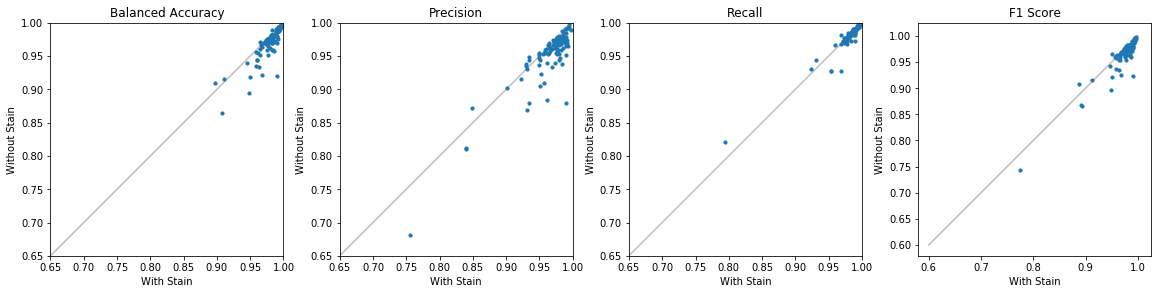

In [25]:
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
%matplotlib inline


#metric='F1 Score'
#metric='Accuracy'
metrics=['Balanced Accuracy', 'Precision', 'Recall', 'F1 Score']

fig, ax = plt.subplots(nrows=1, ncols=len(metrics), figsize=(4*len(metrics), 4))
#plt.rcParams['font.size'] = 1




stain = leader_board.loc[(leader_board['stain'] == True) ]
no_stain = leader_board.loc[(leader_board['stain'] == False) ]

plot_df = stain.merge(no_stain, on='run', how='inner')


for j, col in enumerate(ax):


    xvals=plot_df[metrics[j]+"_x"]
    yvals=plot_df[metrics[j]+"_y"]


    col.set_xlabel("With Stain")
    col.set_ylabel("Without Stain")

    col.scatter(xvals, yvals,s=10)

    lims = [ 0.6, 1
    ]

    col.plot(lims, lims, 'k-', alpha=0.25, zorder=0)
    col.set_title(metrics[j])
    col.set_xlim([0.65, 1])
    col.set_ylim([0.65, 1])
    col.set(adjustable='box', aspect='equal')
    
plt.axis('equal')
#plt.axis([0.5, 1, 0.5, 1])
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)




